@Author - Darsh and Devashish

# The Jupyter Notebook, only contains the functions, and there direct application to solve the Schrodinger Wave Equations. 

In [67]:
#importing the necessary library

import numpy as np
import scipy
from scipy import sparse
from scipy.sparse import linalg, diags
import scipy.sparse.linalg as splin
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [68]:

#defining the values so as to impliment in Crank Nikolson method  
#Set Fixed

J = 1024                                                 #number of grid points, or the numeric length of x
m = 0.5                                   #mass of the particle is set to 0.5 units, through the calculations
xmin, xmax      =  -10. , 10.                                  # x domain 
t0  , tend      =    0 , 2.0                                  # time period
centre  , k0, sigma   =  0 , 7. ,1                           # parameters for the gaussian 
E               =   k0**2                                   # particle energy
dt              =   0.001                                      # time step
q               =   2*k0                        #q is the parameter for absorbing boundary condition
w               =   0.2                     #w is another parameter for p = 4 aborbing boundary codnition 

x_Range, dx  = np.linspace(xmin,xmax,J,retstep=True)     # x-array and calculation of x step    
t      = np.arange(t0, tend + dt, dt)  
N = len(t)                                         #number of points in time array


In [69]:
#Defining Gaussian Wave function

def Gaussian_Function(x_Range,centre,k0,sigma):
    
    """
    The function makes the guassian, knowing, k0, sigma, 
    x(range at which guassian is spreaded, and 
    x0(cetre of the guassian)
    
    
    """
    
    S = 1/(sigma**2*np.pi)**(1./4.)
    A = k0*x_Range
    B = (x_Range - centre)**2/(2*sigma**2)
    EXPONENTIAL = np.exp(1j*A - B)
    return S*EXPONENTIAL

In [70]:
V = np.zeros(len(x_Range))

In [71]:
help(Gaussian_Function)

Help on function Gaussian_Function in module __main__:

Gaussian_Function(x_Range, centre, k0, sigma)
    The function makes the guassian, knowing, k0, sigma, 
    x(range at which guassian is spreaded, and 
    x0(cetre of the guassian)



In [72]:
psi0 = Gaussian_Function(x_Range,centre,k0,sigma)
psi0

array([9.17510606e-23-1.12116119e-22j, 1.29092639e-22-1.19807127e-22j,
       1.75272568e-22-1.22829488e-22j, ...,
       1.75272568e-22+1.22829488e-22j, 1.29092639e-22+1.19807127e-22j,
       9.17510606e-23+1.12116119e-22j])

In [73]:
#So, In the form of function, Crank-Nikolson Method is written as :- 


def CrankNikolson(J,V,dx,dt,m):
    
    """
    The function defines the variables that we derived in our report, 
    and then uses the scipy library to solve n-linear equations,
    using sparse.
    
    The function will take the input as len(x), Potential(in array),
    dx, dt, and mass. It will return the Matrix U1 and U2 (which is obtained in CN Method)
    
    J = len(x)
    V = Array of Potential
    dx = amount by which x is increases(distance between two successive grid points)
    dt = distance between two given time
    m = mass , which is generally set as 0.5 ion our overall calculations
    
    """
    
    one     = np.ones((J),complex)
    alpha   = (1j)*dt/(m*4*dx**2)               
    gamma  = one - 1j*dt/2*(1/(m*dx**2)*one + V)   
    xi    = one + 1j*dt/2*(1/(m*dx**2)*one + V)   
    off   = alpha*one
    
    
    diags = np.array([-1,0,+1])      
    vecs1 = np.array([-off,xi,-off])                   
    U1    = sparse.spdiags(vecs1,diags,J,J)
    U1    = U1.tocsc()                      
    vecs2 = np.array([off,gamma,off])
    U2    = sparse.spdiags(vecs2,diags,J,J)
    U2    = U2.tocsc() 
    return U1, U2


In [74]:
def Solve_CN(x_Range,dx,t,dt,psi0,V, m):
    
    """
    This fucntion solves the Crank Niksolson metod matrix, and obtains the direct result of wave fucntion, 
    provided we properly defines the initial wave fucntion.
    
    Input taken, are x_Range,
    grid step, time step
    and initial wave fucntion, at t = 0
    Potential array
    m- which is fixed in our case as 0.5
    
    """
    J = len(x_Range)
    N = len(t)

    PSI      = np.zeros((J,N),complex)
    PSI[:,0] = psi0
    
    U1, U2 = CrankNikolson(J,V,dx,dt,m)
    LU  = splin.splu(U1)
    
    for n in range(0,N - 1):          
        b = U2.dot(PSI[:,n])          
        PSI[:,n + 1] = LU.solve(b)
        
    return PSI

In [75]:
help(Solve_CN)

Help on function Solve_CN in module __main__:

Solve_CN(x_Range, dx, t, dt, psi0, V, m)
    This fucntion solves the Crank Niksolson metod matrix, and obtains the direct result of wave fucntion, 
    provided we properly defines the initial wave fucntion.
    
    Input taken, are x_Range,
    grid step, time step
    and initial wave fucntion, at t = 0
    Potential array
    m- which is fixed in our case as 0.5



In [76]:
help(CrankNikolson)

Help on function CrankNikolson in module __main__:

CrankNikolson(J, V, dx, dt, m)
    The function defines the variables that we derived in our report, 
    and then uses the scipy library to solve n-linear equations,
    using sparse.
    
    The function will take the input as len(x), Potential(in array),
    dx, dt, and mass. It will return the Matrix U1 and U2 (which is obtained in CN Method)
    
    J = len(x)
    V = Array of Potential
    dx = amount by which x is increases(distance between two successive grid points)
    dt = distance between two given time
    m = mass , which is generally set as 0.5 ion our overall calculations



In [77]:
U1, U2 = CrankNikolson(J, V, dx, dt, m)

In [78]:
PSI = Solve_CN(x_Range,dx,t,dt,psi0,V, m)

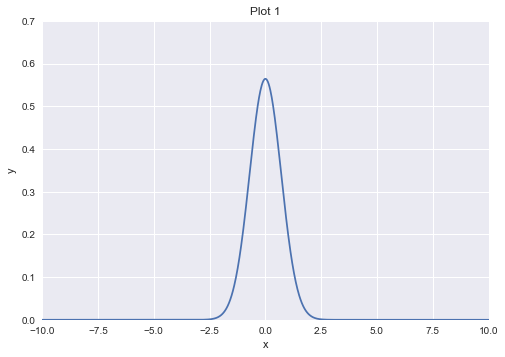

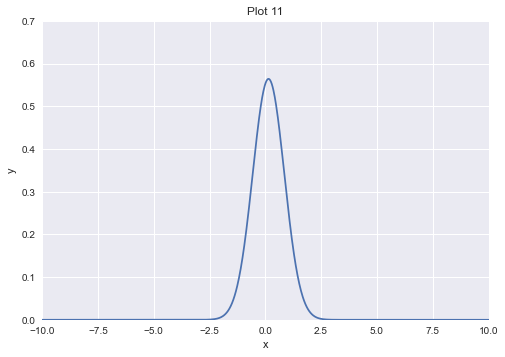

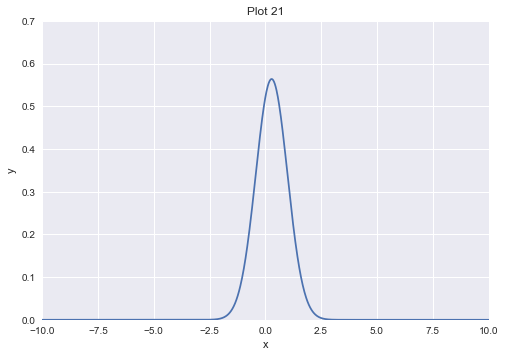

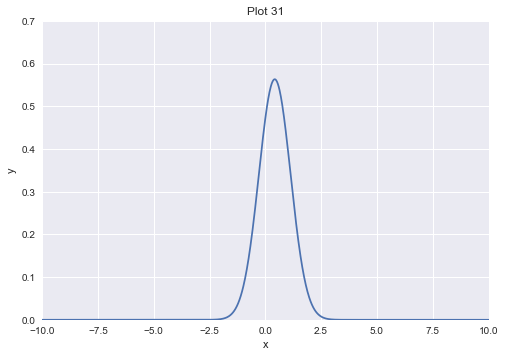

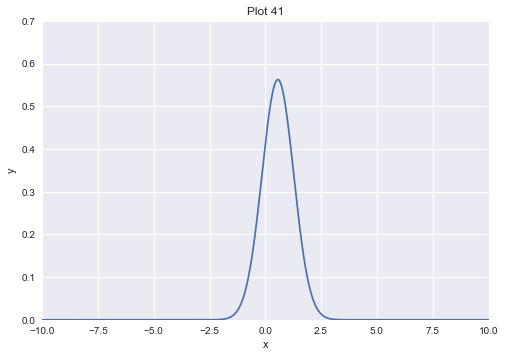

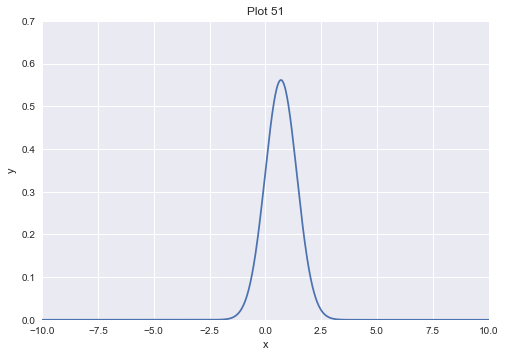

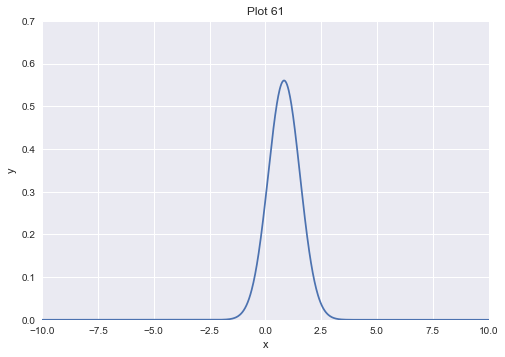

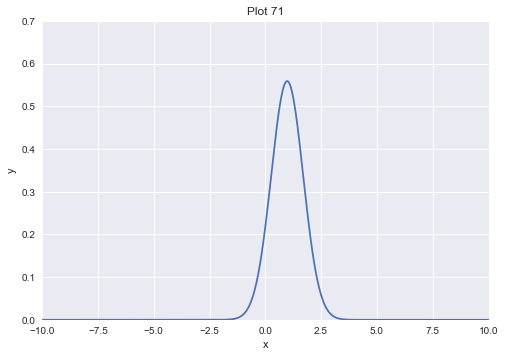

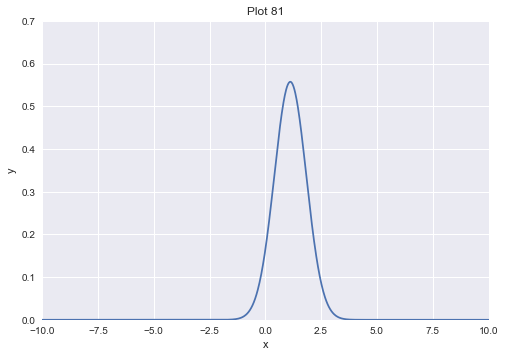

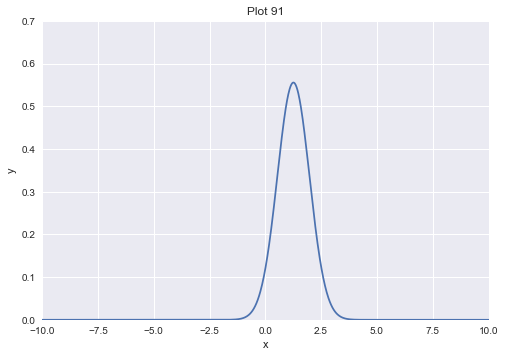

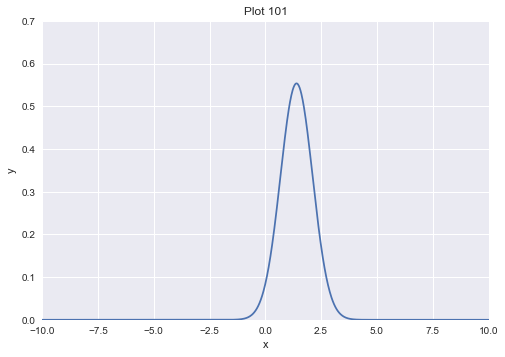

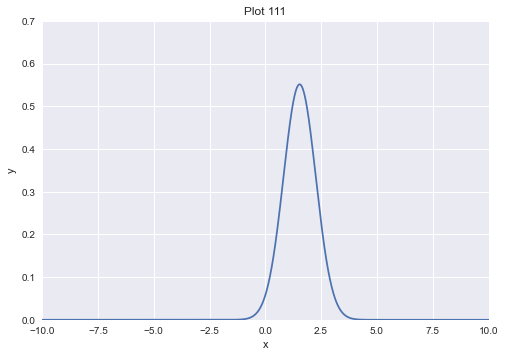

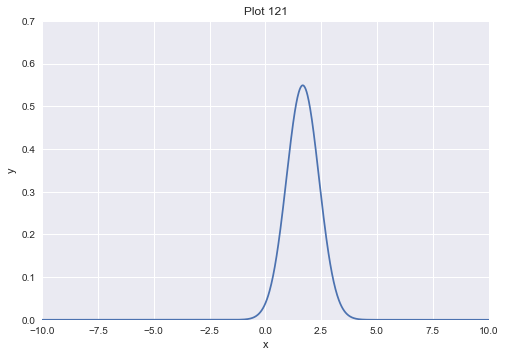

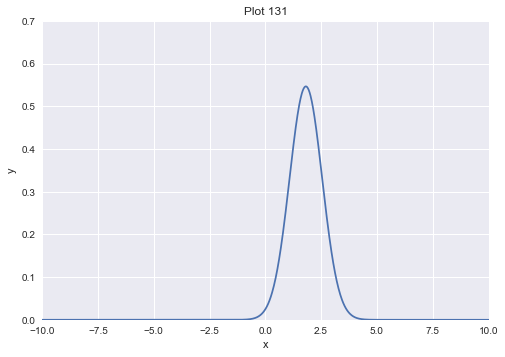

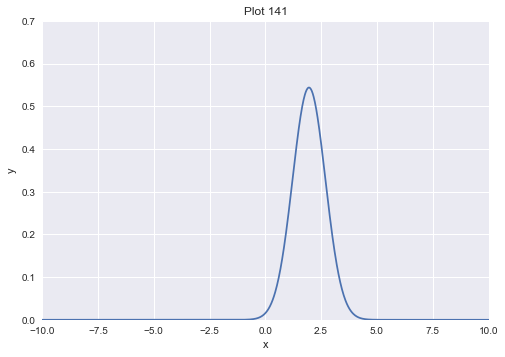

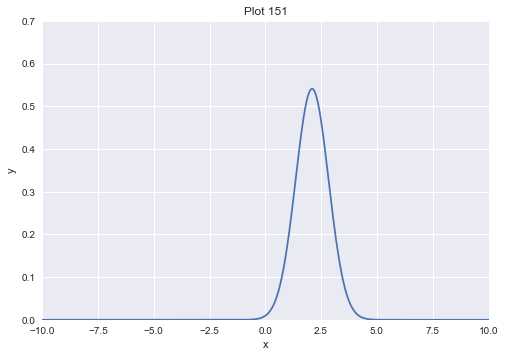

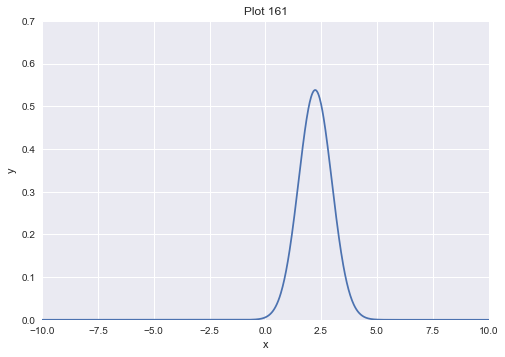

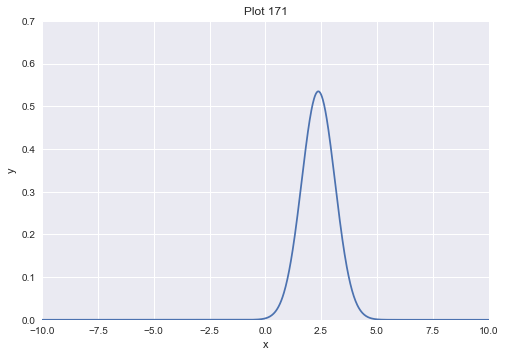

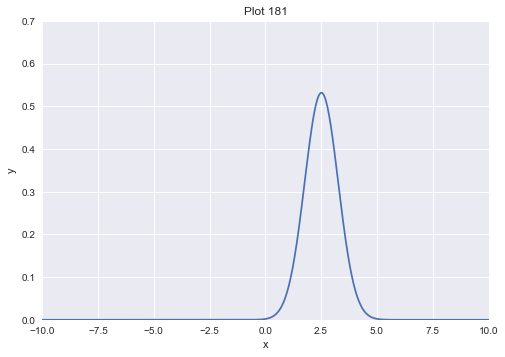

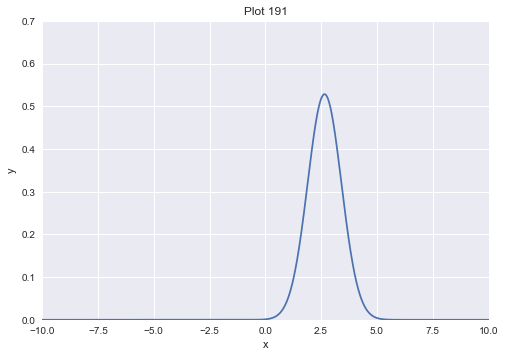

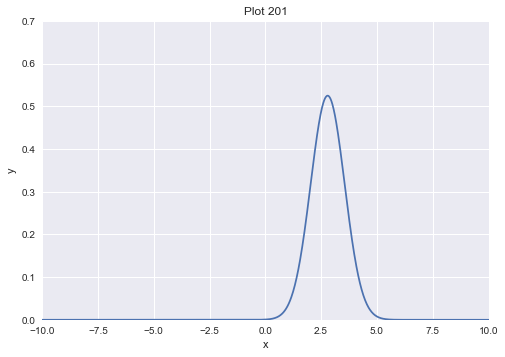

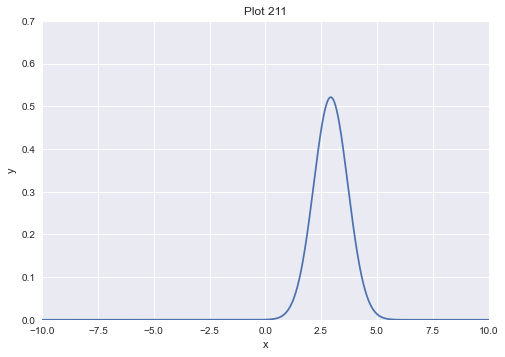

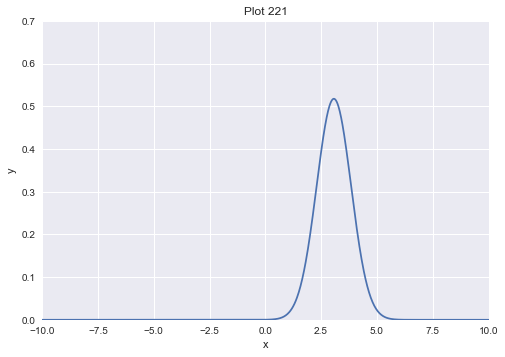

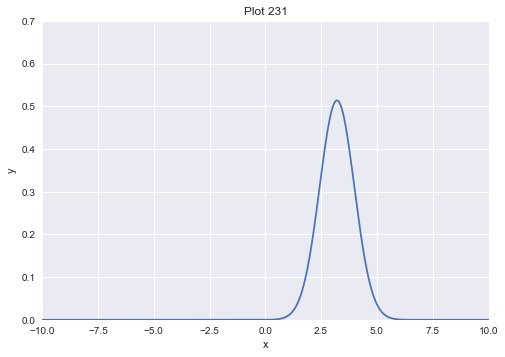

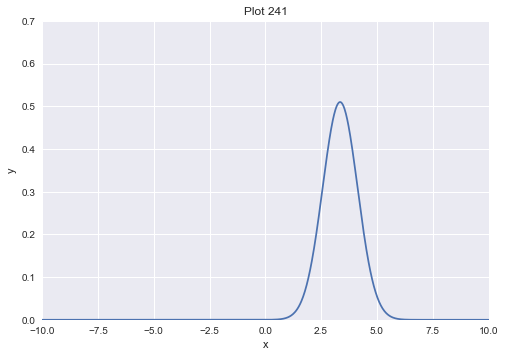

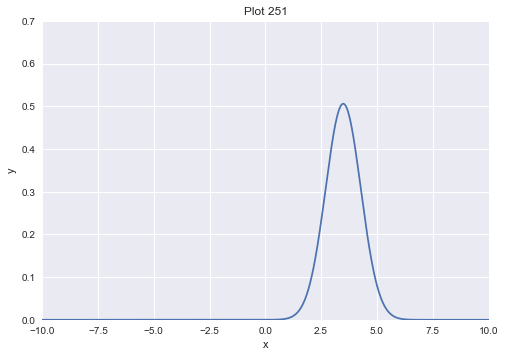

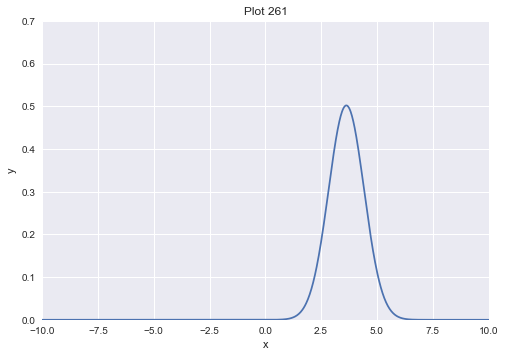

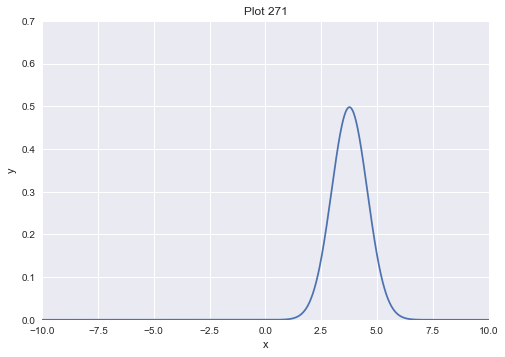

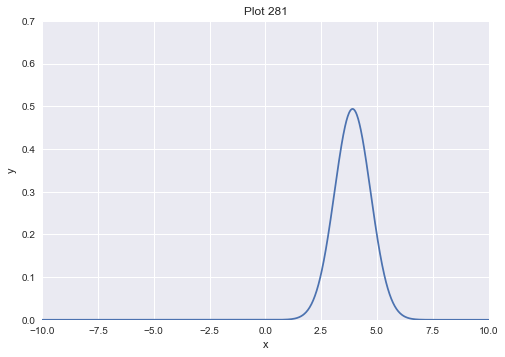

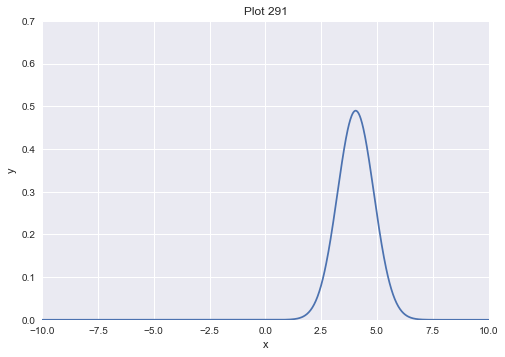

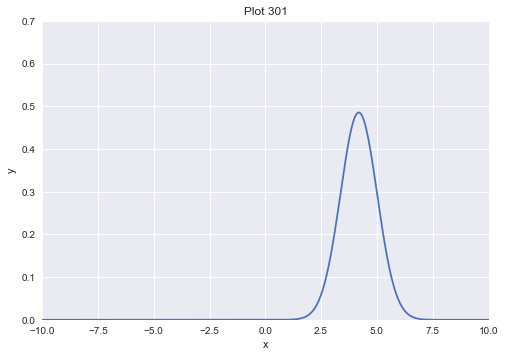

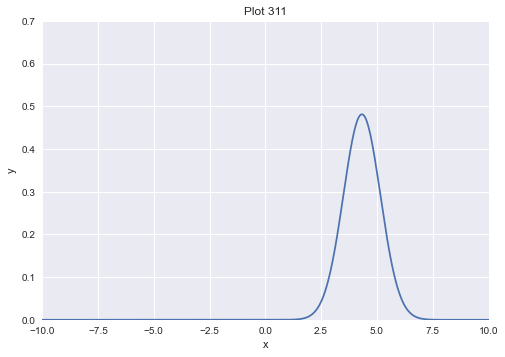

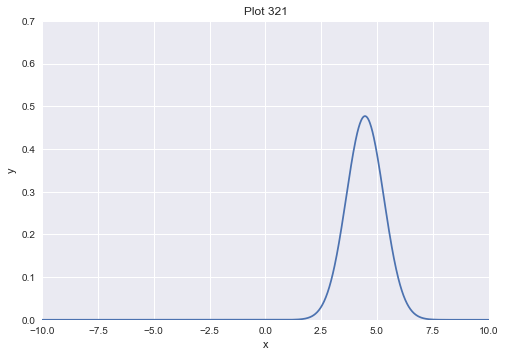

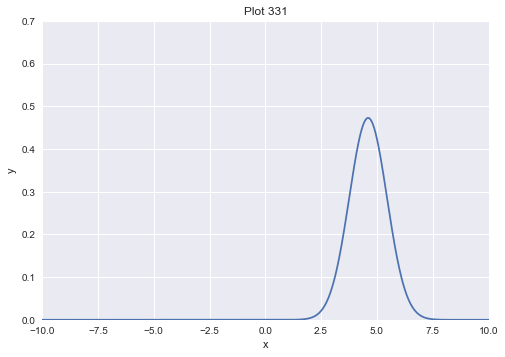

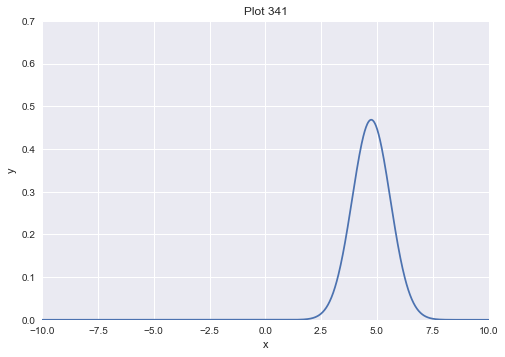

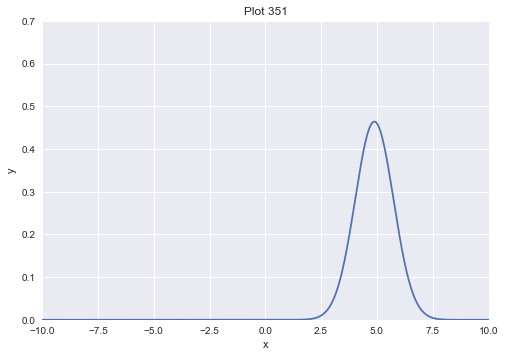

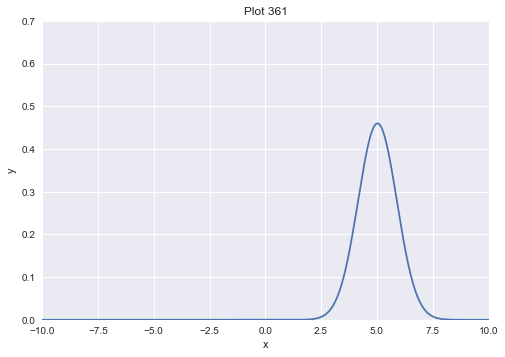

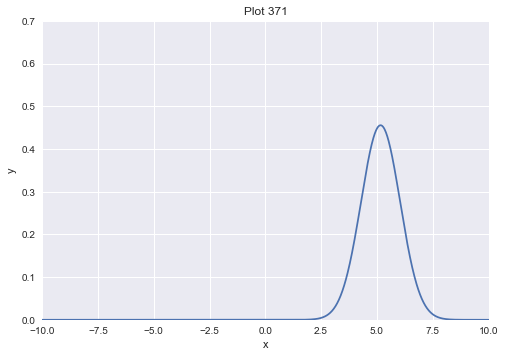

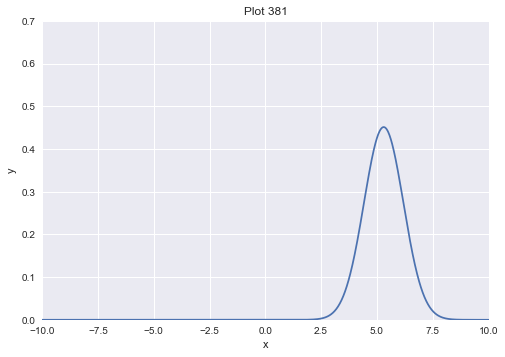

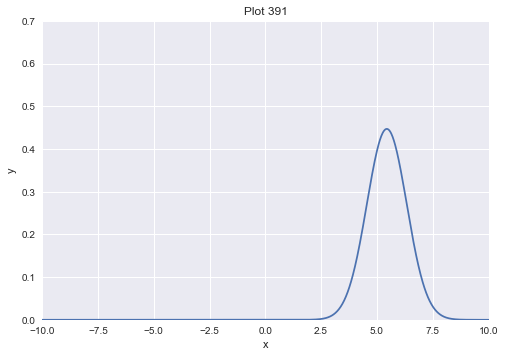

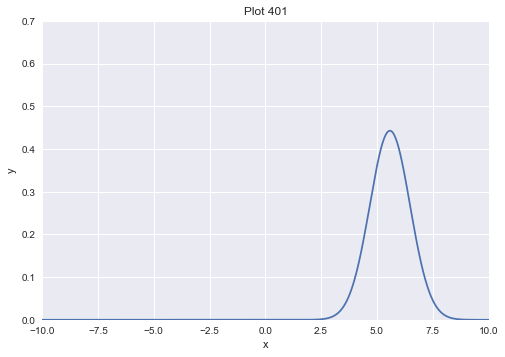

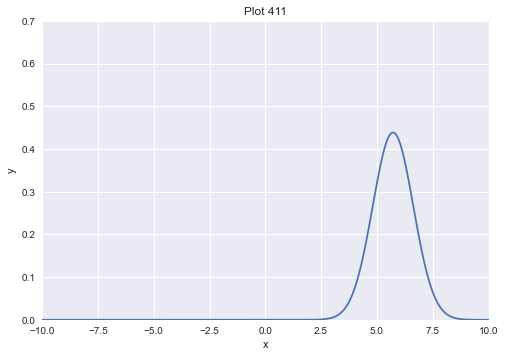

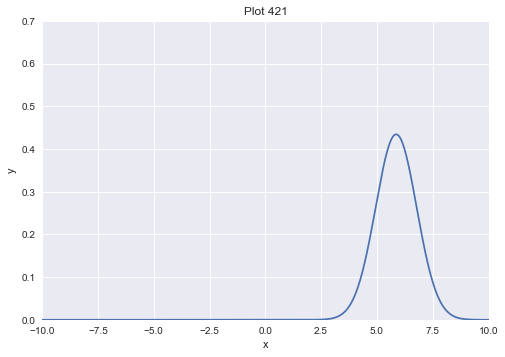

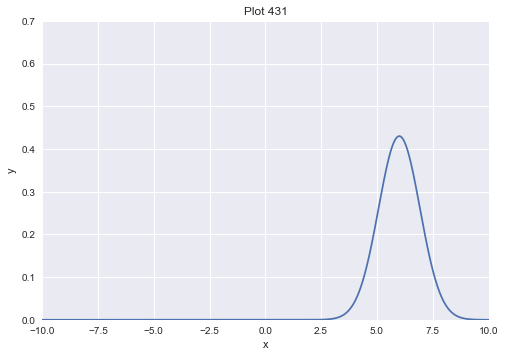

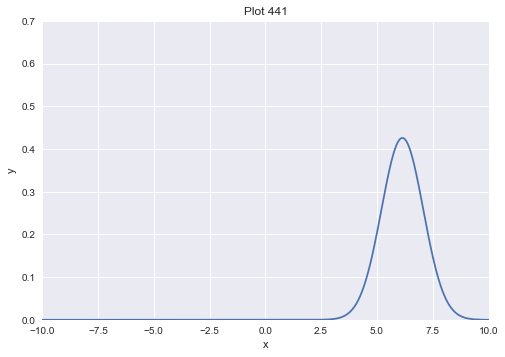

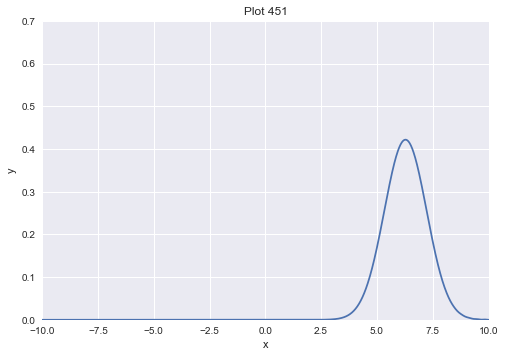

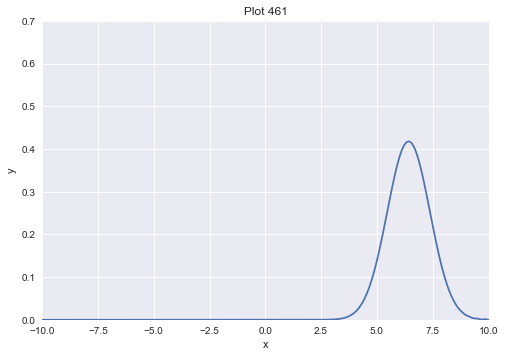

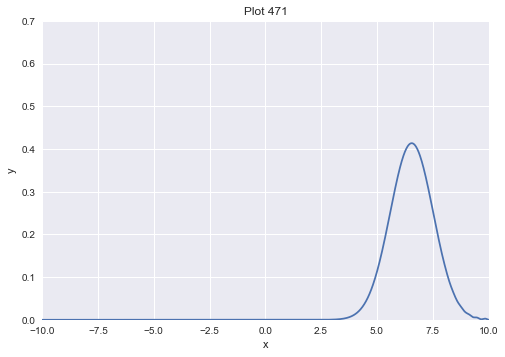

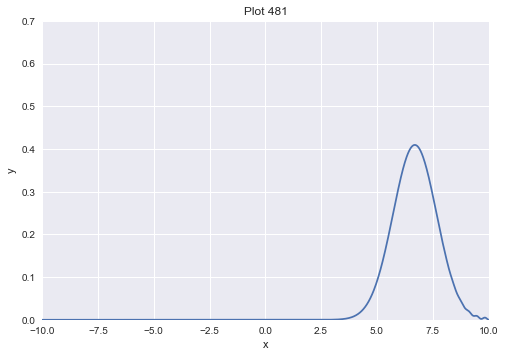

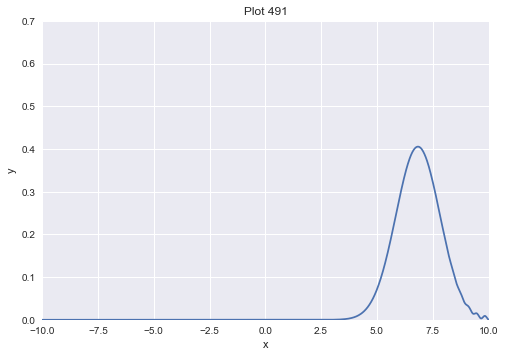

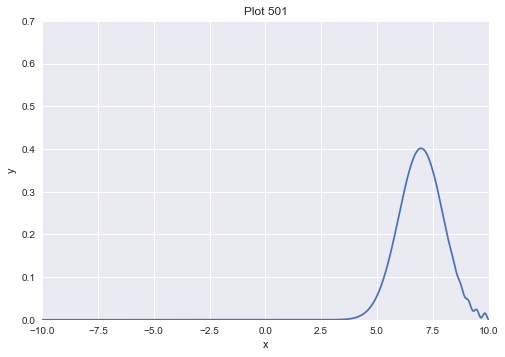

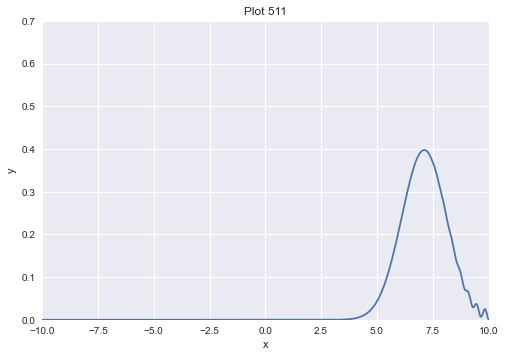

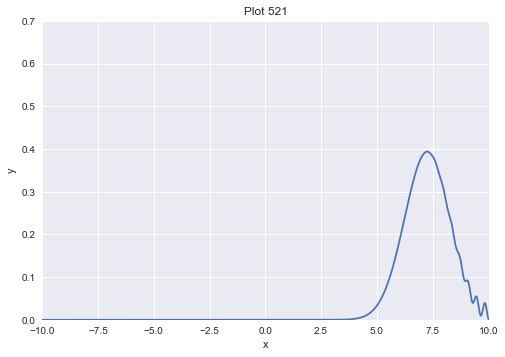

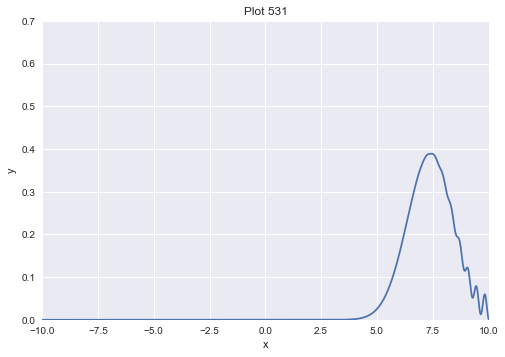

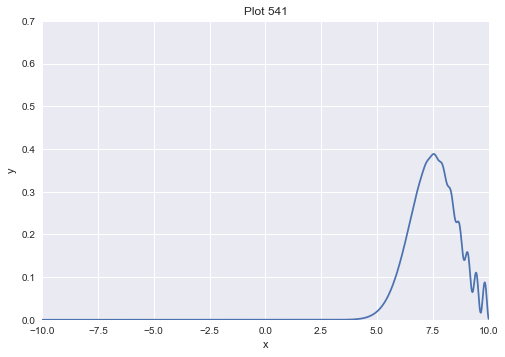

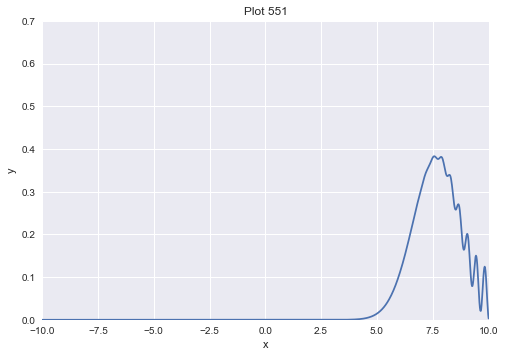

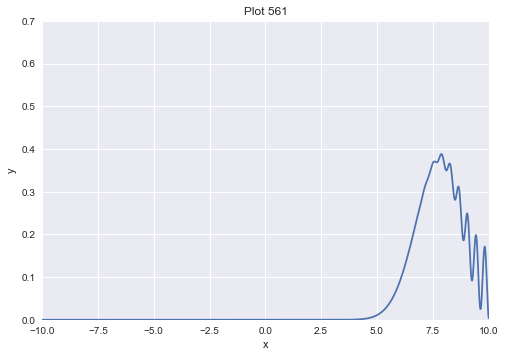

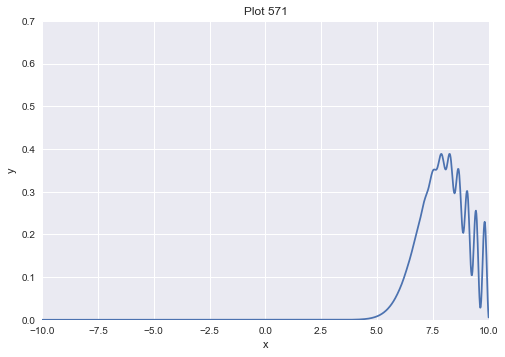

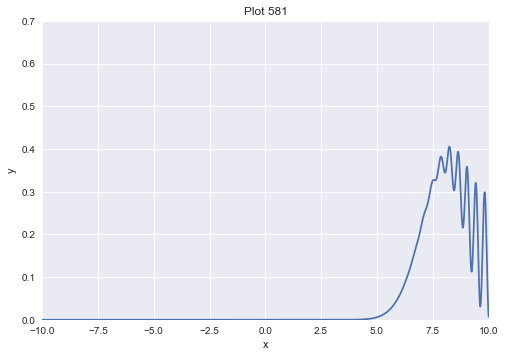

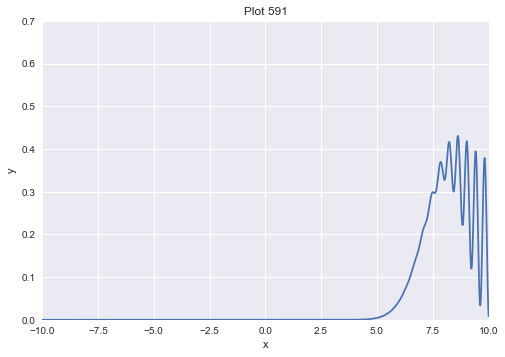

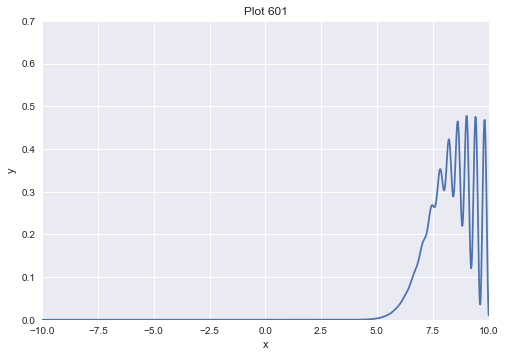

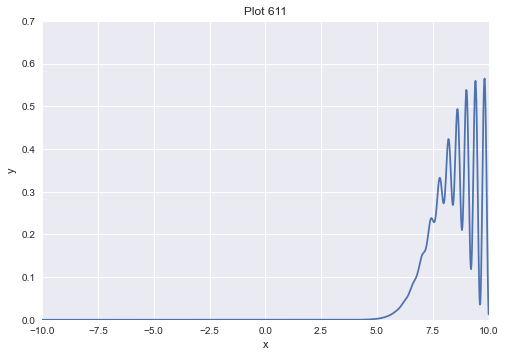

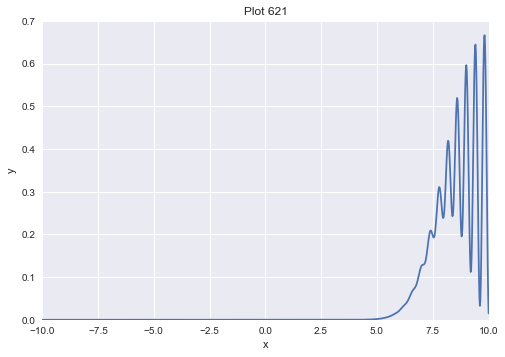

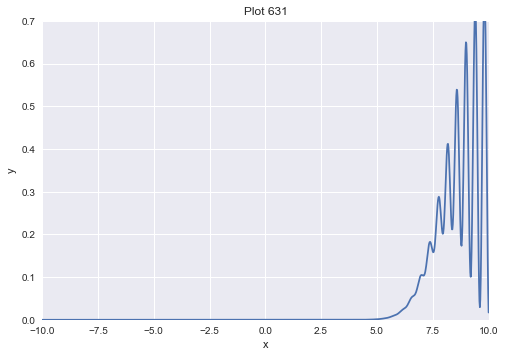

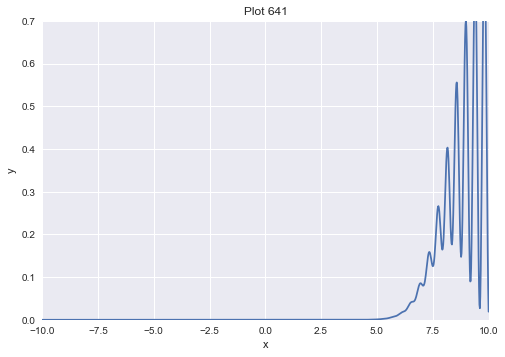

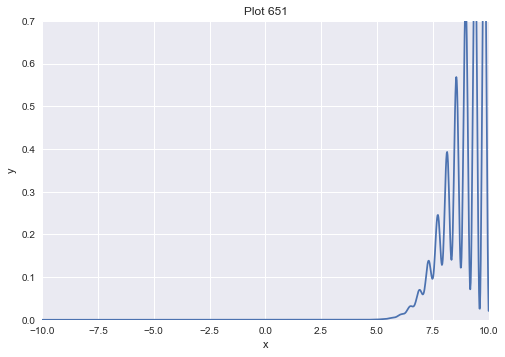

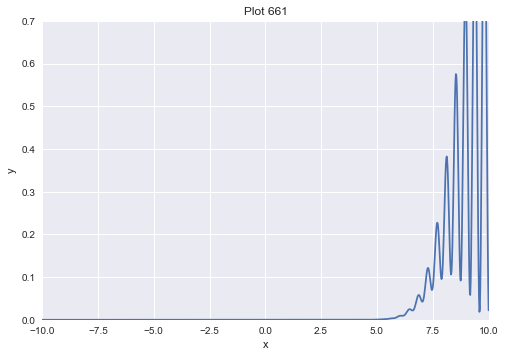

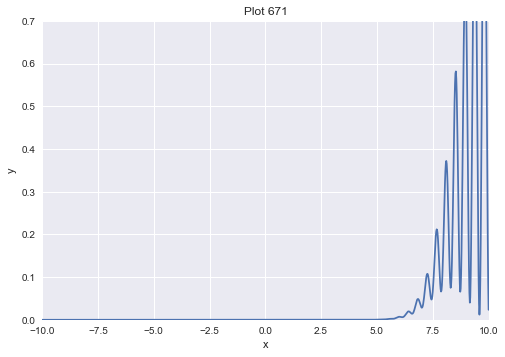

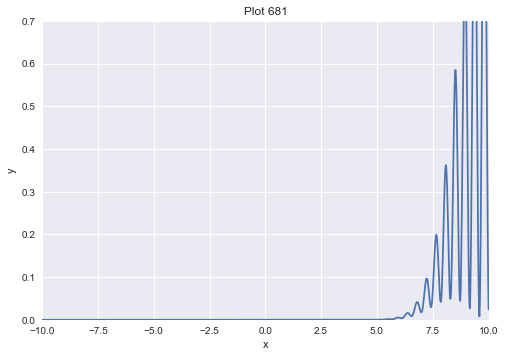

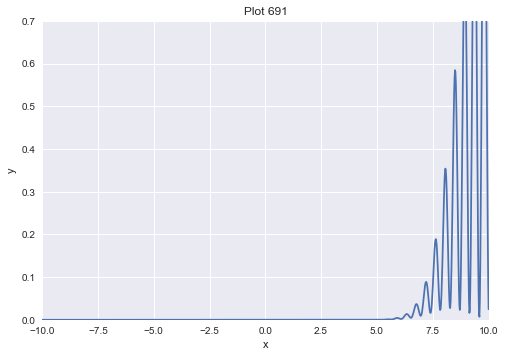

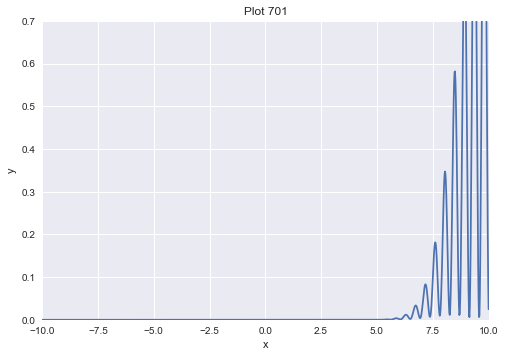

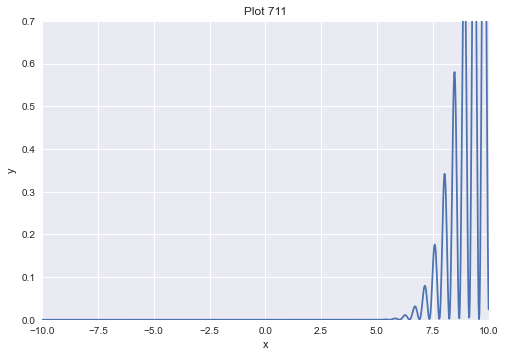

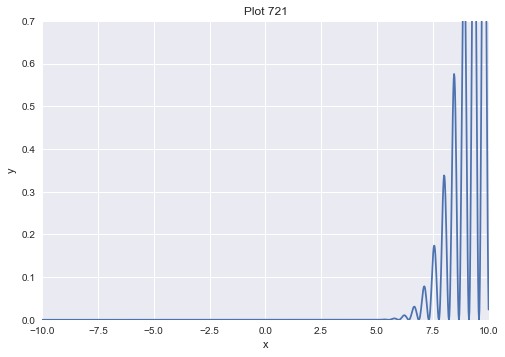

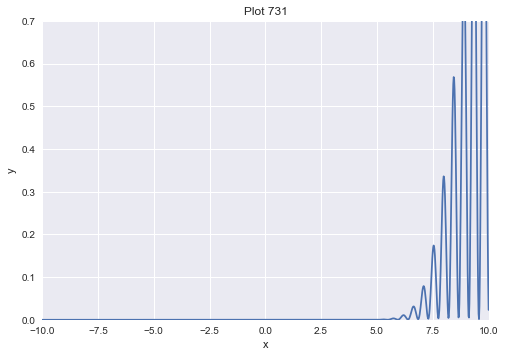

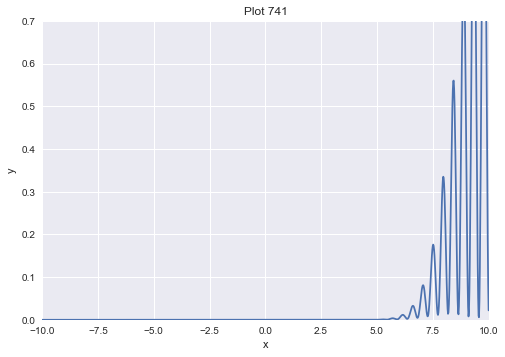

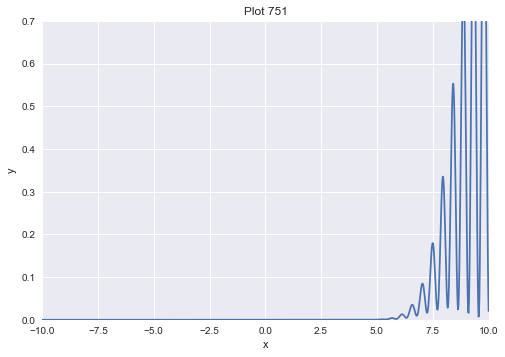

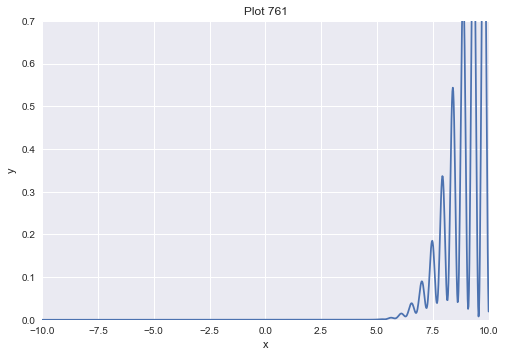

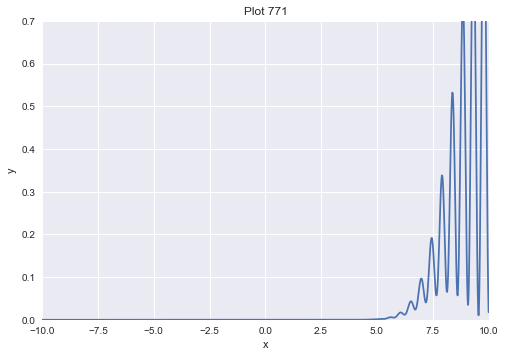

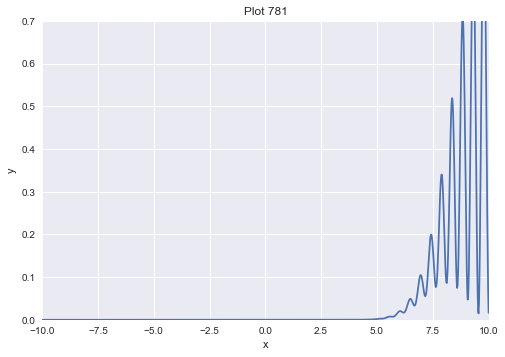

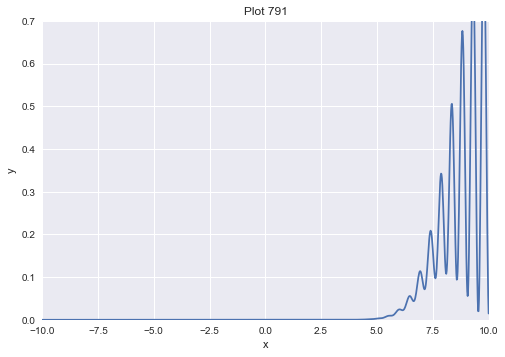

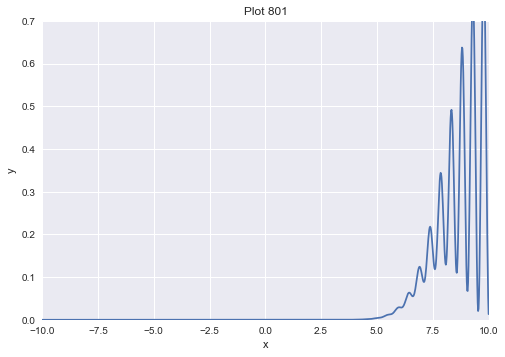

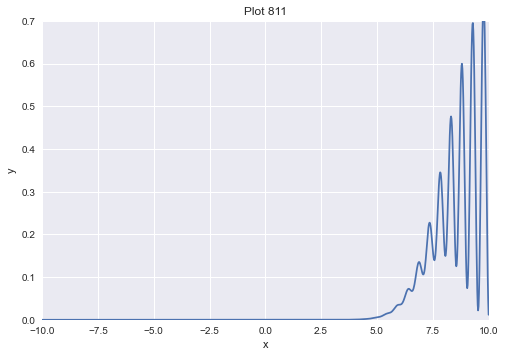

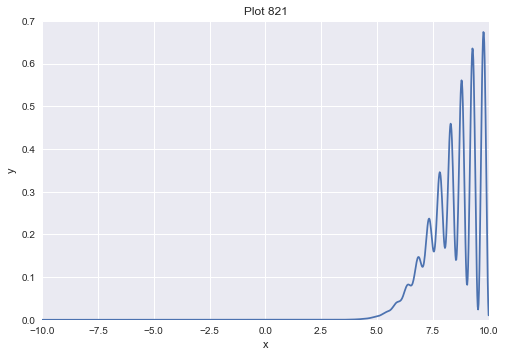

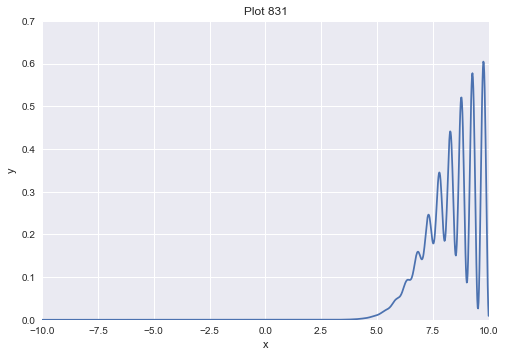

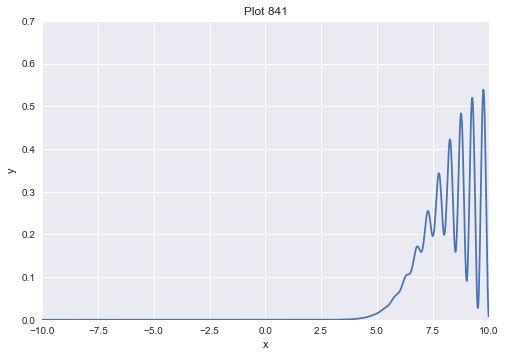

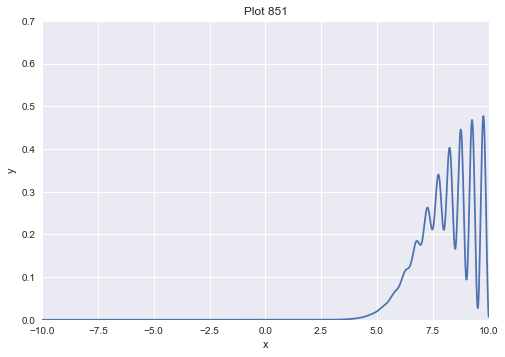

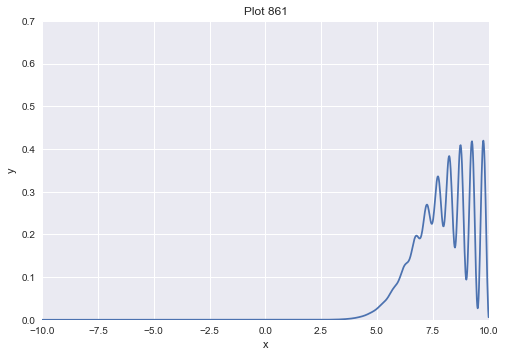

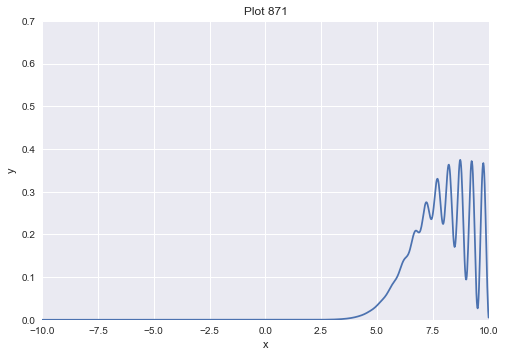

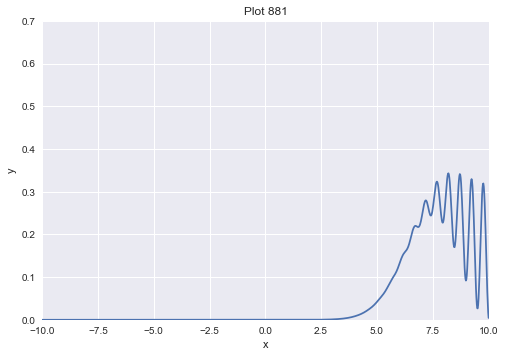

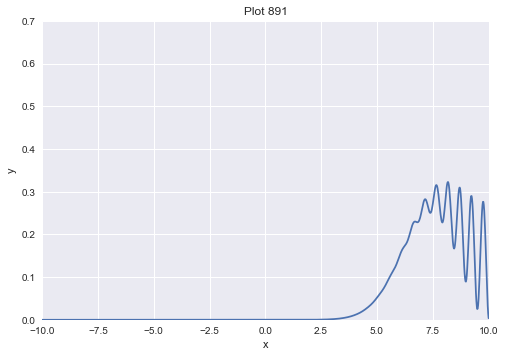

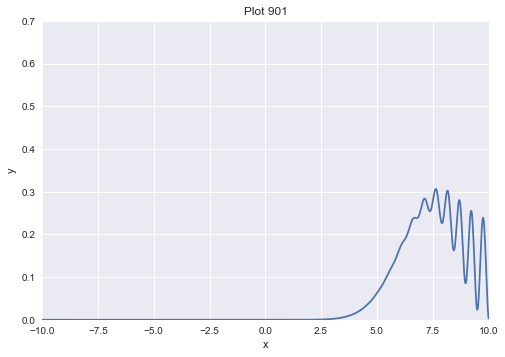

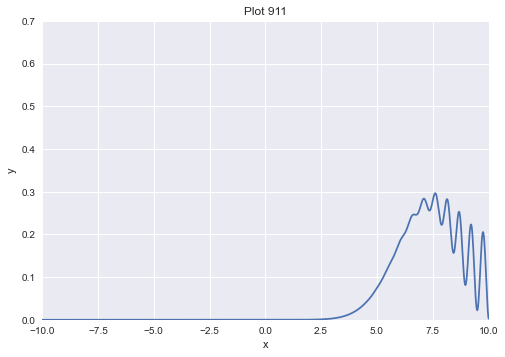

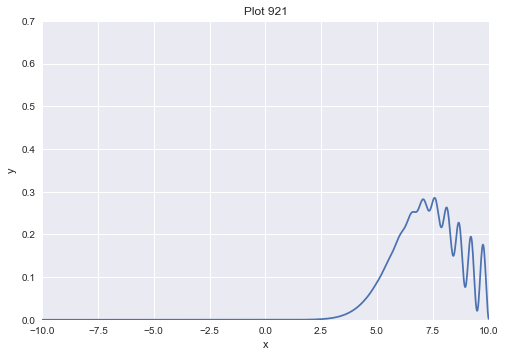

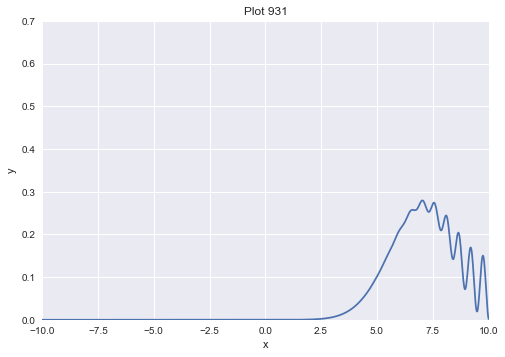

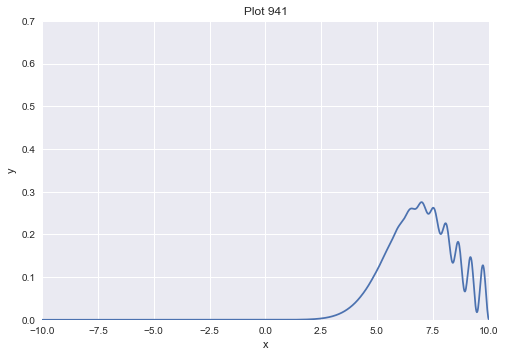

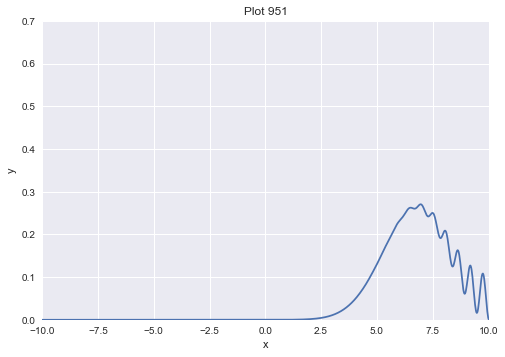

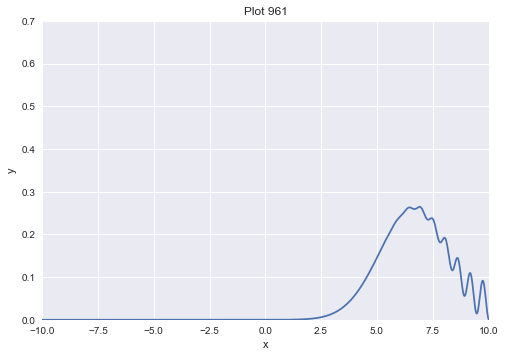

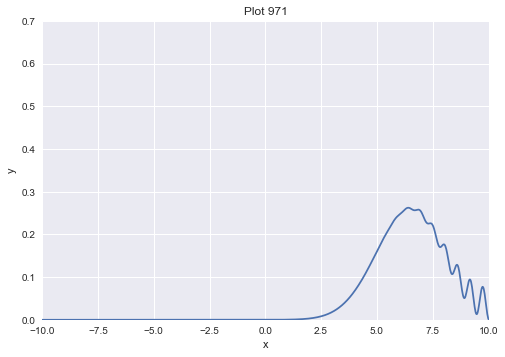

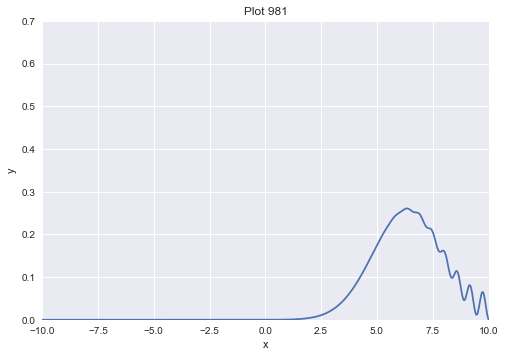

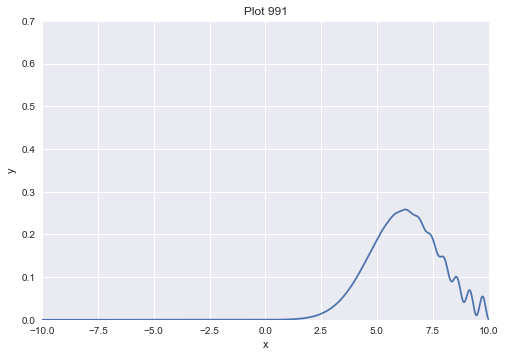

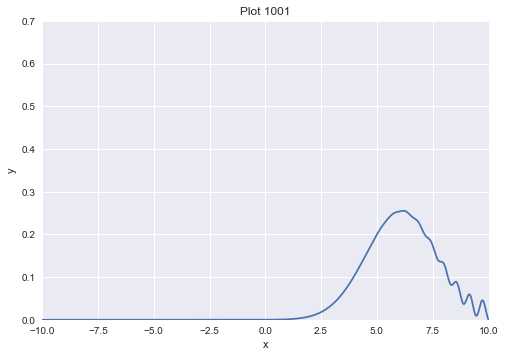

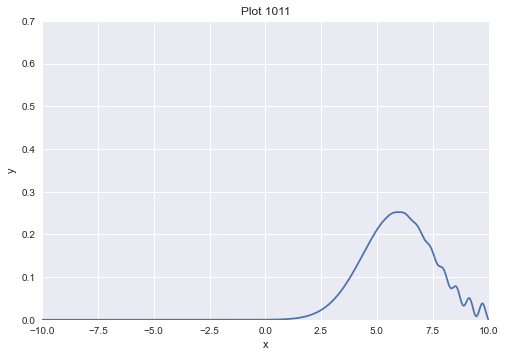

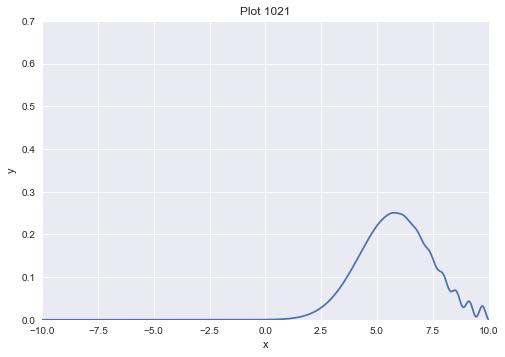

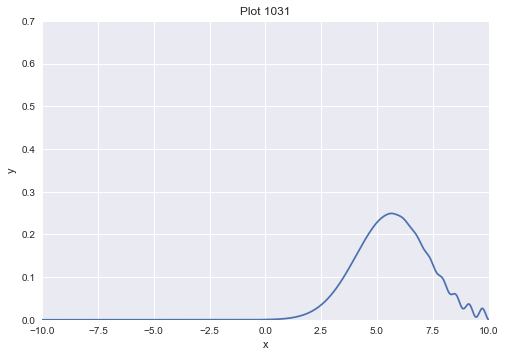

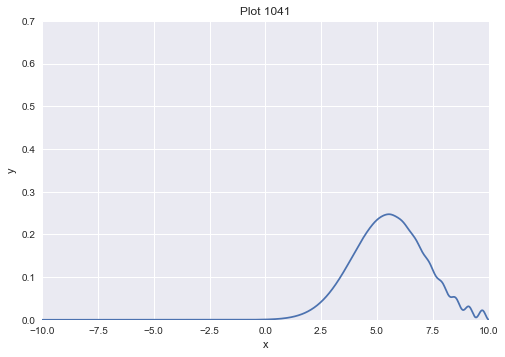

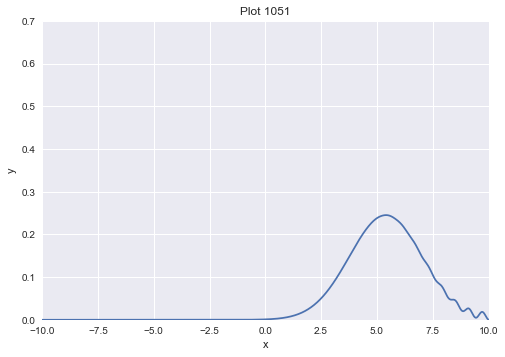

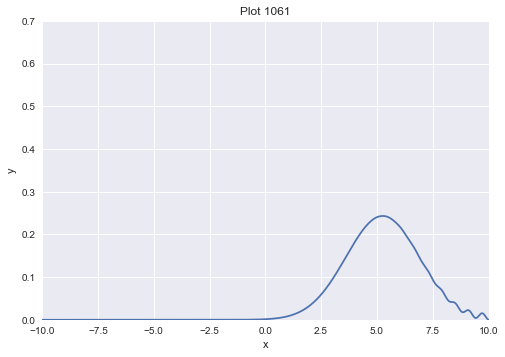

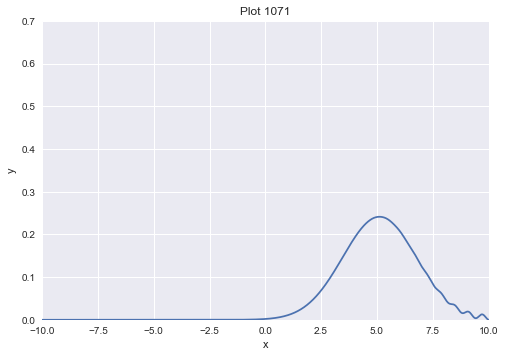

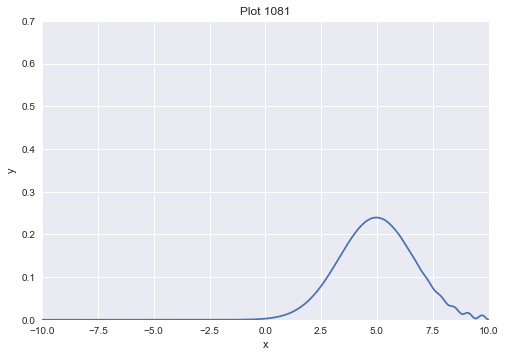

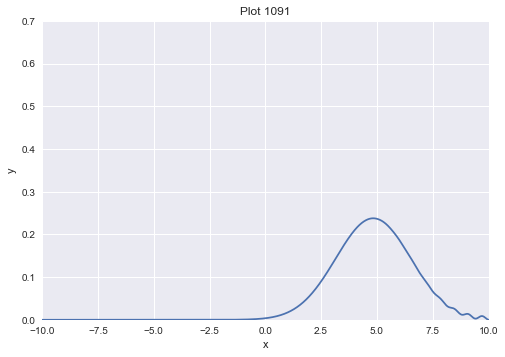

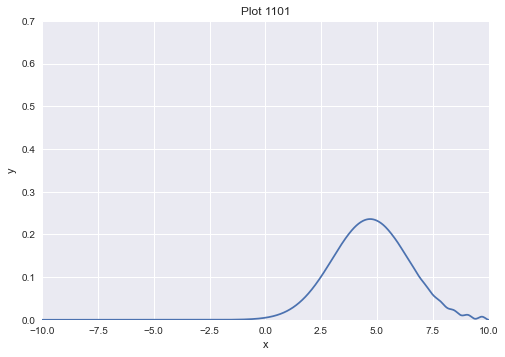

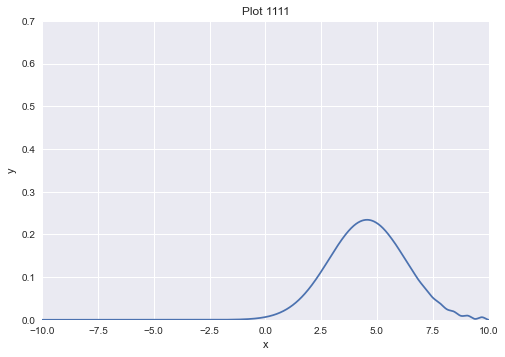

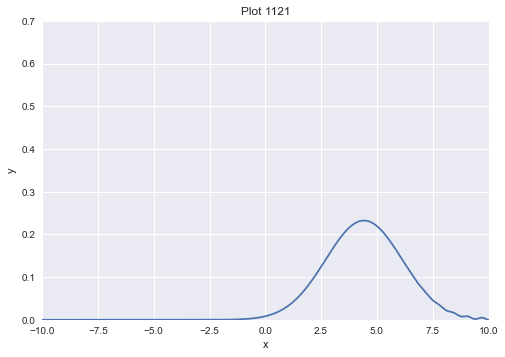

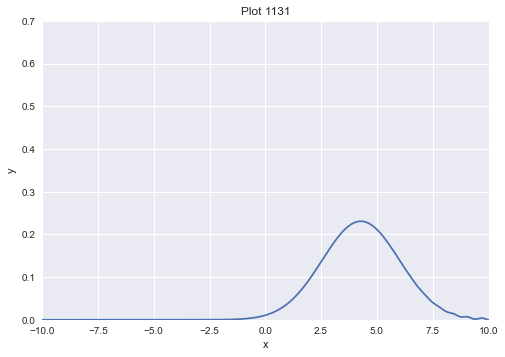

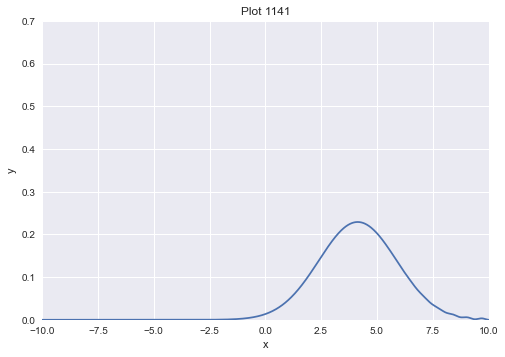

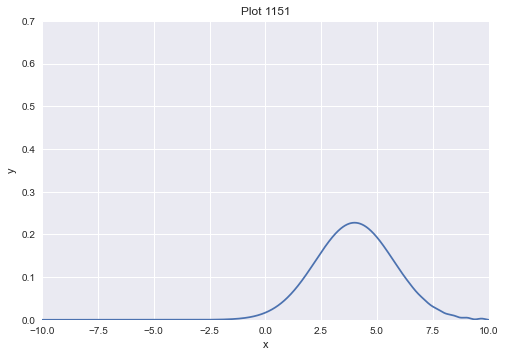

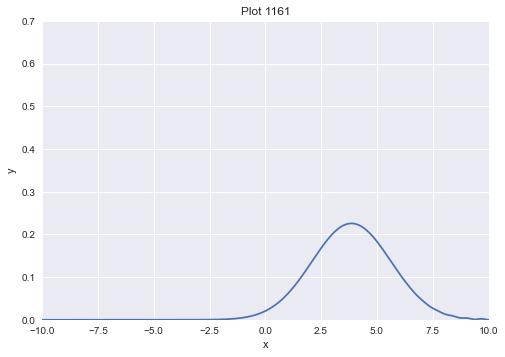

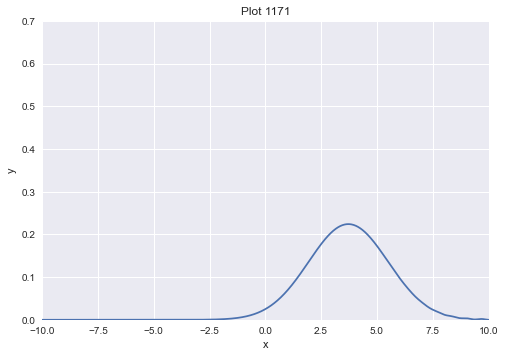

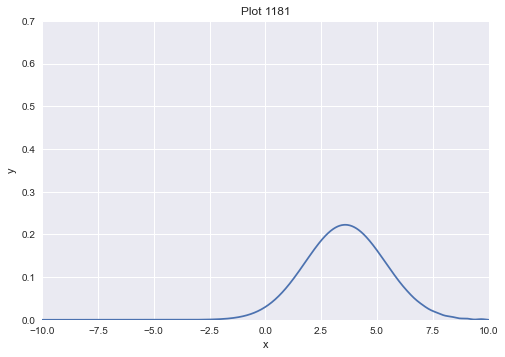

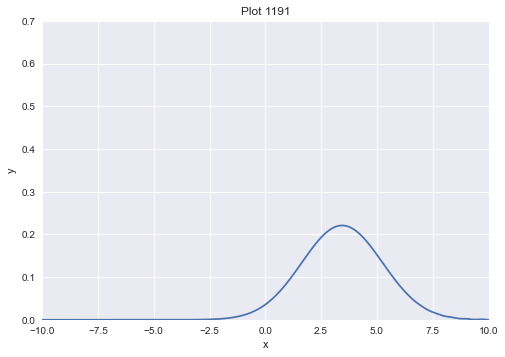

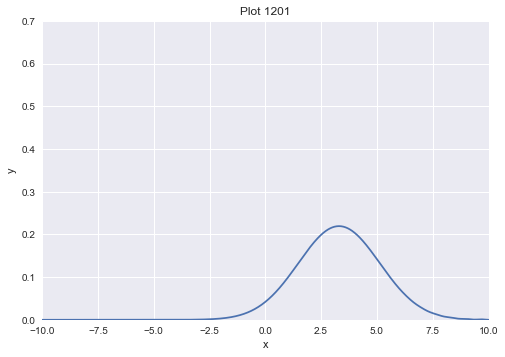

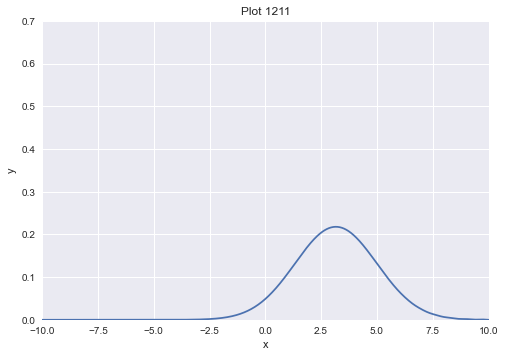

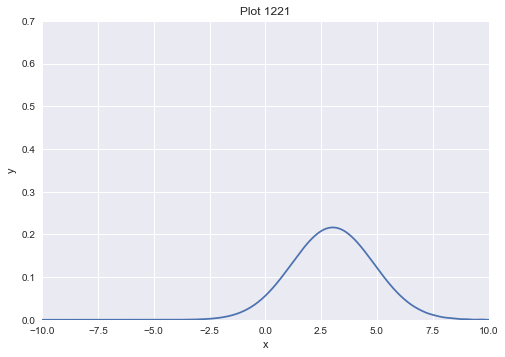

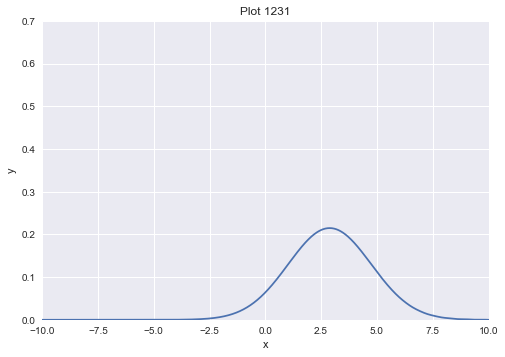

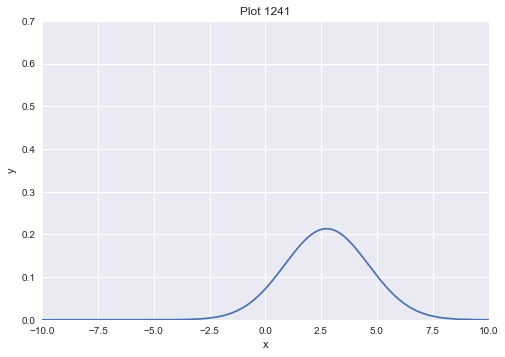

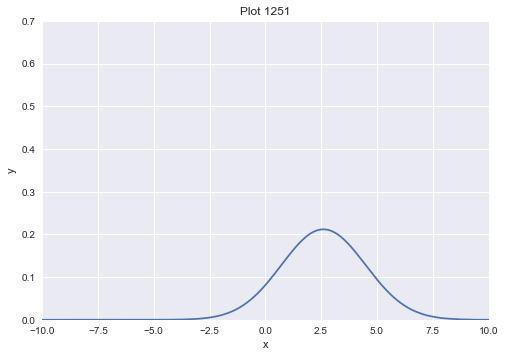

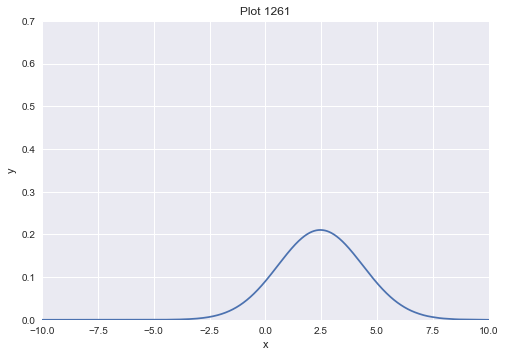

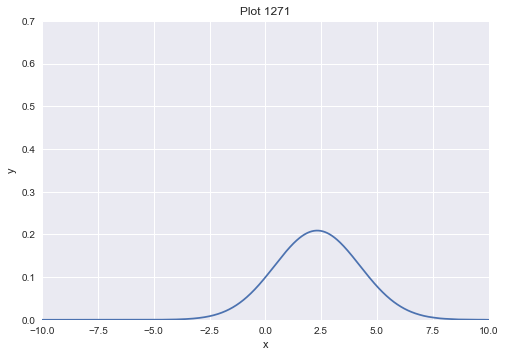

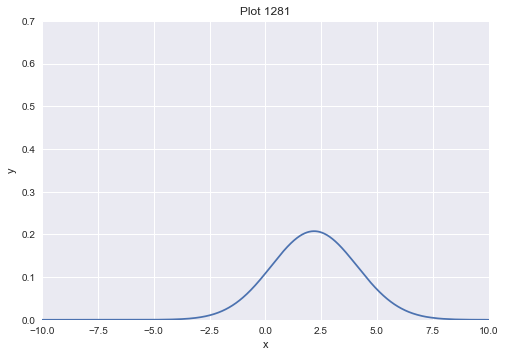

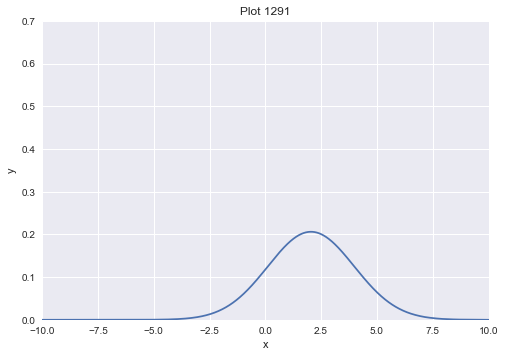

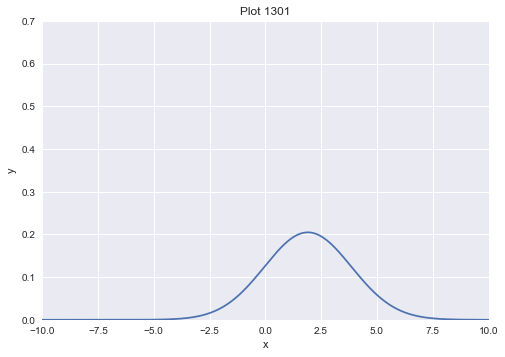

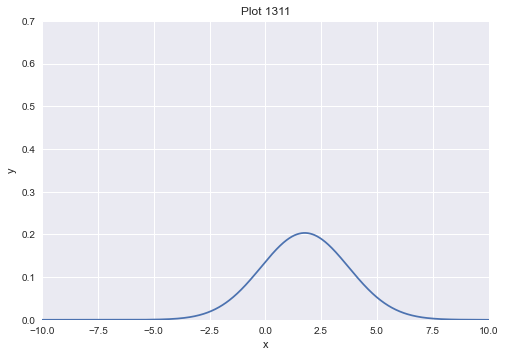

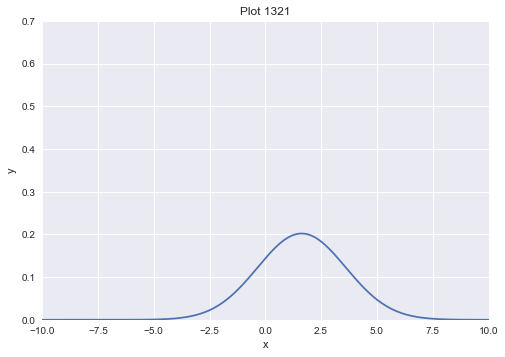

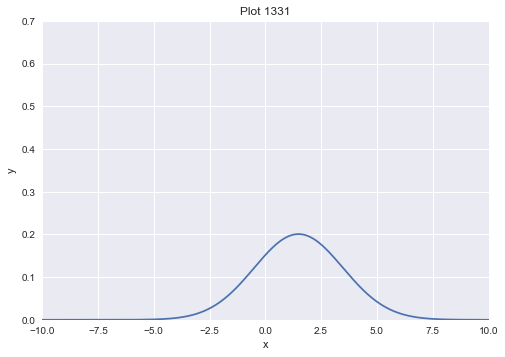

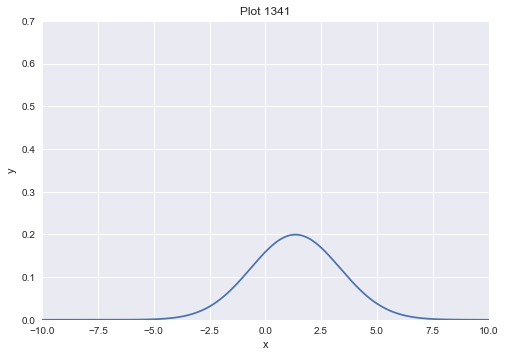

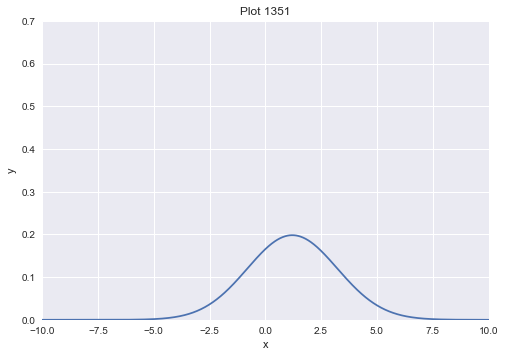

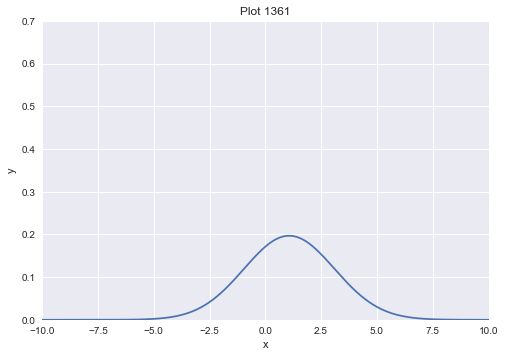

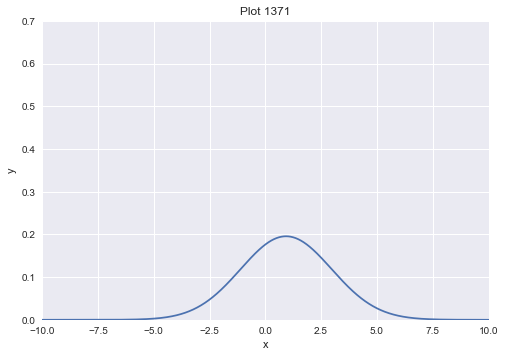

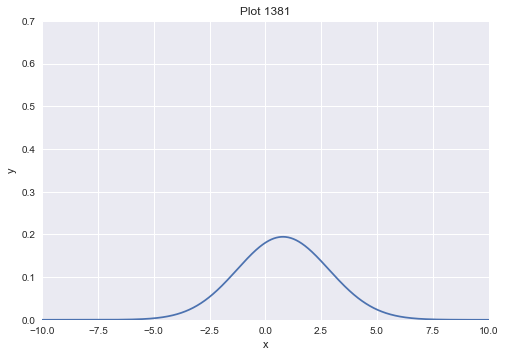

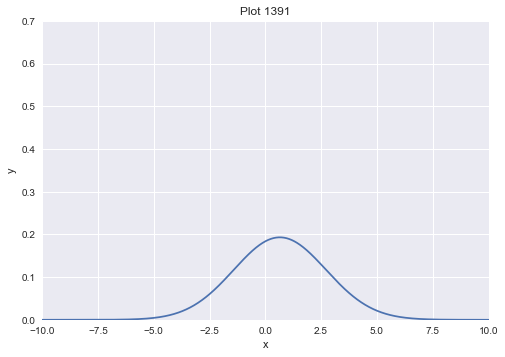

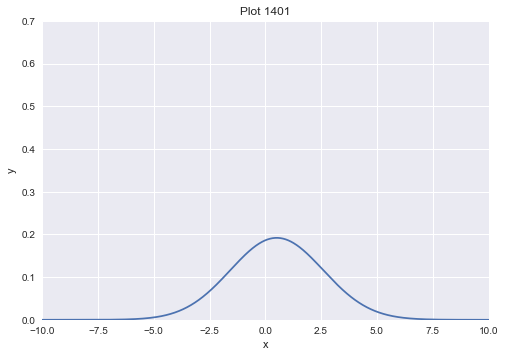

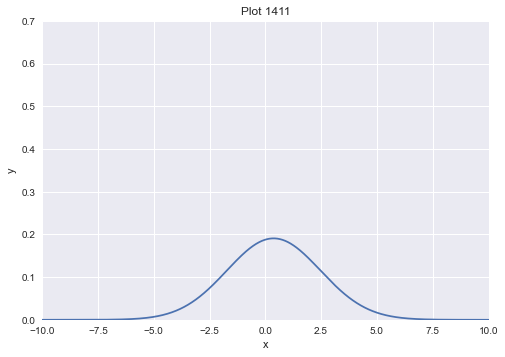

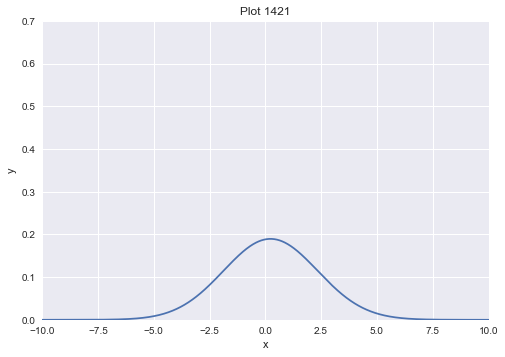

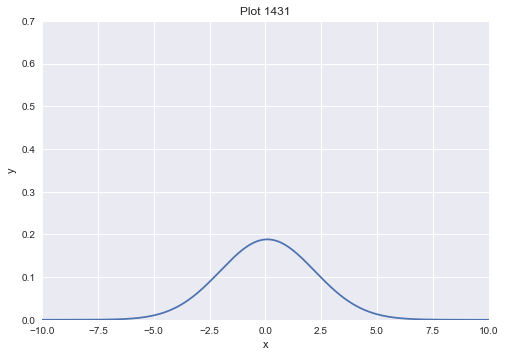

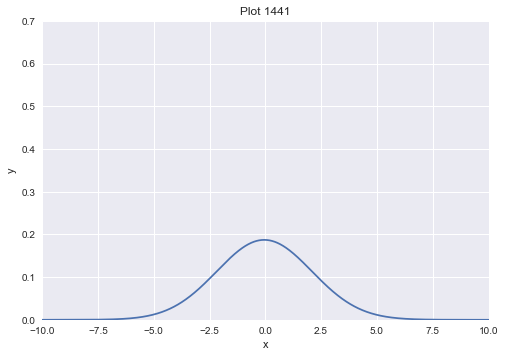

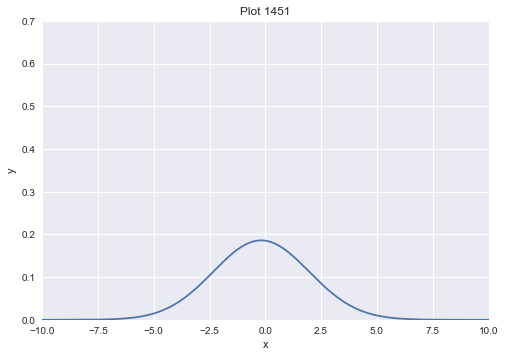

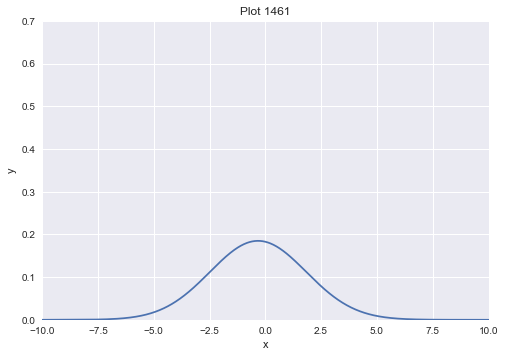

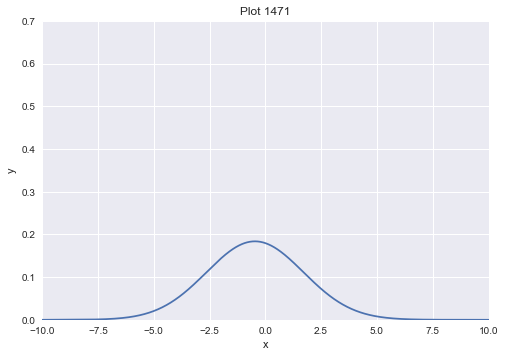

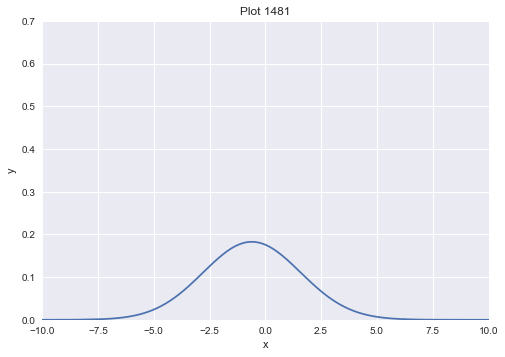

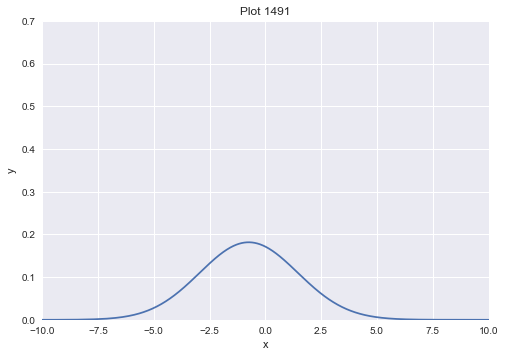

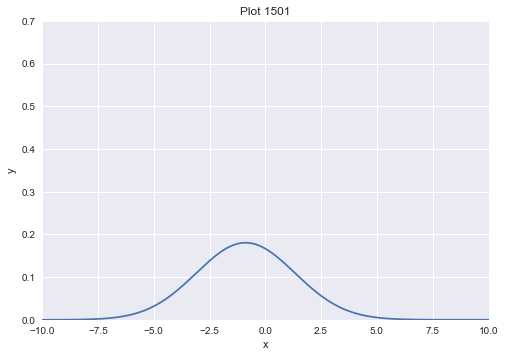

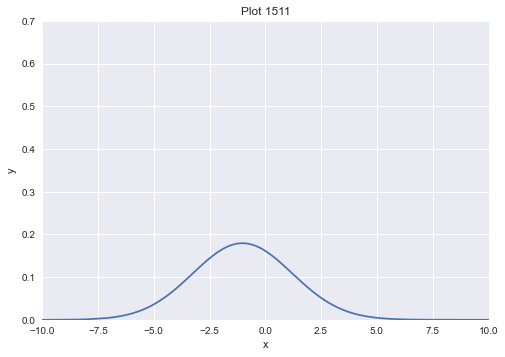

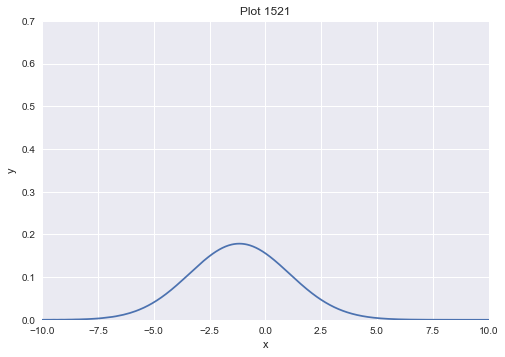

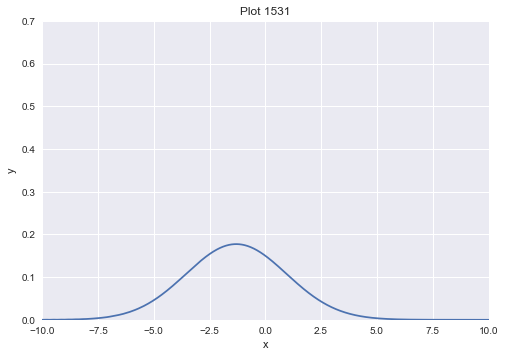

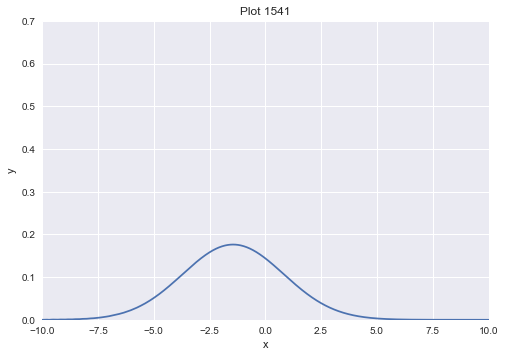

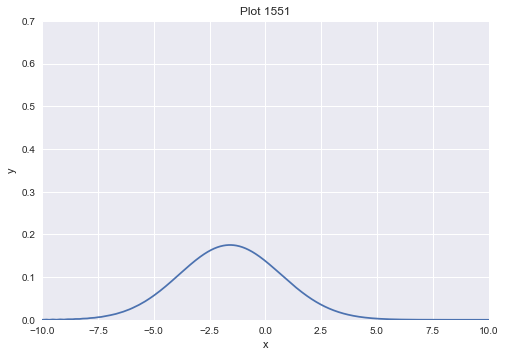

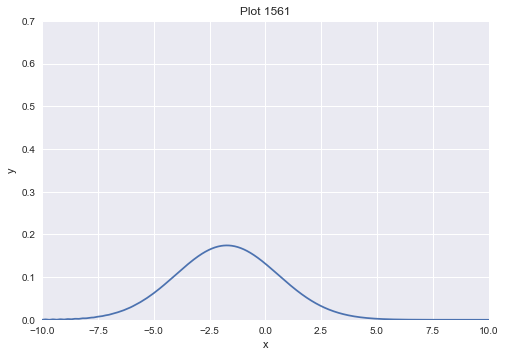

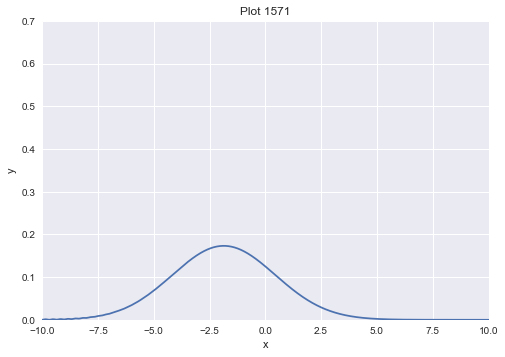

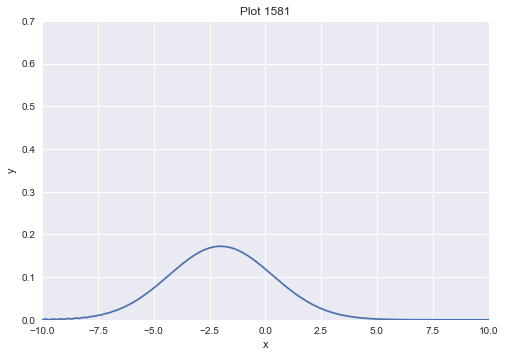

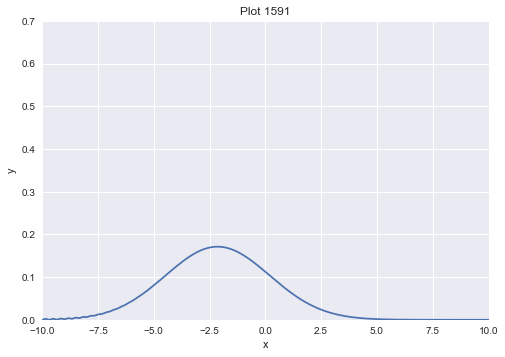

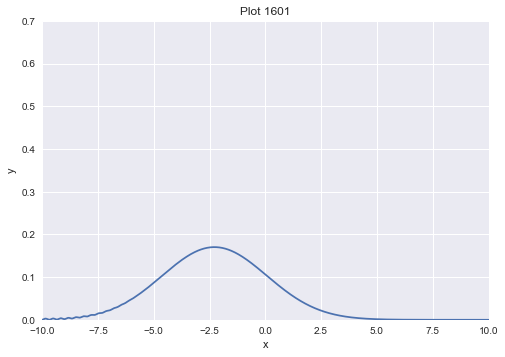

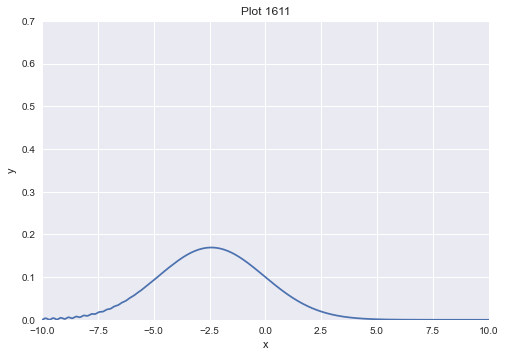

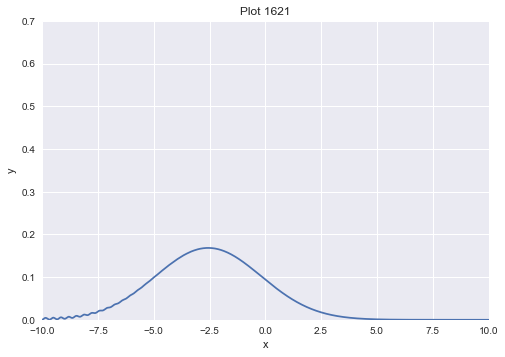

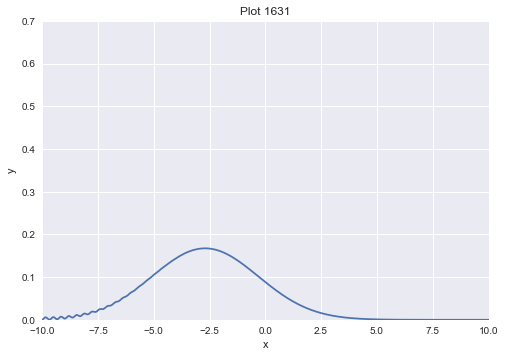

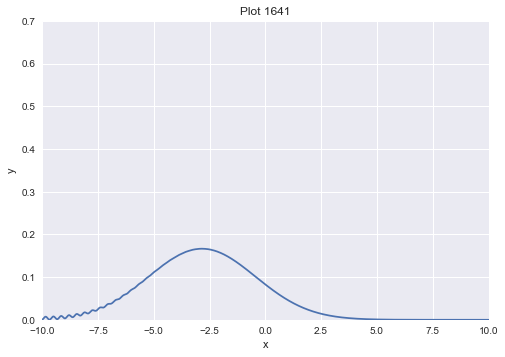

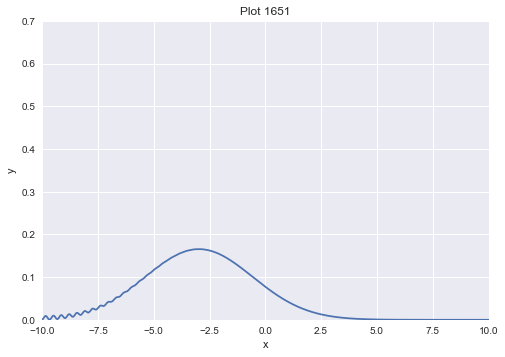

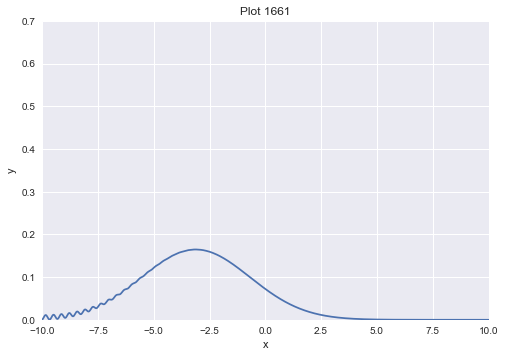

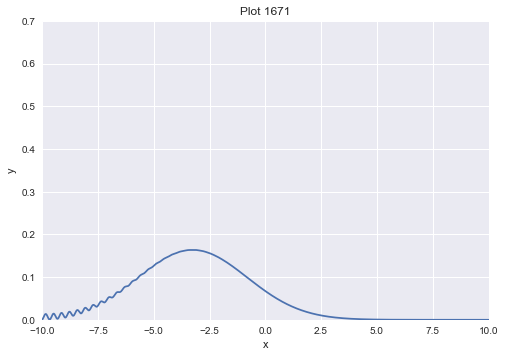

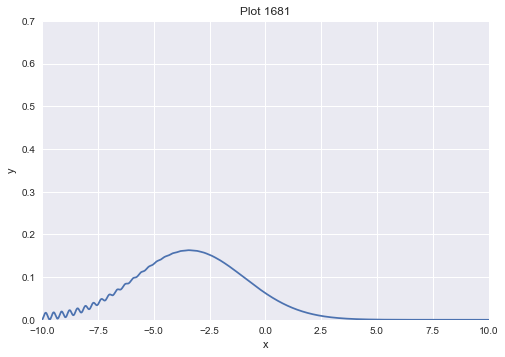

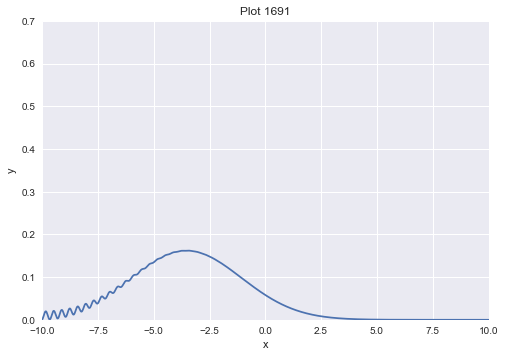

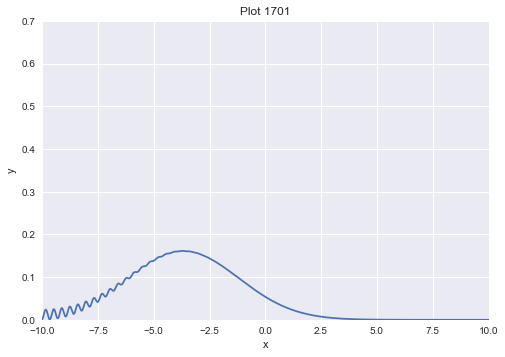

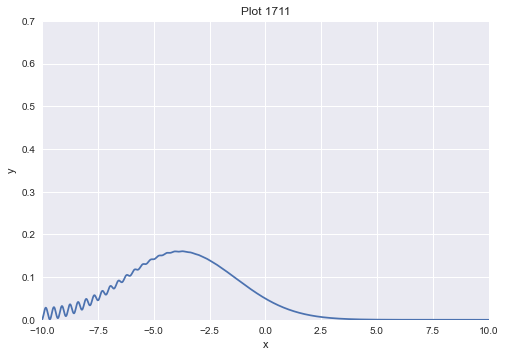

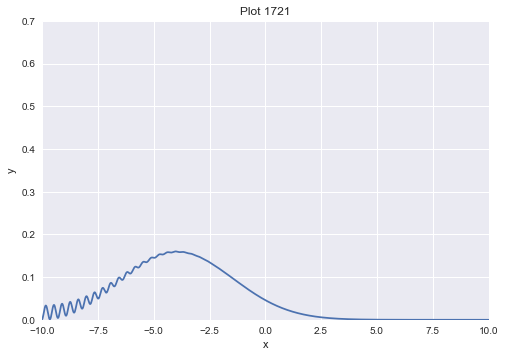

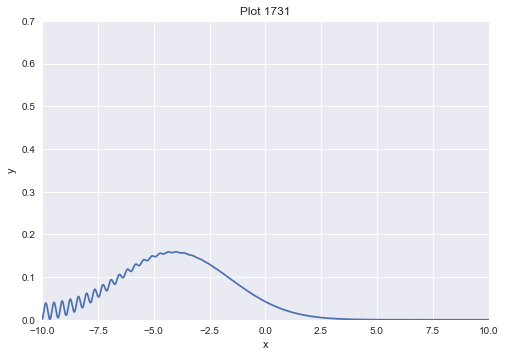

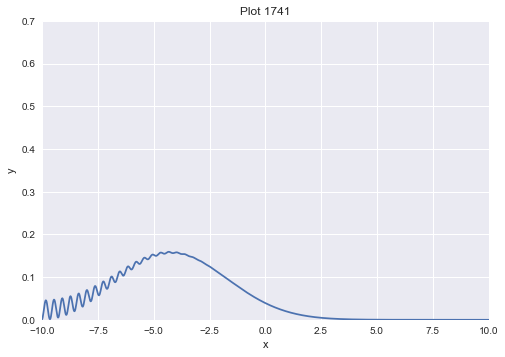

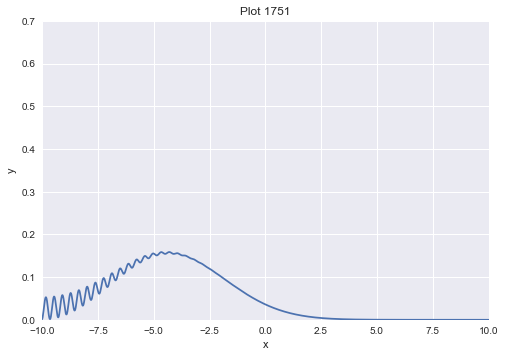

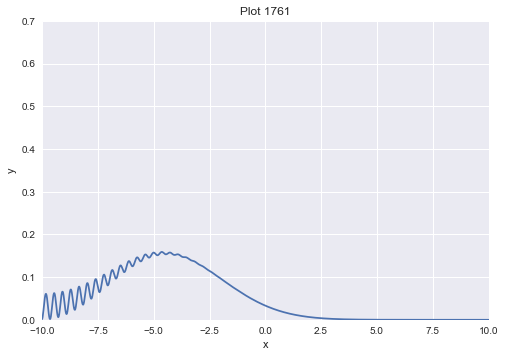

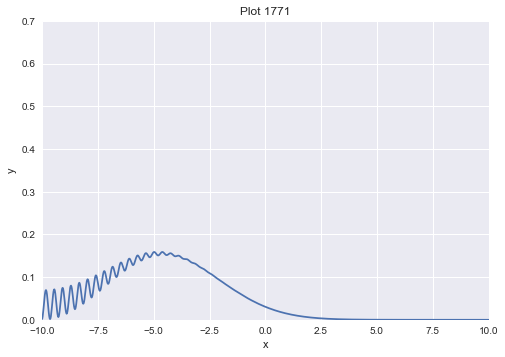

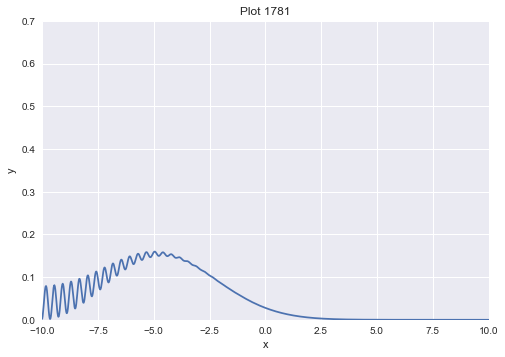

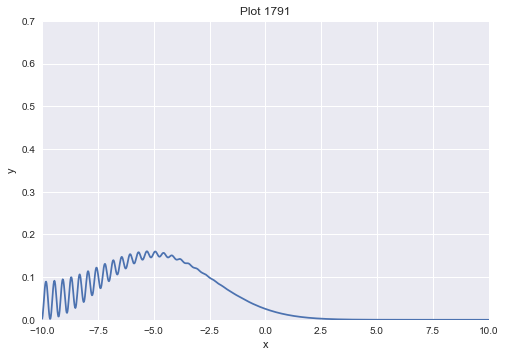

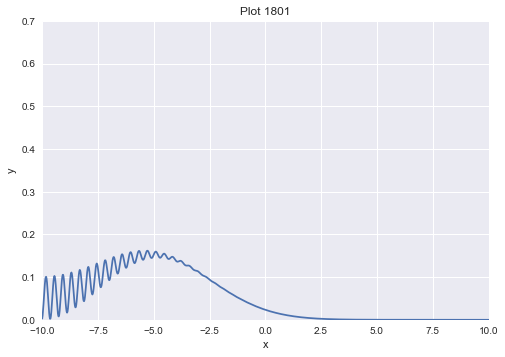

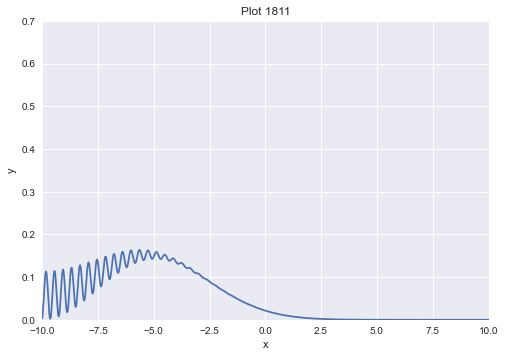

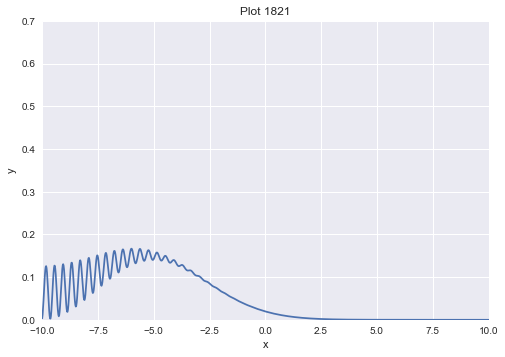

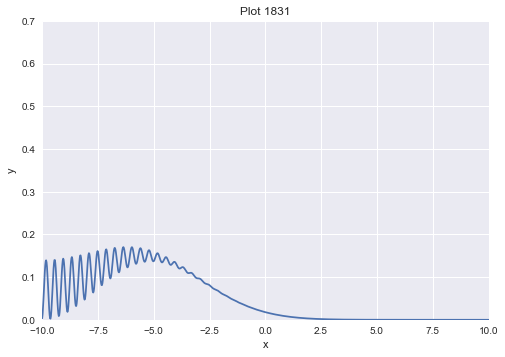

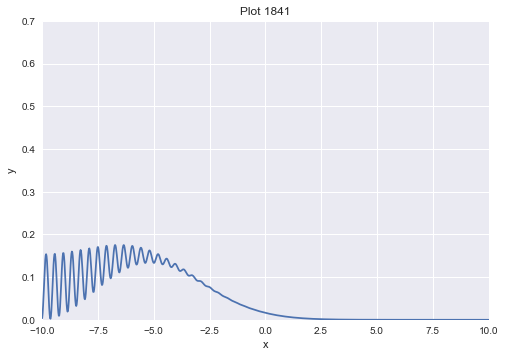

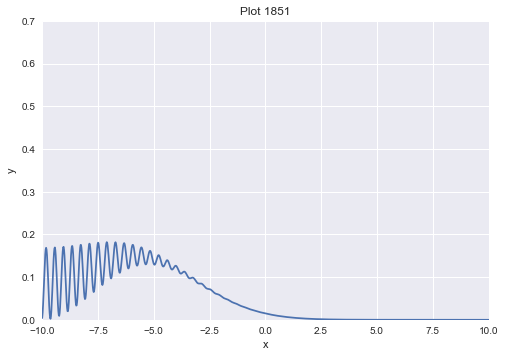

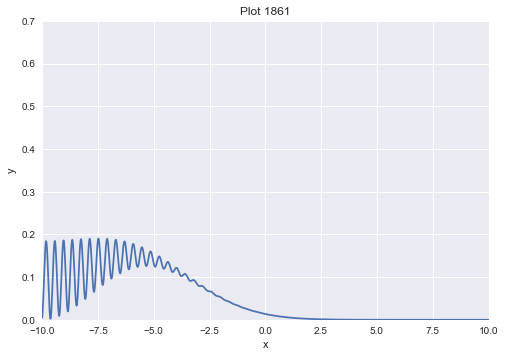

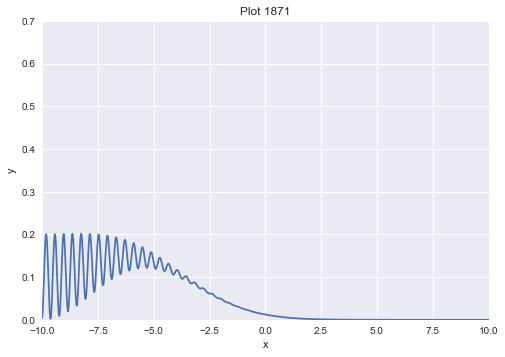

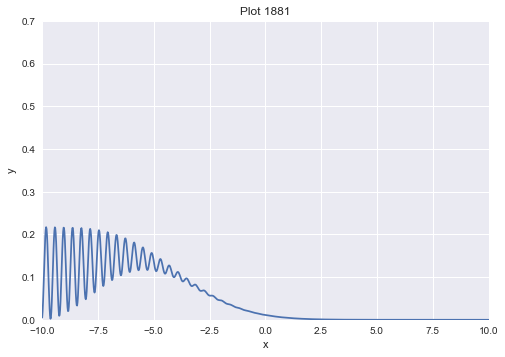

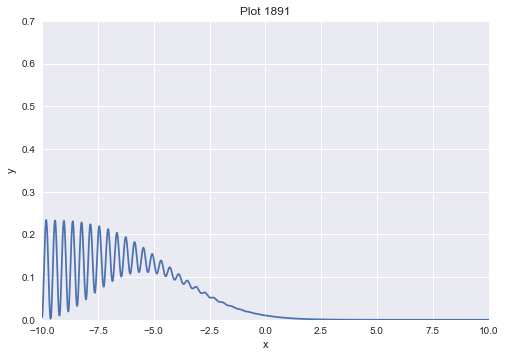

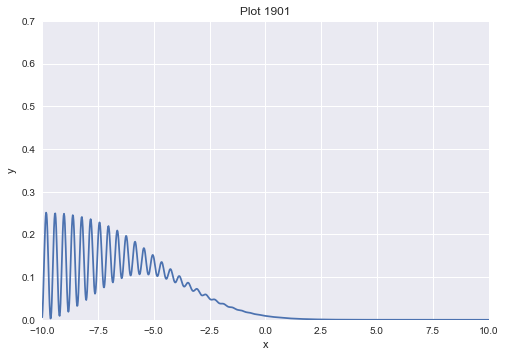

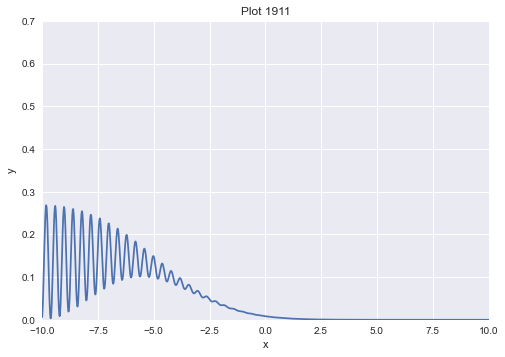

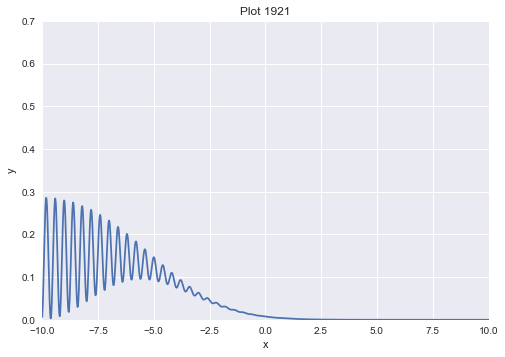

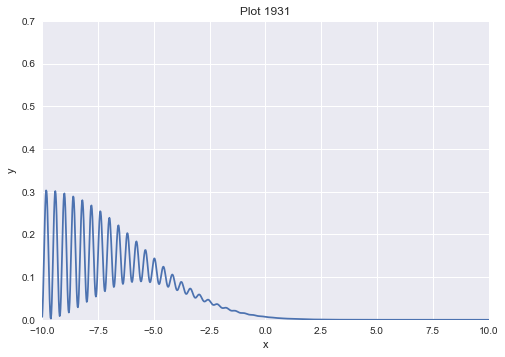

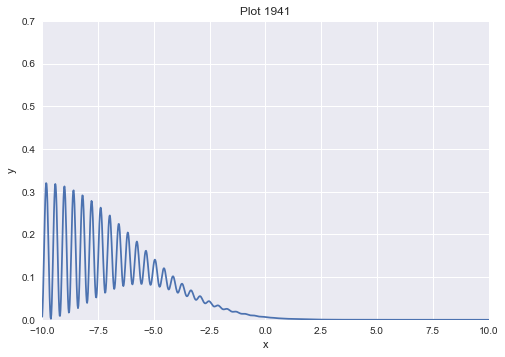

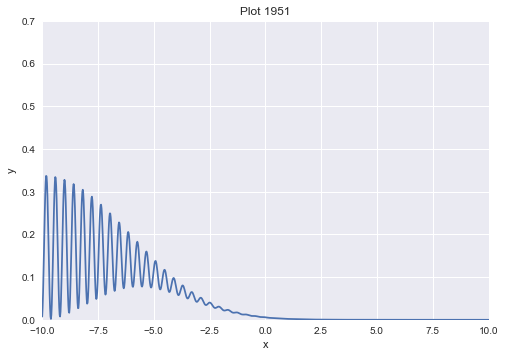

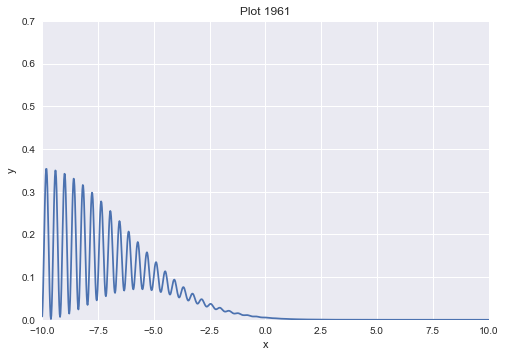

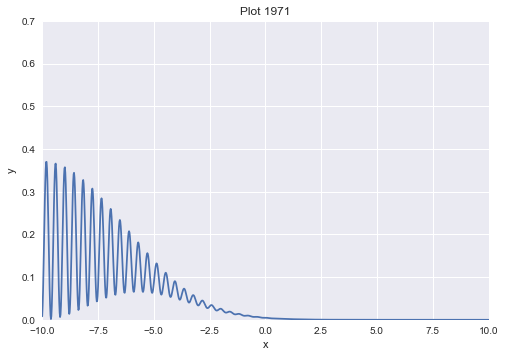

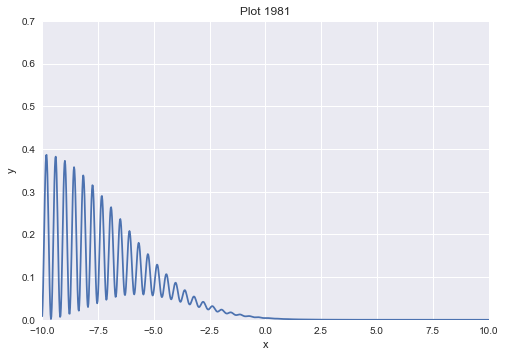

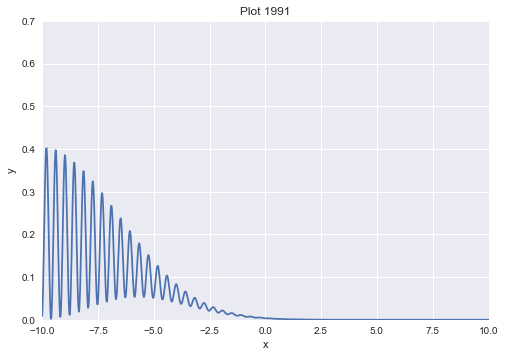

In [85]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 2000, 10):
    
    fig, ax = plt.subplots()
    
    
    ax.plot(x_Range, np.absolute(PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
   


    ax.set_title(f'Plot {i + 1}')
    plt.savefig(f'images/plot_{i + 1:03d}.png')

    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()   
    plt.close()
#There is too much amount of reflection

# Code for Video

In [63]:
import cv2
import os

In [64]:
if not os.path.exists('images'):
    os.makedirs('images')

In [91]:
img_array = []
for i in range(2000):
    filename = f'images/plot_{i + 1:03d}.png'
    img = cv2.imread(filename)
    img_array.append(img)

In [92]:

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:\\movie.mp4', fourcc, 10, img_array[0].shape[:2][::-1])
for i in range(len(img_array)):
    out.write(img_array[i])

# Release the video file
out.release()

# ABCs Codes

# Linear Approximation Method

In [93]:
#lets first define what are g1 and g2, and initialize some of the more variables. 

alpha1 = 37                          #Changing the alpha1 and alpha2, in some ratio, 
                                     #changes the nature of absorbing boundary conditions heavily                 
alpha2 = 39


g1 = (np.sqrt(2*m*alpha2) - np.sqrt(2*m*alpha1))/(alpha2 - alpha1)              #The parameters are defined in our report
g2 = (alpha2*np.sqrt(2*m*alpha1) - alpha1*np.sqrt(2*m*alpha2))/(alpha2 - alpha1)

In [94]:
def LAM_ABC(g1, g2, V,dt,dx,m, k0):
    
    """
    The function will provide the necessary matrix, for solving Schodinger Wave Equation using
    Crank Nikolson Scheme, with Linear Approximation method of Absorbing Boundary Conditions
    
    
    The functions take the input as, 
    
    Potential Array, whose length should be equal to number of gird points
    g1 and g2 are parameters derived in our report. 

    
    dt - Time step
    dx - grid step
    m - mass, which is fixed in our case as 0.5
    k0 - Parameter of guassian, changing this, changes the shape of guassian, to much extent
    """
    c1 = 1
    c2 = g2/g1        #again, named c1 as ratio of g2/g1

    LAM_zeta1_0 = ( -1j/(2*dx*g1) - 1j*c1/(2*dt) + (c1*V[0] - c2)/4 )        #each term was derived in our report
    LAM_zeta1_J = ( -1j/(2*dx*g1) - 1j*c1/(2*dt) + (c1*V[-1] - c2)/4 )
    LAM_zeta2_0 = (  1j/(2*dx*g1) - 1j*c1/(2*dt) + (c1*V[0] - c2)/4 )
    LAM_zeta2_J = (  1j/(2*dx*g1) - 1j*c1/(2*dt) + (c1*V[-1] - c2)/4 )
    LAM_zeta3_0 = (  1j/(2*dx*g1) - 1j*c1/(2*dt) - (c1*V[0] - c2)/4 )
    LAM_zeta3_J = (  1j/(2*dx*g1) - 1j*c1/(2*dt) - (c1*V[-1] - c2)/4 )
    LAM_zeta4_0 = ( -1j/(2*dx*g1) - 1j*c1/(2*dt) - (c1*V[0] - c2)/4 )
    LAM_zeta4_J = ( -1j/(2*dx*g1) - 1j*c1/(2*dt) - (c1*V[-1] - c2)/4 )
    LAM_ZETA = np.array([[0,LAM_zeta1_0,LAM_zeta2_0,LAM_zeta3_0,LAM_zeta4_0],      #matrix was made, so that we can use each coefficients
                       [0,LAM_zeta1_J,LAM_zeta2_J,LAM_zeta3_J,LAM_zeta4_J]])
    LAM_ZETA = np.transpose(LAM_ZETA)
    
    return LAM_ZETA

In [95]:
help(LAM_ABC)

Help on function LAM_ABC in module __main__:

LAM_ABC(g1, g2, V, dt, dx, m, k0)
    The function will provide the necessary matrix, for solving Schodinger Wave Equation using
    Crank Nikolson Scheme, with Linear Approximation method of Absorbing Boundary Conditions
    
    
    The functions take the input as, 
    
    Potential Array, whose length should be equal to number of gird points
    g1 and g2 are parameters derived in our report. 
    
    
    dt - Time step
    dx - grid step
    m - mass, which is fixed in our case as 0.5
    k0 - Parameter of guassian, changing this, changes the shape of guassian, to much extent



In [96]:
LAM_zeta = LAM_ABC(g1, g2, V,dt,dx,m, k0)
LAM_zeta

array([[ 0.          +0.j        ,  0.          +0.j        ],
       [-9.49670996-815.28247552j, -9.49670996-815.28247552j],
       [-9.49670996-184.71752448j, -9.49670996-184.71752448j],
       [ 9.49670996-184.71752448j,  9.49670996-184.71752448j],
       [ 9.49670996-815.28247552j,  9.49670996-815.28247552j]])

In [97]:
LAM_psi0 = Gaussian_Function(x_Range, centre, k0, sigma)

In [98]:
LAM_PSI = np.zeros((J,N),complex)                   #Generating the 2D Array of complete wave function
LAM_PSI[:,0] = LAM_psi0                                 #Initializing the wave function at time t = 0


In [99]:
def CN_LAM(J,V,LAM_zeta,dx,dt,m):
    
    
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    LAM_zeta - ABC which is defined for Rational Functiuon Approximation
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    """
    LAM_one     = np.ones((J),complex)                      #General Variables, must need to define for CN Method
    LAM_alpha   = (1j)*dt/(4*m*dx**2)               
    LAM_xi    = LAM_one + 1j*dt/2*(1/(m*dx**2)*LAM_one + V)   
    LAM_gamma   = LAM_one - 1j*dt/2*(1/(m*dx**2)*LAM_one + V)  
    LAM_xi[0]  = LAM_zeta[1,0];                                        LAM_xi[J-1]   = LAM_zeta[1,-1]   
    LAM_gamma[0] = LAM_zeta[3,0];                                      LAM_gamma[J-1] = LAM_zeta[3,-1]
    LAM_up1     = (-LAM_alpha)*np.copy(LAM_one) ;                      LAM_up2 = LAM_alpha*np.copy(LAM_one); 
    LAM_up1[1]  = LAM_zeta[2,0]           ;                            LAM_up2[1]  = LAM_zeta[4,0]
    LAM_dn1     = (-LAM_alpha)*np.copy(LAM_one) ;                      LAM_dn2     = LAM_alpha*np.copy(LAM_one);
    LAM_dn1[J-2]= LAM_zeta[2,-1]           ;                           LAM_dn2[J-2]= LAM_zeta[4,-1]
    LAM_vecs1 = np.array([LAM_dn1,LAM_xi,LAM_up1]) ;                   LAM_vecs2 = np.array([LAM_dn2,LAM_gamma,LAM_up2])


    diags = np.array([-1,0,+1])
    LAM_U1    = sparse.spdiags(LAM_vecs1,diags,J,J)
    LAM_U1    = LAM_U1.tocsc()
    LAM_U2    = sparse.spdiags(LAM_vecs2,diags,J,J)
    LAM_U2    = LAM_U2.tocsc()
    
    return LAM_U1, LAM_U2

In [100]:
help(CN_LAM)

Help on function CN_LAM in module __main__:

CN_LAM(J, V, LAM_zeta, dx, dt, m)
    The function takes the input as, 
    J - length of array
    V - Potential array
    LAM_zeta - ABC which is defined for Rational Functiuon Approximation
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5



In [101]:
LAM_U1, LAM_U2 = CN_LAM(J, V, LAM_zeta, dx, dt, m)

In [102]:
#defining the code for solving the equation with Linear Approximation method

def LAM_CN_Solve(x_Range,dx,t,dt,LAM_psi0,V, m):
    """
    This fucntion solve the schrodinger wave equation for Linear Approximation method, knowing the fucntions, CM_LAM, 
    and LAM_ZETA
    
    This requires the input,
    x_Range - Range of grid points
    dx, dt, time points, 
    m which is fixed
    LAM_psi0, which is initial wave packet
    
    
    """
    J = len(x_Range)
    N = len(t)
    
    LAM_PSI      = np.zeros((J,N),complex)
    LAM_PSI[:,0] = LAM_psi0
    
    LAM_zeta   = LAM_ABC(g1, g2, V,dt,dx,m, k0)
    LAM_U1, LAM_U2 = CN_LAM(J,V,LAM_zeta,dx,dt,m)
    
    LAM_LU = splin.splu(LAM_U1)   
    
    for n in range(0,N - 1):          
        b = LAM_U2.dot(LAM_PSI[:,n])           
        LAM_PSI[:,n + 1] = LAM_LU.solve(b)
        
    return LAM_PSI

In [103]:
help(LAM_CN_Solve)

Help on function LAM_CN_Solve in module __main__:

LAM_CN_Solve(x_Range, dx, t, dt, LAM_psi0, V, m)
    This fucntion solve the schrodinger wave equation for Linear Approximation method, knowing the fucntions, CM_LAM, 
    and LAM_ZETA
    
    This requires the input,
    x_Range - Range of grid points
    dx, dt, time points, 
    m which is fixed
    LAM_psi0, which is initial wave packet



In [104]:
LAM_PSI = LAM_CN_Solve(x_Range,dx,t,dt,LAM_psi0,V, m)

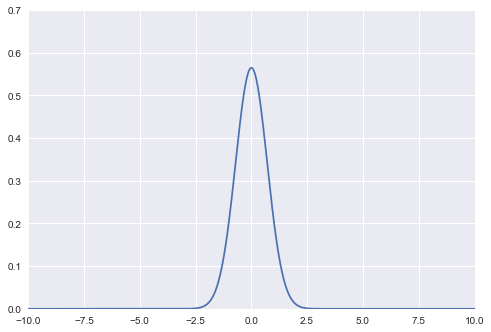

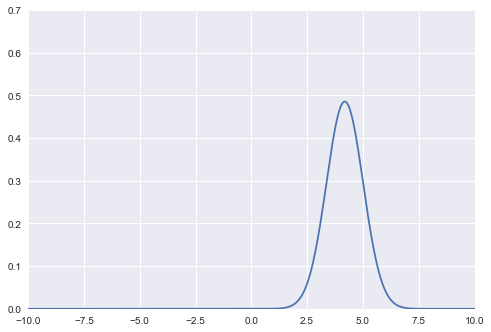

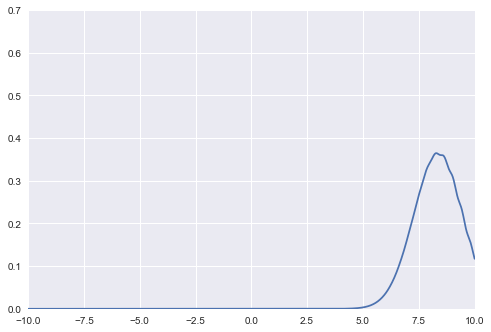

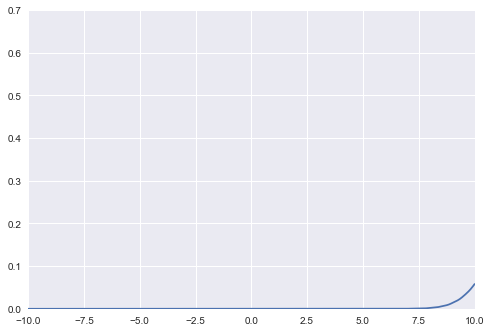

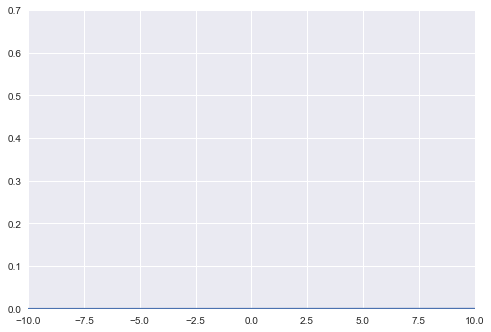

In [105]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 300):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(LAM_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished to much extent

# Rational Function Approximation

In [106]:
def RFA_ABC(V,dt,dx,m, k0):
    """
    The fucntions atke the inpur as, 
    
    V - Potential array, 
    dt
    dx, 
    mass which is fixed as 0.5
    and k0, parameter for Gaussian
    
    This computes the required elements for changing ABCs. 
    
    """
    d = 1/(dt*dx)
    RFA_zeta1_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[0] - k0**3)/4 )
    RFA_zeta1_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
    RFA_zeta2_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
    RFA_zeta2_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )
    RFA_zeta3_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d +(V[0] - k0**3)/4 )
    RFA_zeta3_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
    RFA_zeta4_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
    RFA_zeta4_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )

    RFA_ZETA = np.array([[0,RFA_zeta1_0, RFA_zeta2_0, RFA_zeta3_0,RFA_zeta4_0],
                       [0,RFA_zeta1_J,RFA_zeta2_J,RFA_zeta3_J,RFA_zeta4_J]])
    RFA_ZETA = np.transpose(RFA_ZETA)
    return RFA_ZETA



In [107]:
help(RFA_ABC)

Help on function RFA_ABC in module __main__:

RFA_ABC(V, dt, dx, m, k0)
    The fucntions atke the inpur as, 
    
    V - Potential array, 
    dt
    dx, 
    mass which is fixed as 0.5
    and k0, parameter for Gaussian
    
    This computes the required elements for changing ABCs.



In [108]:
RFA_zeta = RFA_ABC(V, dt, dx, m, k0)
RFA_zeta

array([[     0.      +0.j   ,      0.      +0.j   ],
       [ 51064.25-14259.525j,  51064.25-14259.525j],
       [-51235.75 -6740.475j, -51235.75 -6740.475j],
       [ 51064.25 -6740.475j,  51064.25 -6740.475j],
       [-51235.75-14259.525j, -51235.75-14259.525j]])

In [109]:
def CN_RFA(J,V,RFA_zeta,dx,dt,m):
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    RFA_Zeta - ABC which is defined for Rational Functiuon Approximation
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    """
    
    RFA_one     = np.ones((J),complex)
    RFA_alpha   = (1j)*dt/(4*m*dx**2)               
    RFA_xi    = RFA_one + 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   
    RFA_gamma   = RFA_one - 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   

    RFA_xi[0]  = RFA_zeta[1,0];                                                    RFA_xi[J-1]   = RFA_zeta[1,-1]
    RFA_gamma[0] = RFA_zeta[3,0];                                                  RFA_gamma[J-1] = RFA_zeta[3,-1]
    RFA_up1     = (-RFA_alpha)*np.copy(RFA_one) ;                                  RFA_up2     = RFA_alpha*np.copy(RFA_one); 
    RFA_up1[1]  = RFA_zeta[2,0]           ;                                        RFA_up2[1]  = RFA_zeta[4,0]
    RFA_dn1     = (-RFA_alpha)*np.copy(RFA_one) ;                                  RFA_dn2     = RFA_alpha*np.copy(RFA_one);
    RFA_dn1[J-2]= RFA_zeta[2,-1]           ;                                       RFA_dn2[J-2]= RFA_zeta[4,-1]


    RFA_vecs1 = np.array([RFA_dn1,RFA_xi,RFA_up1]) ;                    RFA_vecs2 = np.array([RFA_dn2,RFA_gamma,RFA_up2])
    diags = np.array([-1,0,+1])


    RFA_U1    = sparse.spdiags(RFA_vecs1,diags,J,J)
    RFA_U1    = RFA_U1.tocsc()
    RFA_U2    = sparse.spdiags(RFA_vecs2,diags,J,J)
    RFA_U2    = RFA_U2.tocsc()

    return RFA_U1, RFA_U2

In [110]:
#defining the code for solving the equation with Linear Approximation method

def RFA_CN_Solve(x_Range,dx,t,dt,LAM_psi0,V,m):
    """
    This fucntion solve the schrodinger wave equation for Linear Approximation method, knowing the fucntions, CM_LAM, 
    and LAM_ZETA
    
    This requires the input, 
    
    """
    J = len(x_Range)
    N = len(t)
    
    RFA_PSI      = np.zeros((J,N),complex)
    RFA_PSI[:,0] = RFA_psi0
    
    RFA_zeta   = RFA_ABC(V,dt,dx,m, k0)
    RFA_U1, RFA_U2 = CN_RFA(J,V,RFA_zeta,dx,dt,m)
    
    RFA_LU = splin.splu(RFA_U1)   
    
    for n in range(0,N - 1):          
        b = RFA_U2.dot(RFA_PSI[:,n])           
        RFA_PSI[:,n + 1] = RFA_LU.solve(b)
        
    return RFA_PSI

In [111]:
RFA_psi0 = Gaussian_Function(x_Range, centre, k0, sigma)


RFA_PSI = np.zeros((J,N),complex)                   #Generating the 2D Array of complete wave function
RFA_PSI[:,0] = RFA_psi0                                 #Initializing the wave function at time t = 0


In [112]:
RFA_PSI = RFA_CN_Solve(x_Range,dx,t,dt,RFA_psi0,V,m)

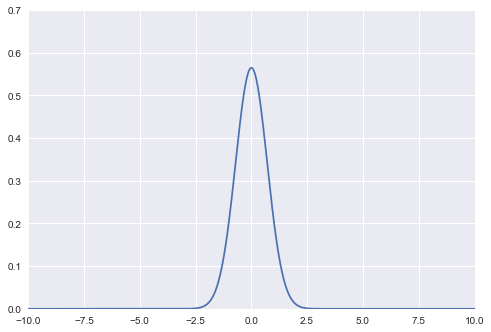

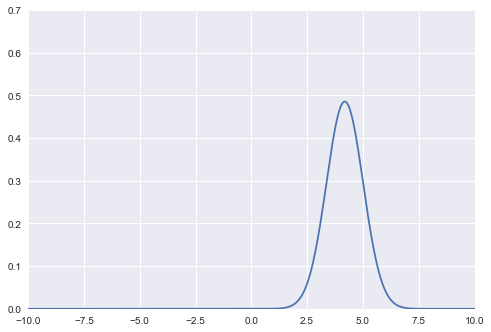

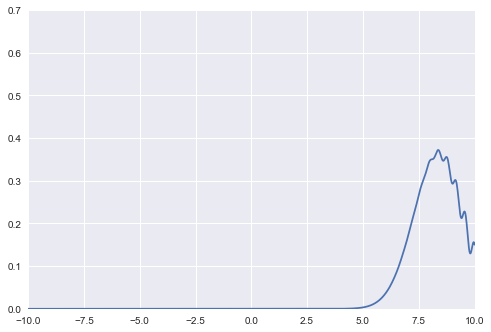

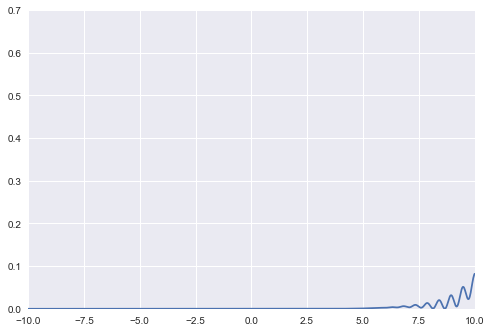

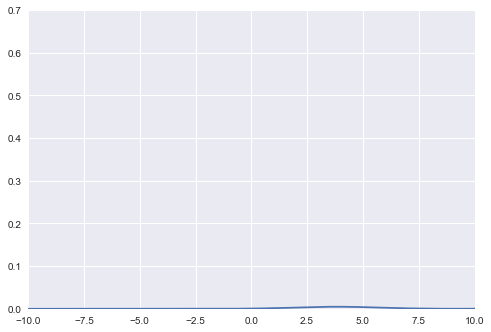

In [113]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 300):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(RFA_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished to much extent

# New Absorbing Boundary Conditions

# For p = 2, absorbing boundary conditions

In [114]:
def P2_ABC(q1,q2,V,dt,dx,m = 0.5):
    
    """
    ABC with p=2. This function computes the matrix zeta, for substituting in Crank Nikolson method. 
    """
    c1 = 2./(q1 + q2)
    c2 = (m*q1*q2)/(q1 + q2)
    zeta1_0 = ( -1j/(2*dx) - 1j*c1/(2*dt) + (c1*V[0] - c2)/4 )
    zeta1_J = ( -1j/(2*dx) - 1j*c1/(2*dt) + (c1*V[-1] - c2)/4 )
    zeta2_0 = (  1j/(2*dx) - 1j*c1/(2*dt) + (c1*V[0] - c2)/4 )
    zeta2_J = (  1j/(2*dx) - 1j*c1/(2*dt) + (c1*V[-1] - c2)/4 )
    zeta3_0 = (  1j/(2*dx) - 1j*c1/(2*dt) - (c1*V[0] - c2)/4 )
    zeta3_J = (  1j/(2*dx) - 1j*c1/(2*dt) - (c1*V[-1] - c2)/4 )
    zeta4_0 = ( -1j/(2*dx) - 1j*c1/(2*dt) - (c1*V[0] - c2)/4 )
    zeta4_J = ( -1j/(2*dx) - 1j*c1/(2*dt) - (c1*V[-1] - c2)/4 )
    P2zeta = np.array([[0,zeta1_0,zeta2_0,zeta3_0,zeta4_0],
                       [0,zeta1_J,zeta2_J,zeta3_J,zeta4_J]])
    P2zeta = np.transpose(P2zeta)
    return P2zeta


p2_zeta   = P2_ABC(q,q,V,dt,dx,m)
p2_zeta

array([[ 0.    +0.j        ,  0.    +0.j        ],
       [-0.875-61.28928571j, -0.875-61.28928571j],
       [-0.875-10.13928571j, -0.875-10.13928571j],
       [ 0.875-10.13928571j,  0.875-10.13928571j],
       [ 0.875-61.28928571j,  0.875-61.28928571j]])

In [115]:
def CN_P2(J,V,zeta,dx,dt,m):
    
    
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    P2_Zeta - ABC which is defined for P = 2 Absorbing boundary Conditions
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    """
    
    one     = np.ones((J),complex)
    alpha   = (1j)*dt/(4*m*dx**2)                
    xi    = one + 1j*dt/2*(1/(m*dx**2)*one + V)    
    gamma   = one - 1j*dt/2*(1/(m*dx**2)*one + V)   
    xi[0]  = zeta[1,0]; xi[J-1]   = zeta[1,-1]
    gamma[0] = zeta[3,0]; gamma[J-1] = zeta[3,-1]
    up1     = (-alpha)*np.copy(one) ; up2     = alpha*np.copy(one); 
    up1[1]  = zeta[2,0]           ; up2[1]  = zeta[4,0]
    dn1     = (-alpha)*np.copy(one) ; dn2     = alpha*np.copy(one);
    dn1[J-2]= zeta[2,-1]           ; dn2[J-2]= zeta[4,-1]
    vecs1 = np.array([dn1,xi,up1]) ; vecs2 = np.array([dn2,gamma,up2])
    diags = np.array([-1,0,+1])
    U1    = sparse.spdiags(vecs1,diags,J,J)
    U1    = U1.tocsc()
    U2    = sparse.spdiags(vecs2,diags,J,J)
    U2    = U2.tocsc()
    
    return U1, U2

In [116]:
p2_u1, p2_u2 = CN_P2(J, V, p2_zeta, dx, dt, m)

In [117]:
def p2_Solve_CN(x_Range,dx,t,dt,psi0,V, m):
    
    """
    This fucntion solves the Crank Niksolson metod matrix, and obtains the direct result of wave fucntion, 
    provided we properly defines the initial wave fucntion.
    
    Input taken, are x_Range,
    grid step, time step
    and initial wave fucntion, at t = 0
    Potential array
    m- which is fixed in our case as 0.5
    
    """
    J = len(x_Range)
    N = len(t)

    P2_PSI      = np.zeros((J,N),complex)
    P2_PSI[:,0] = psi0
    
    P2_U1, P2_U2 = CN_P2(J,V,p2_zeta, dx,dt,m)
    P2_LU  = splin.splu(P2_U1)
    
    for n in range(0,N - 1):          
        b = P2_U2.dot(P2_PSI[:,n])          
        P2_PSI[:,n + 1] = P2_LU.solve(b)
        
    return P2_PSI

In [118]:
p2_PSI = p2_Solve_CN(x_Range, dx, t, dt, psi0, V, m)

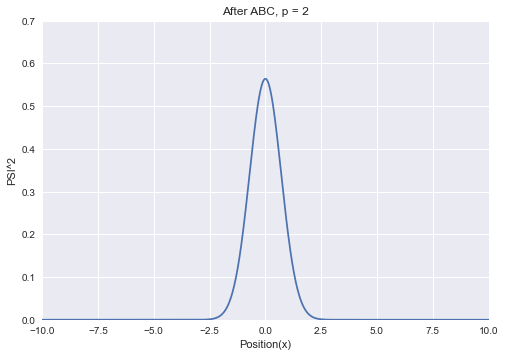

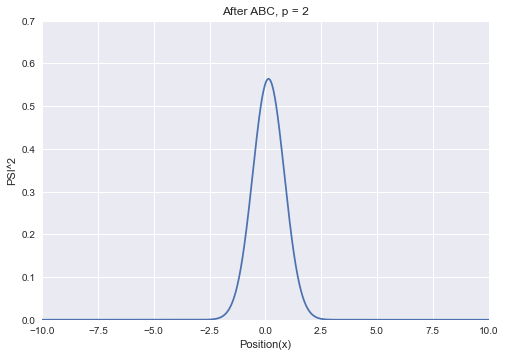

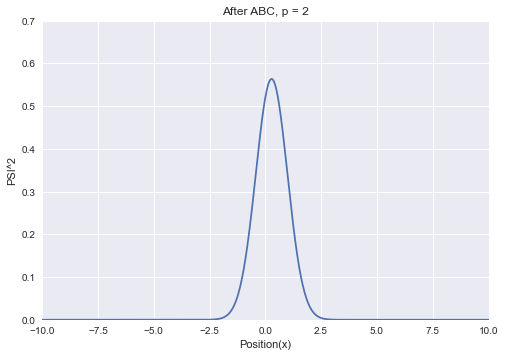

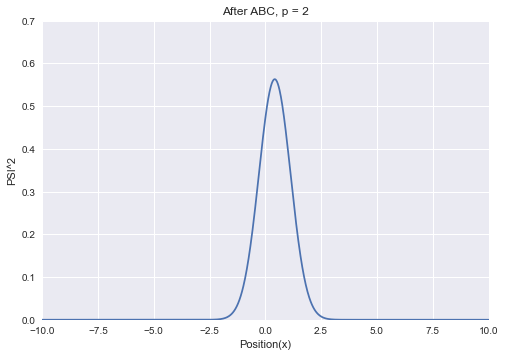

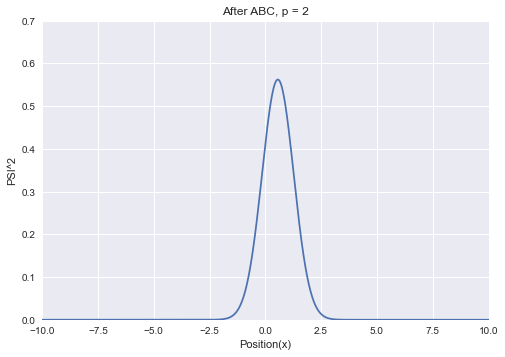

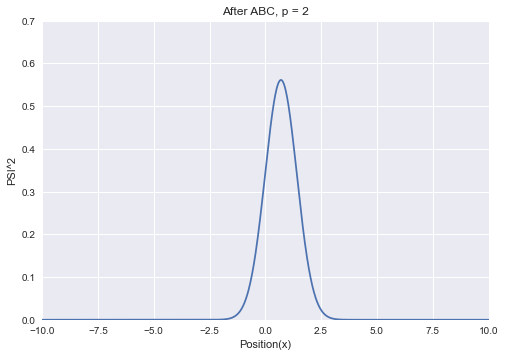

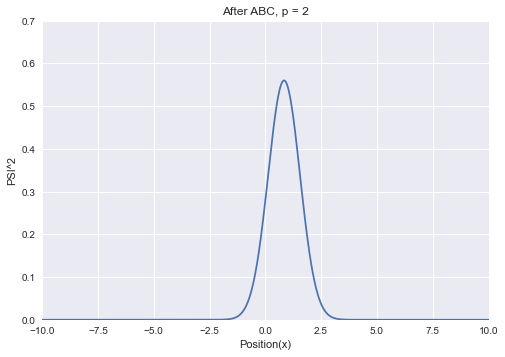

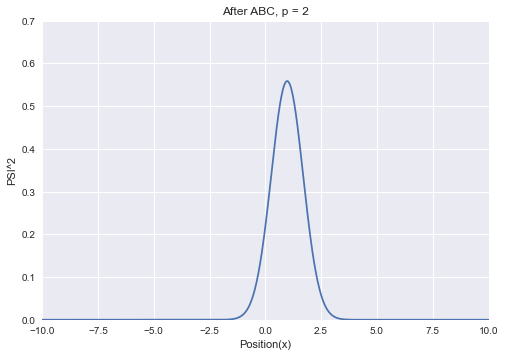

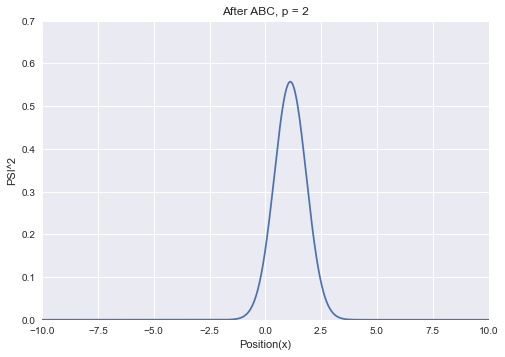

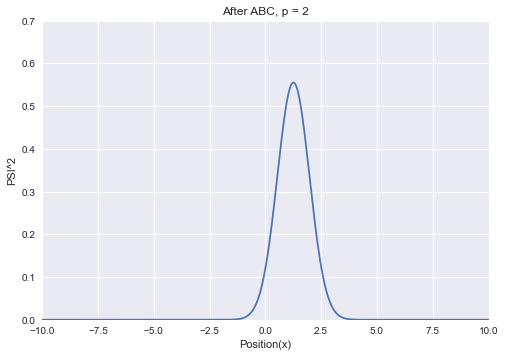

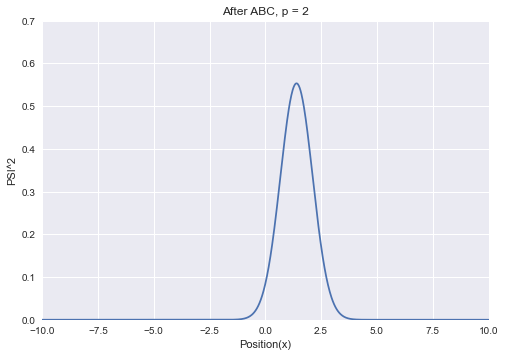

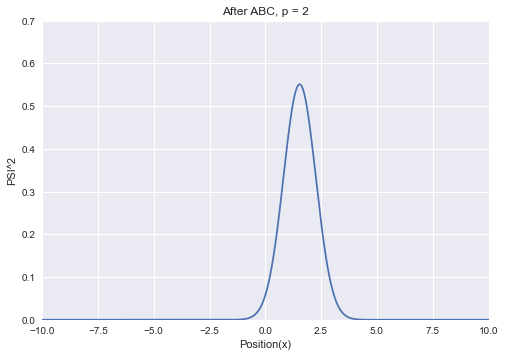

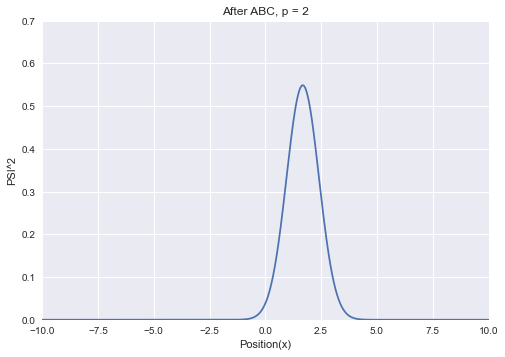

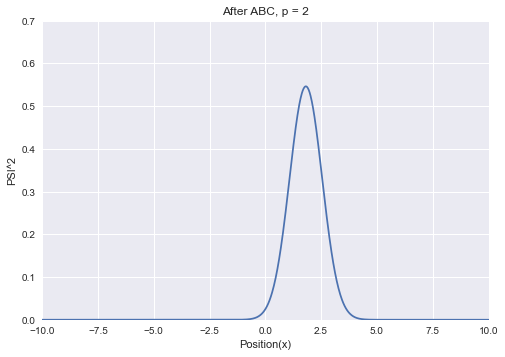

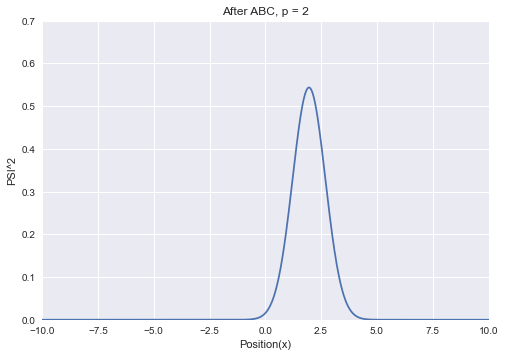

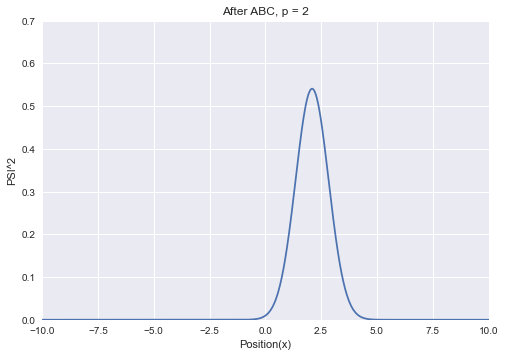

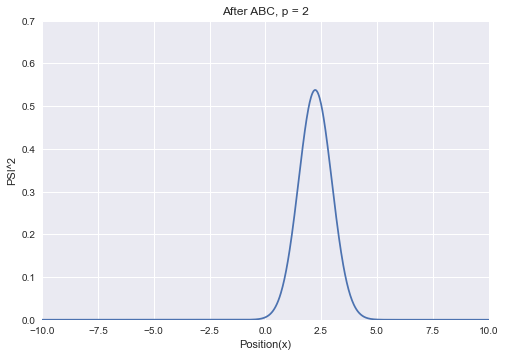

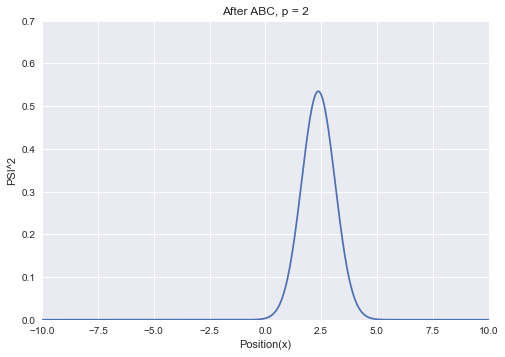

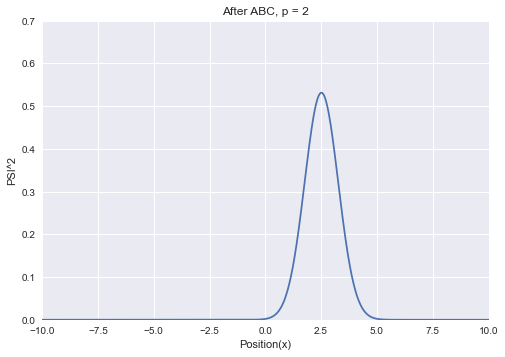

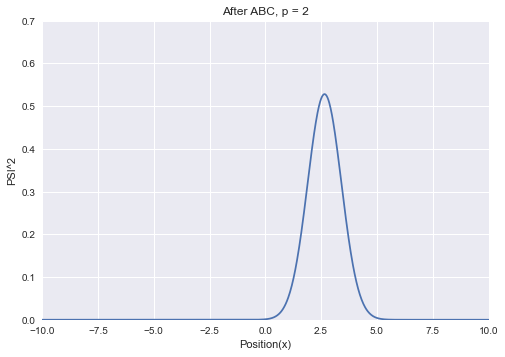

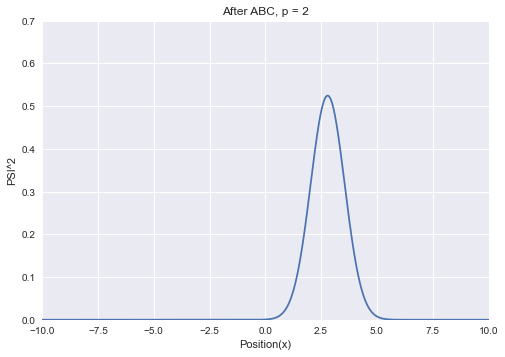

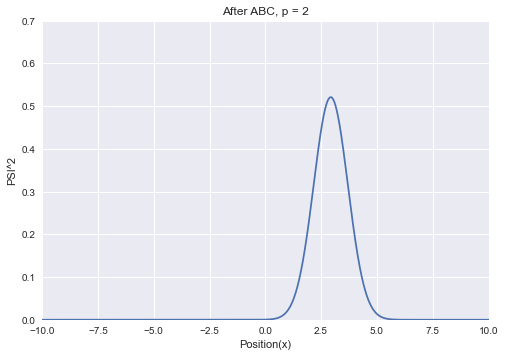

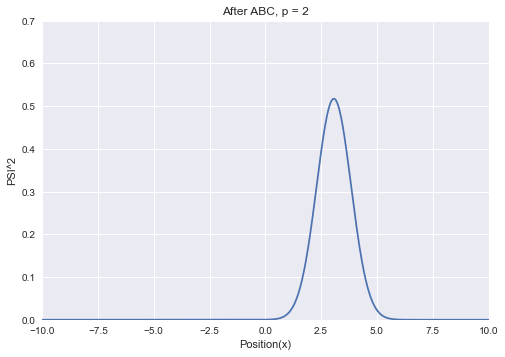

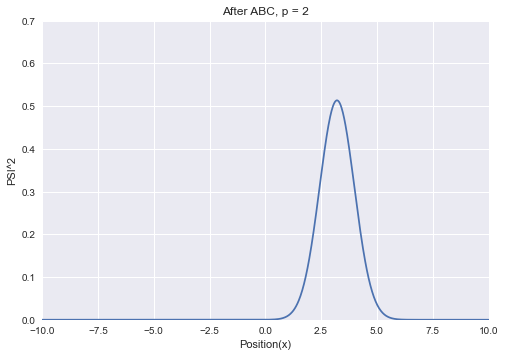

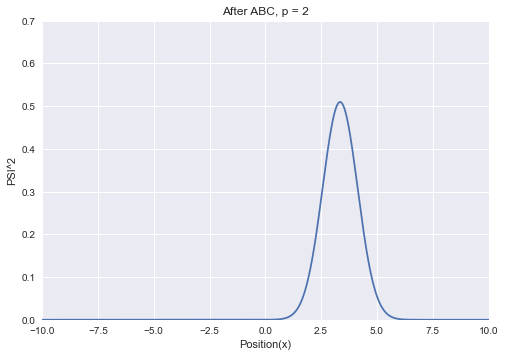

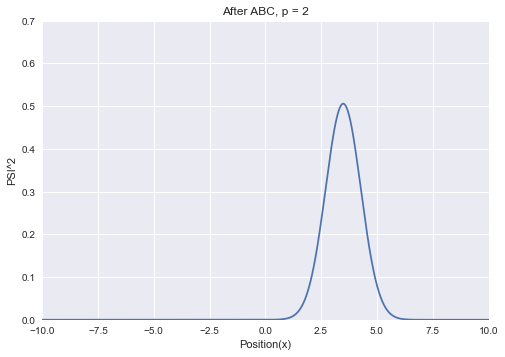

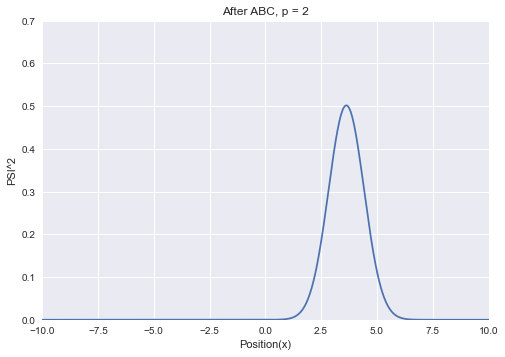

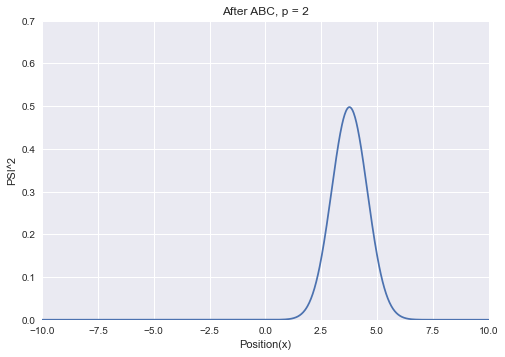

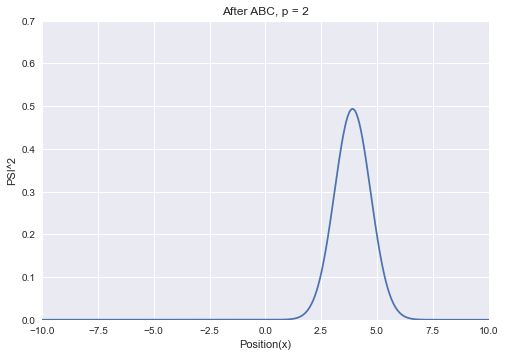

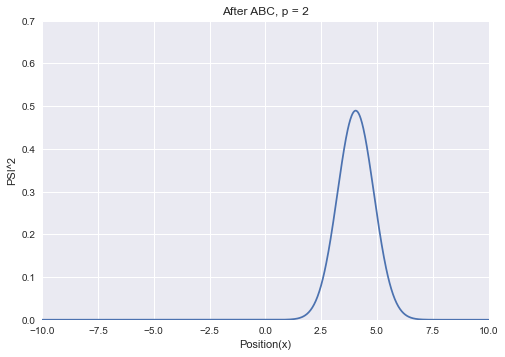

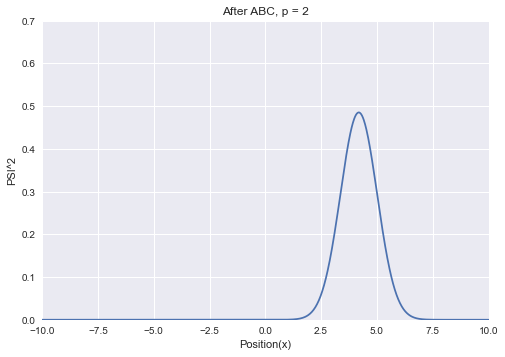

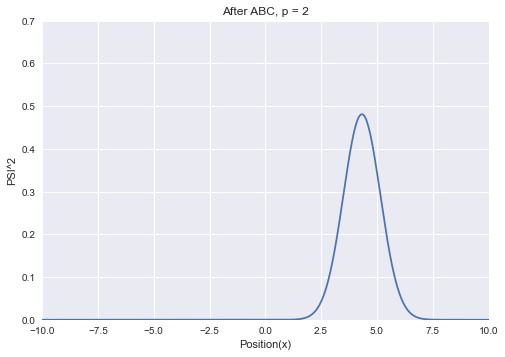

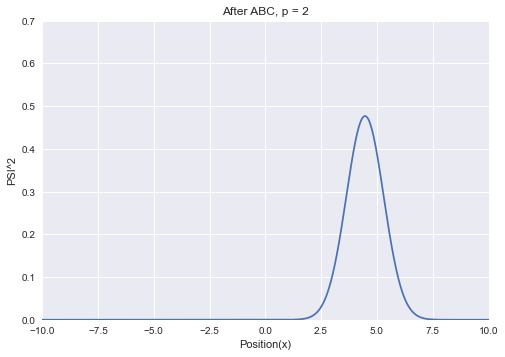

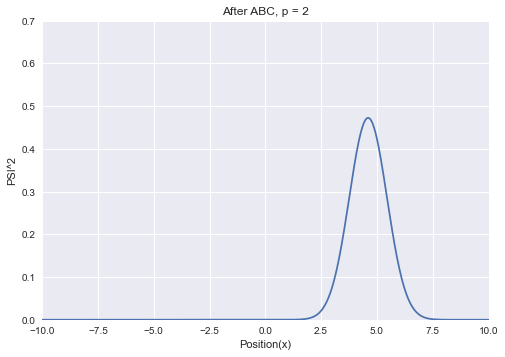

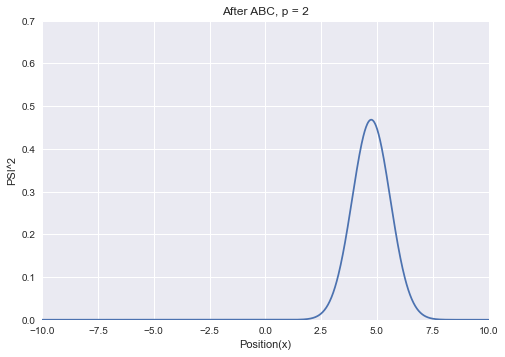

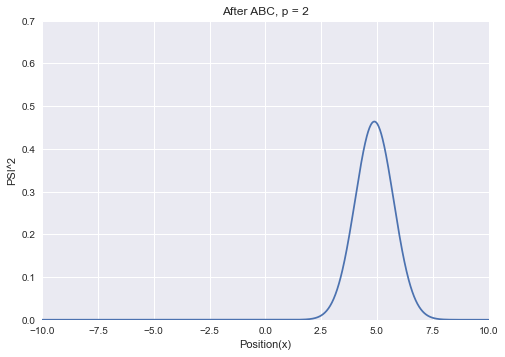

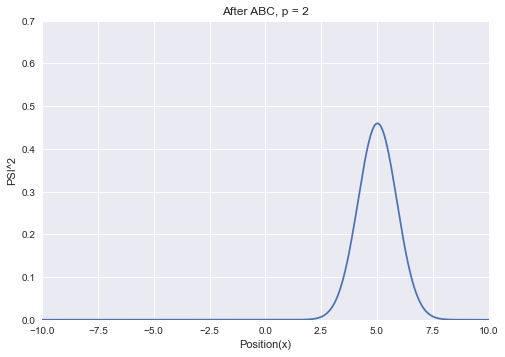

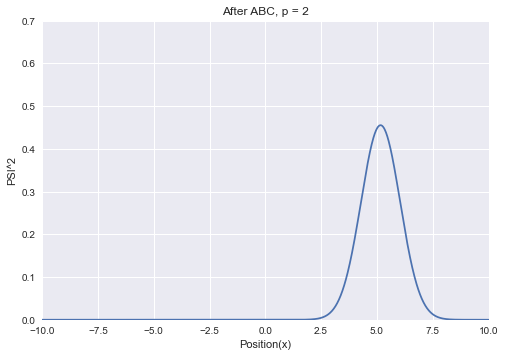

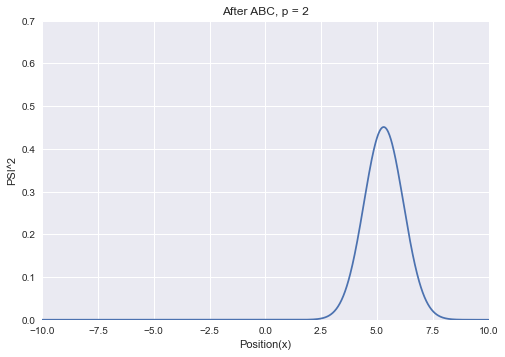

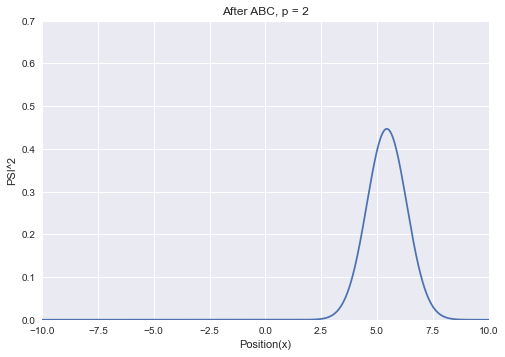

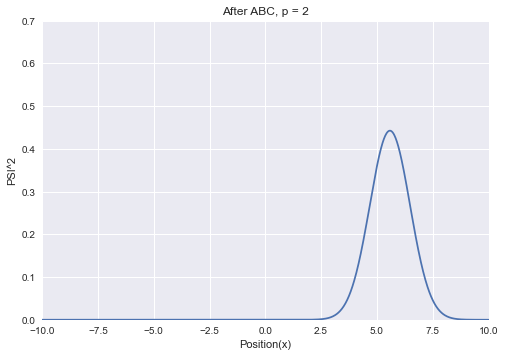

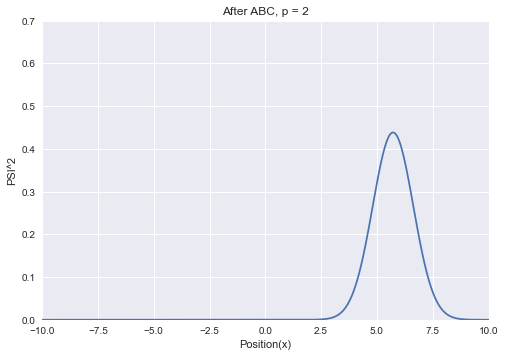

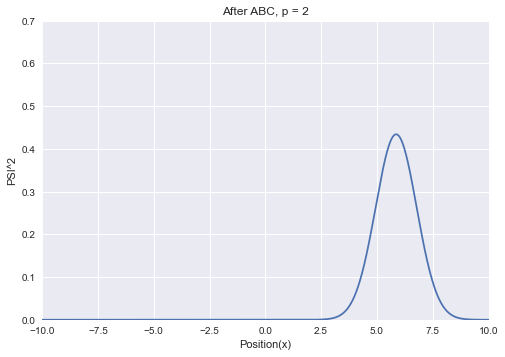

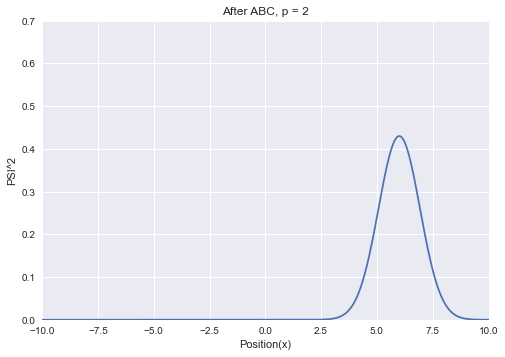

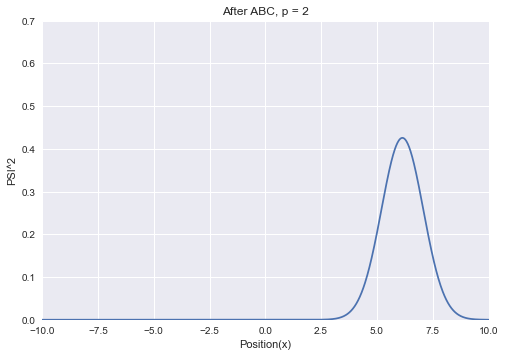

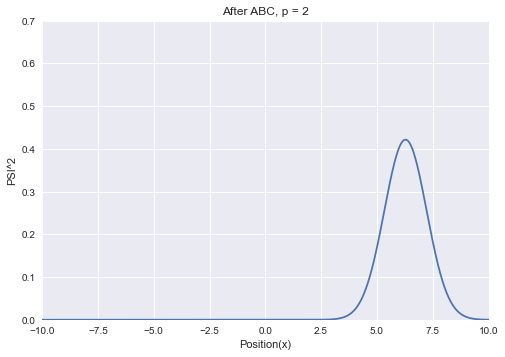

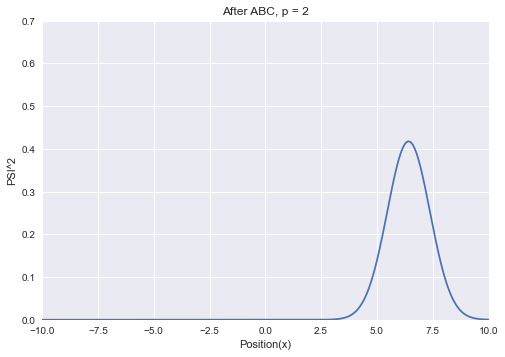

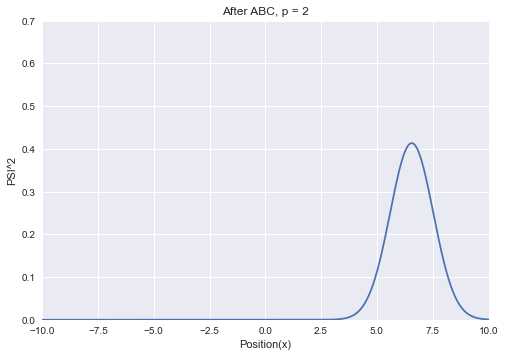

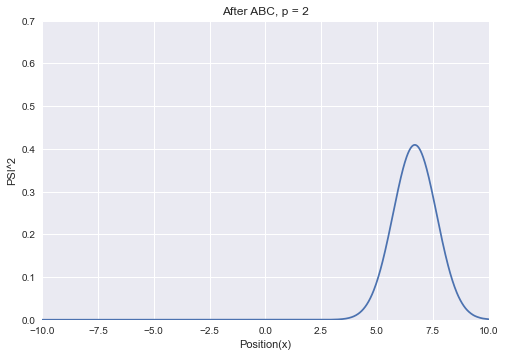

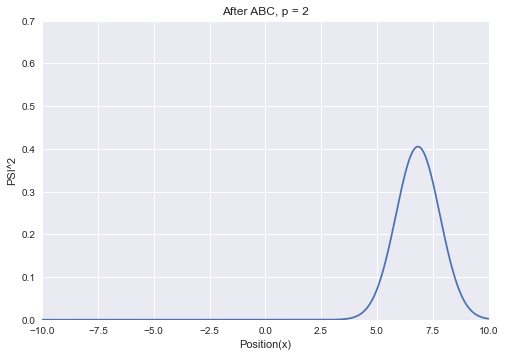

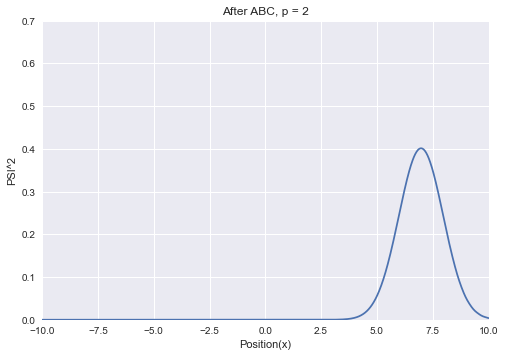

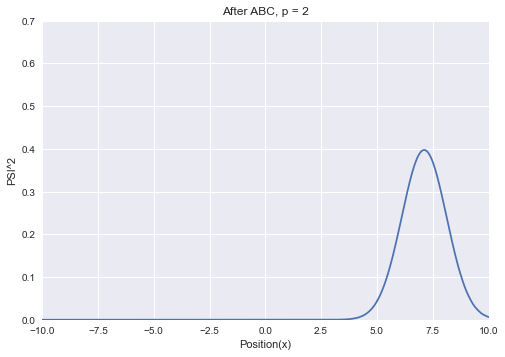

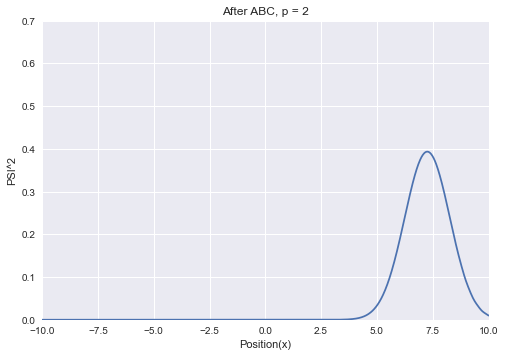

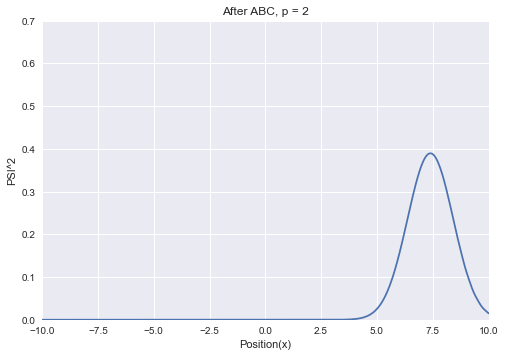

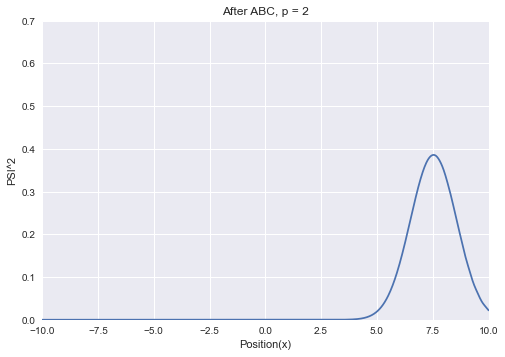

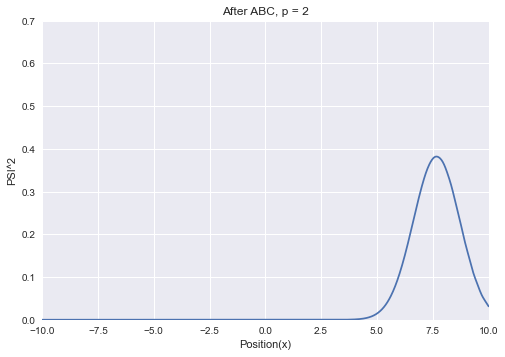

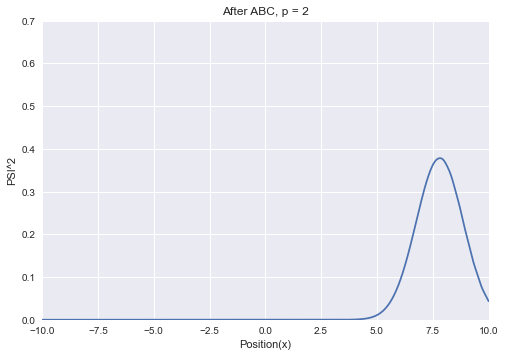

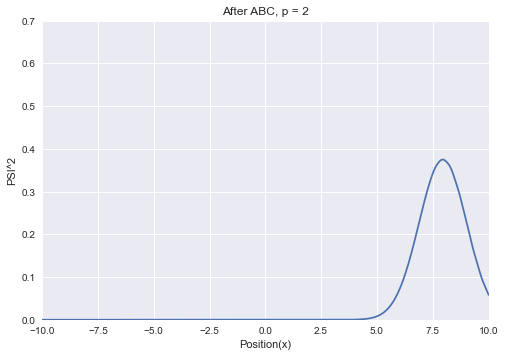

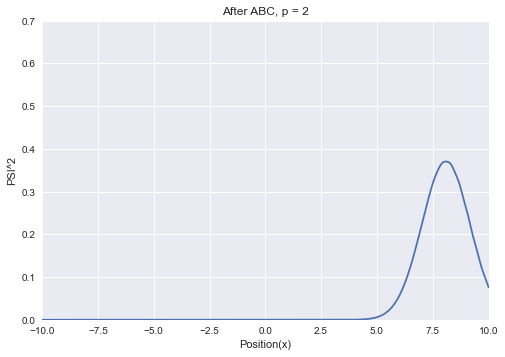

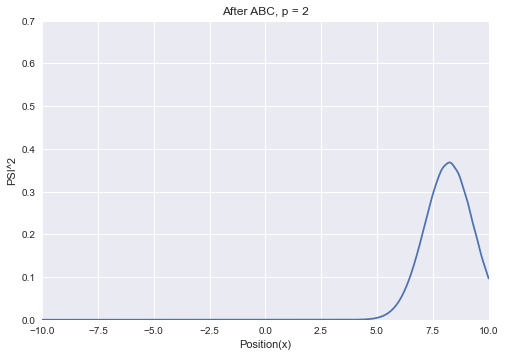

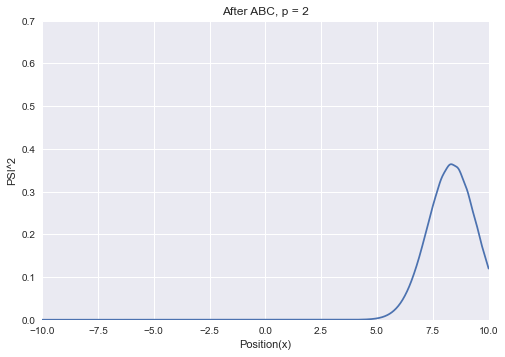

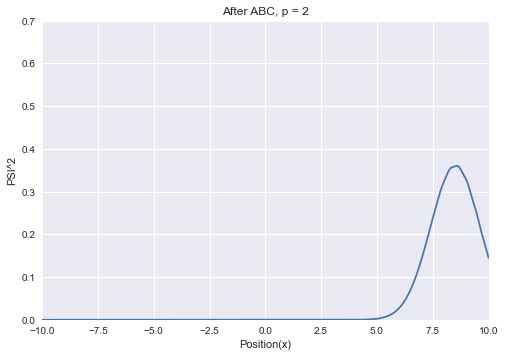

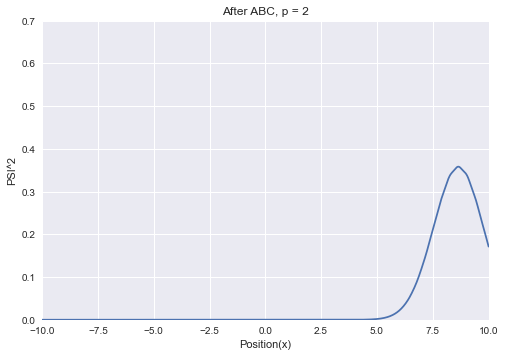

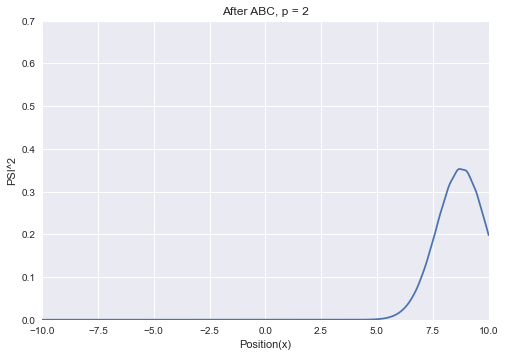

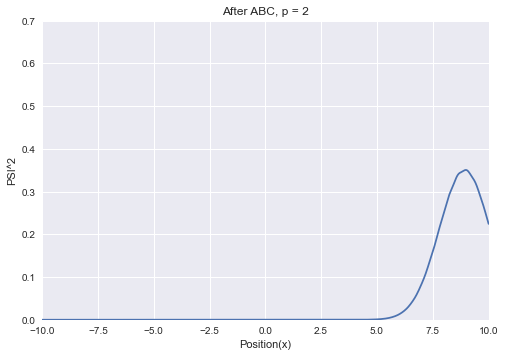

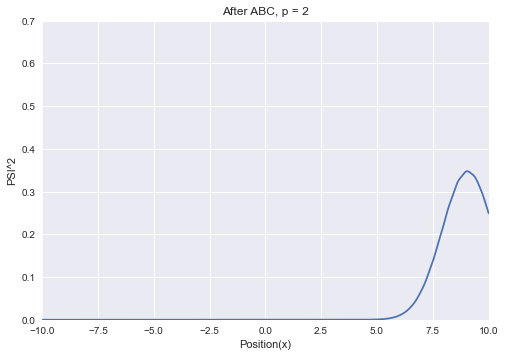

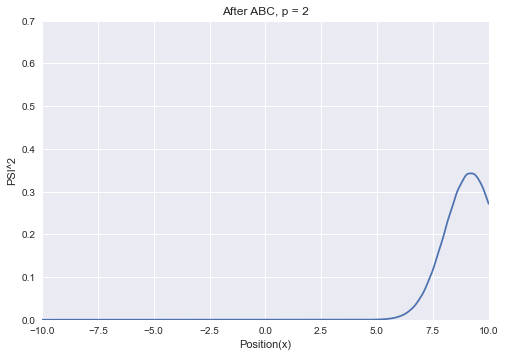

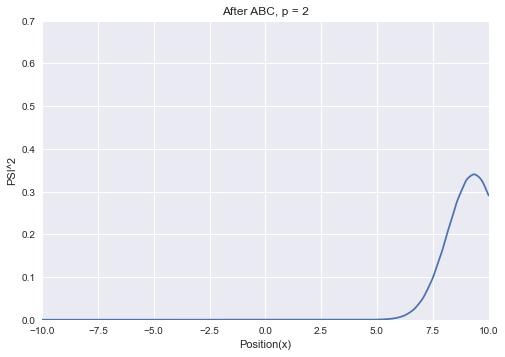

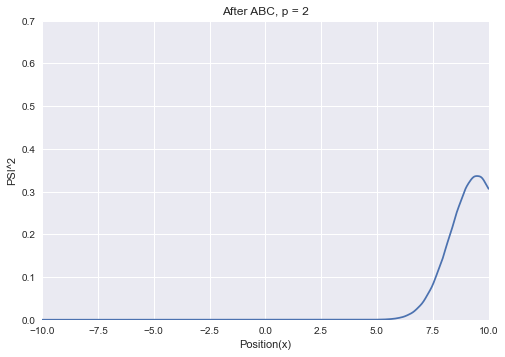

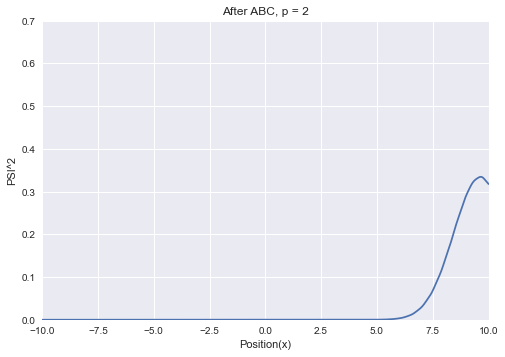

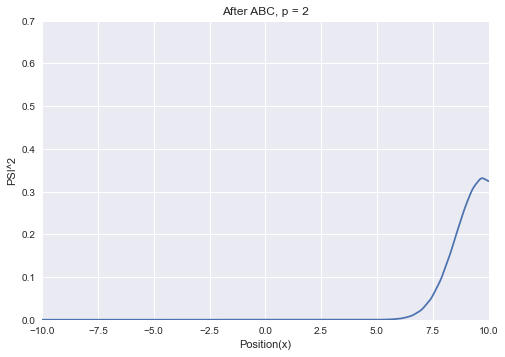

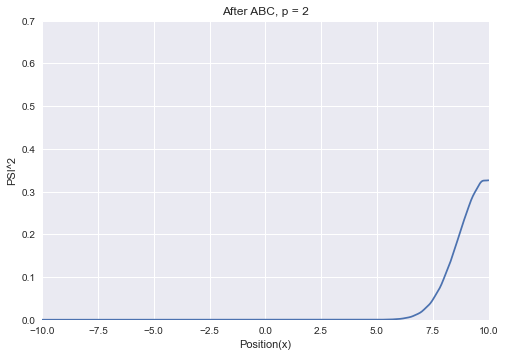

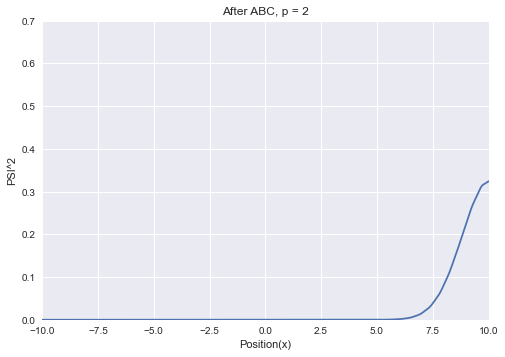

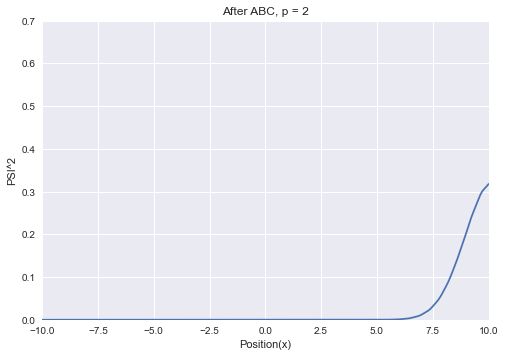

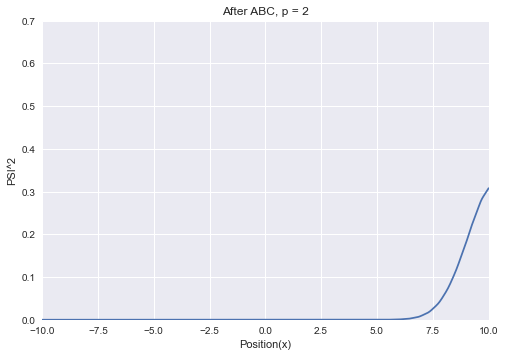

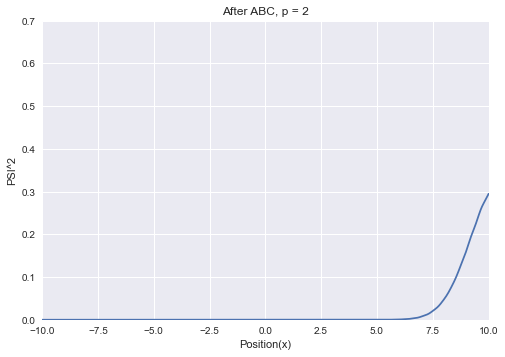

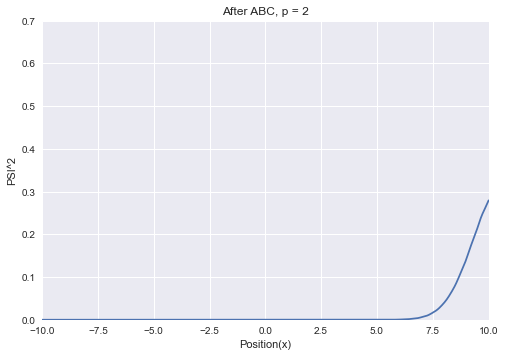

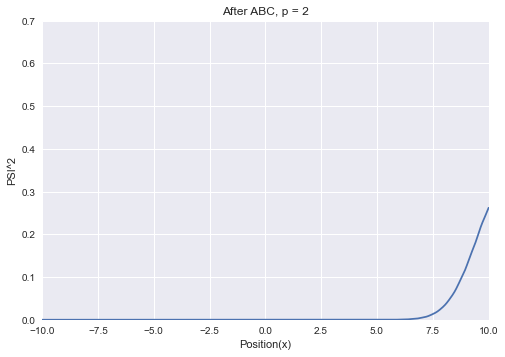

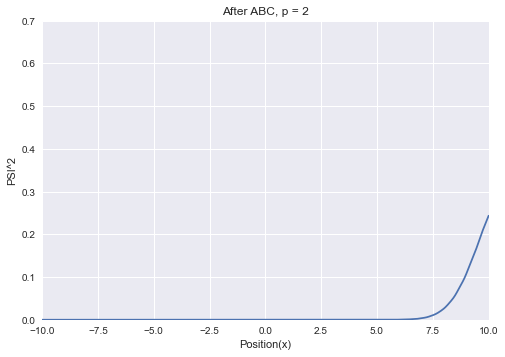

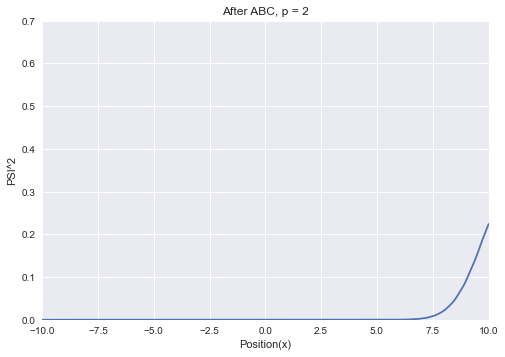

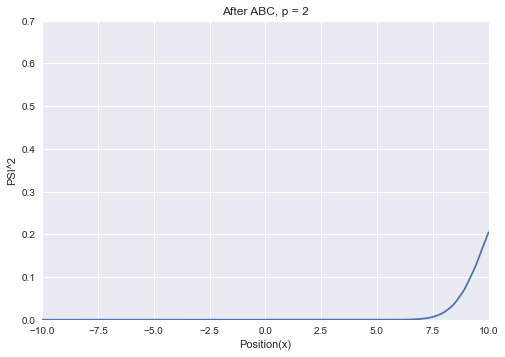

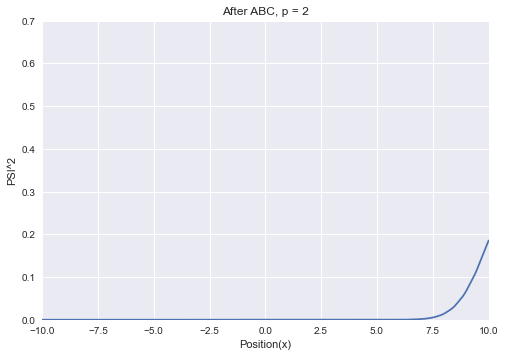

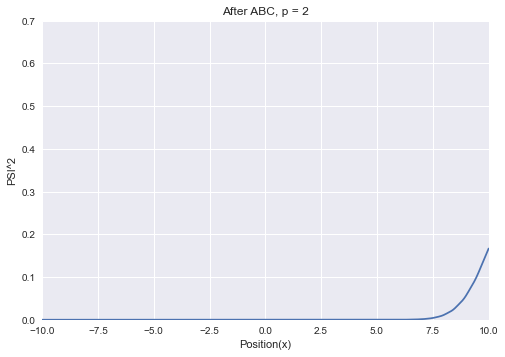

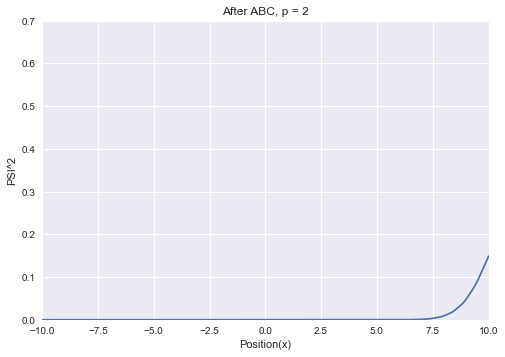

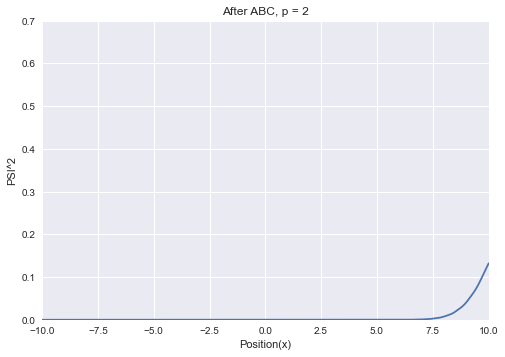

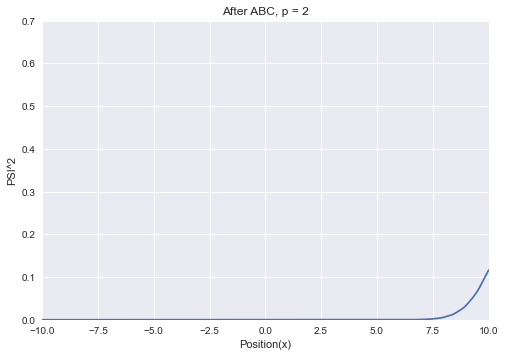

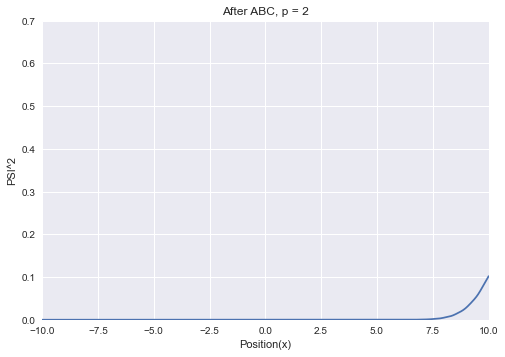

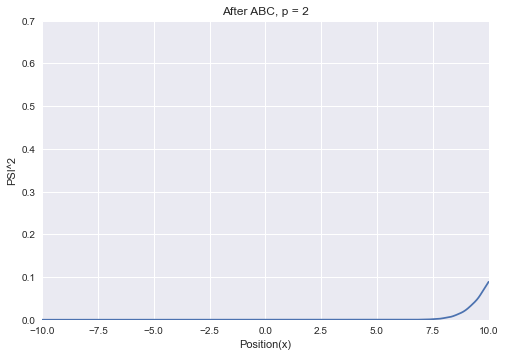

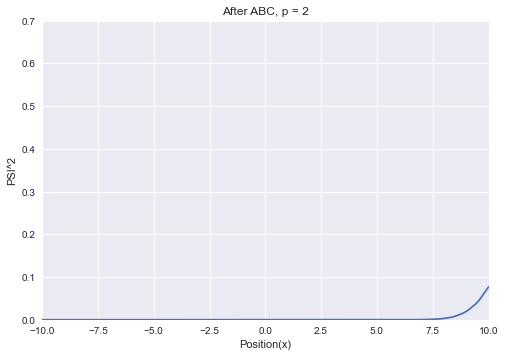

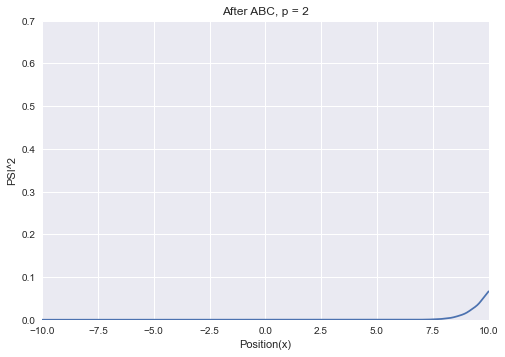

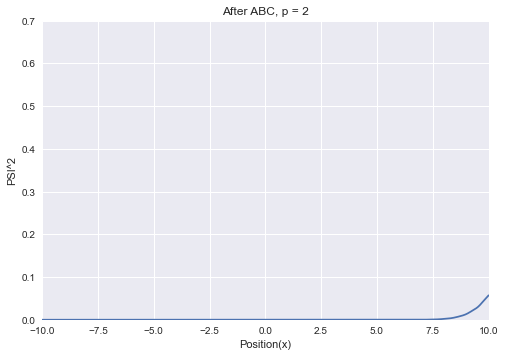

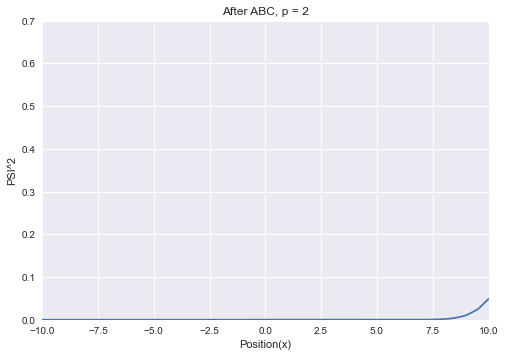

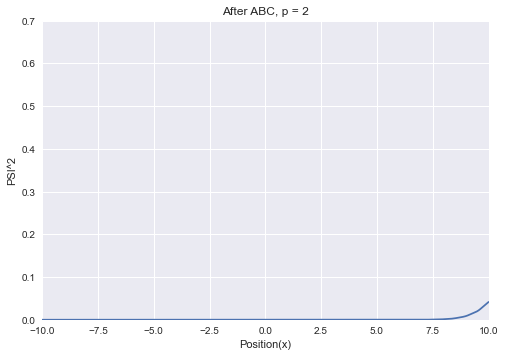

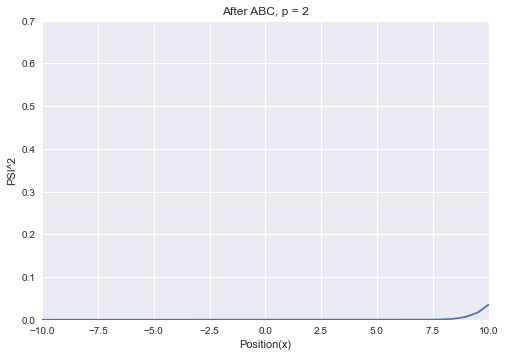

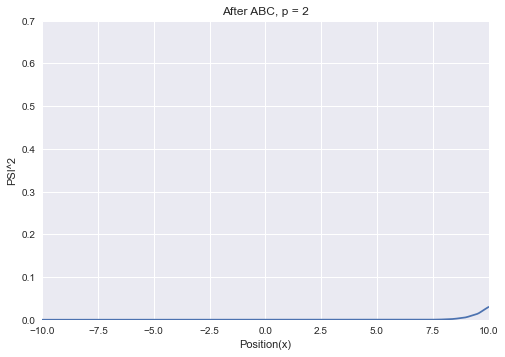

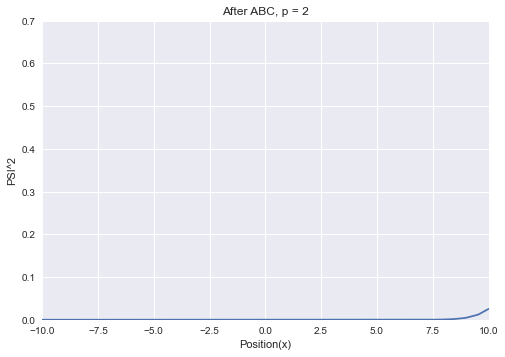

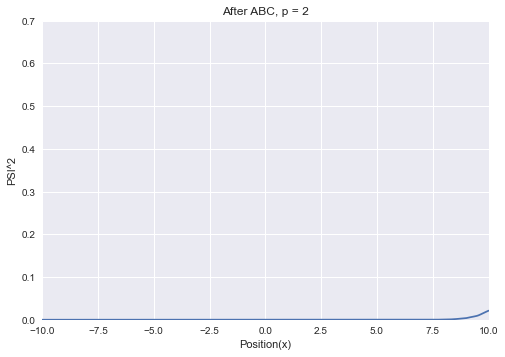

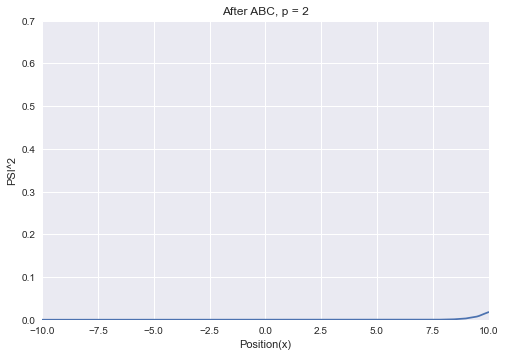

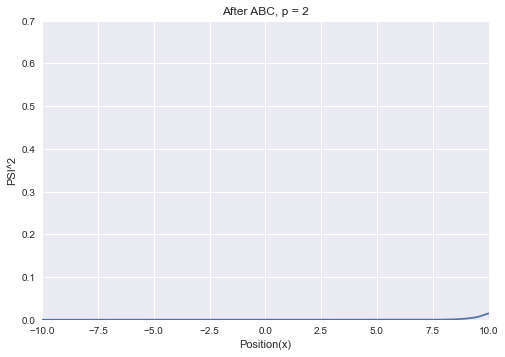

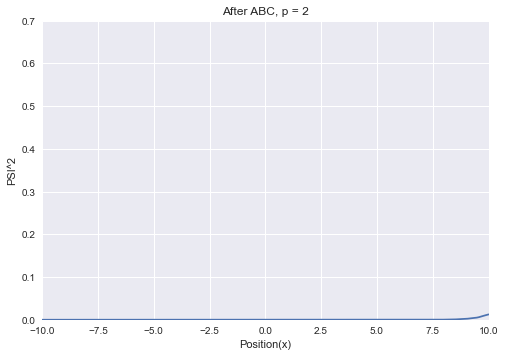

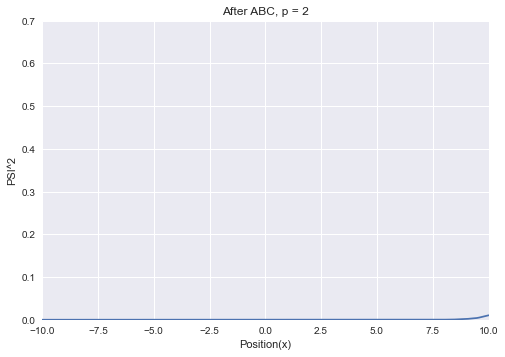

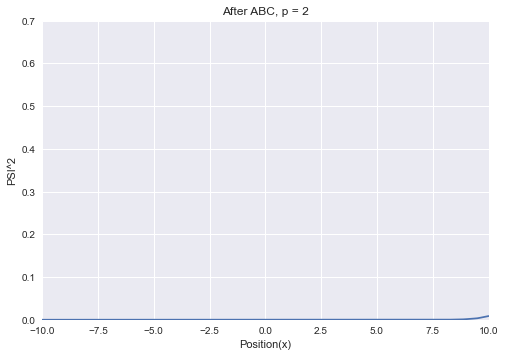

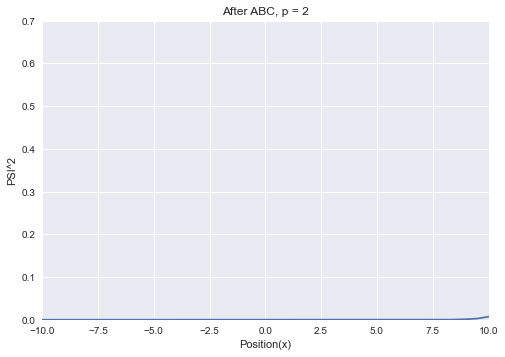

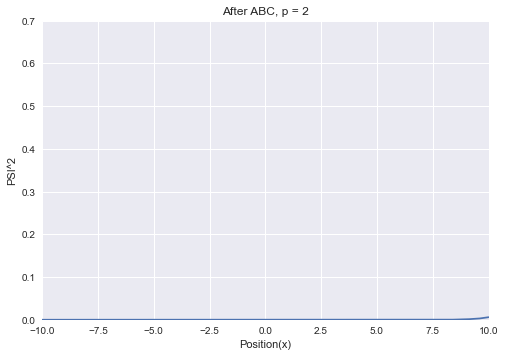

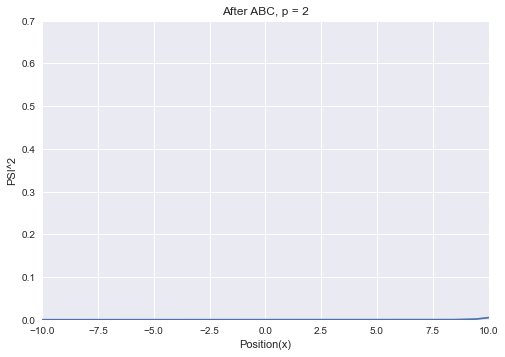

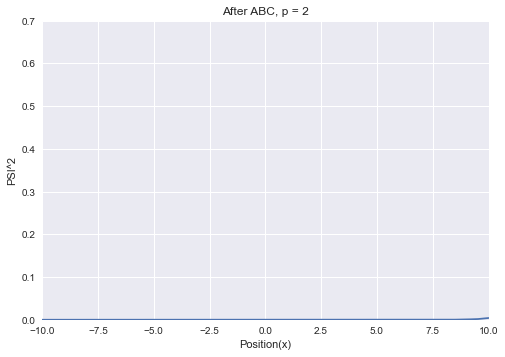

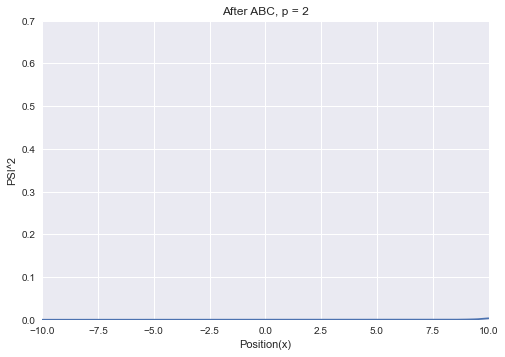

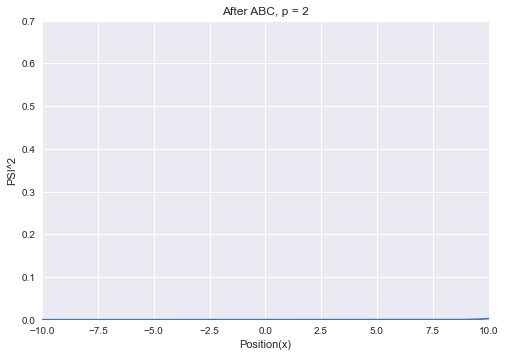

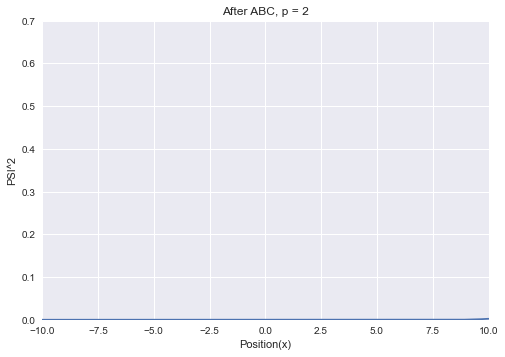

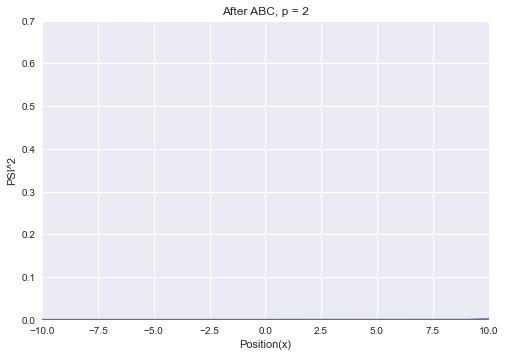

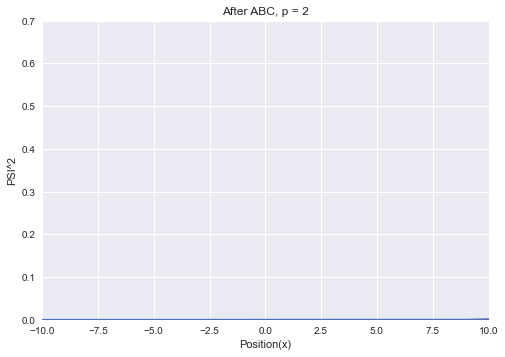

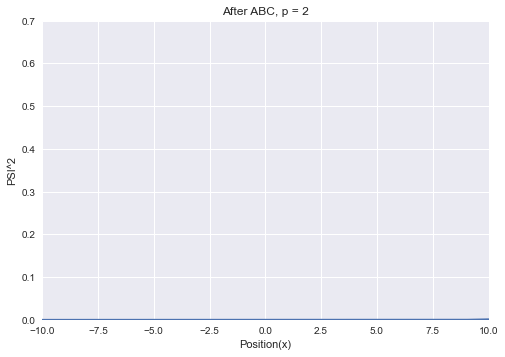

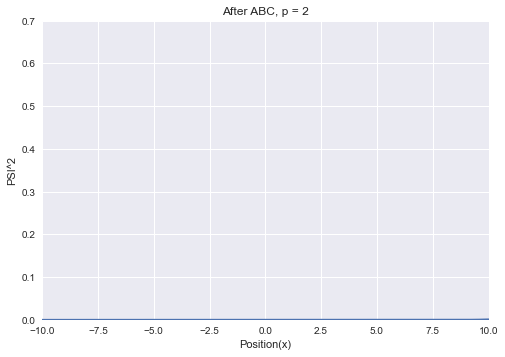

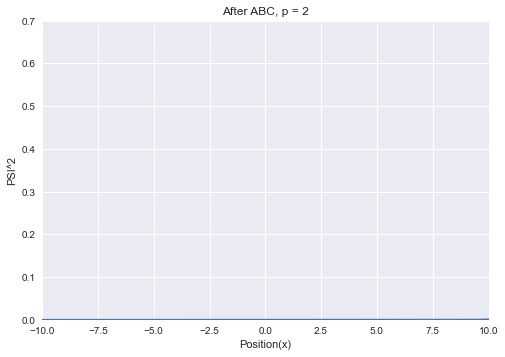

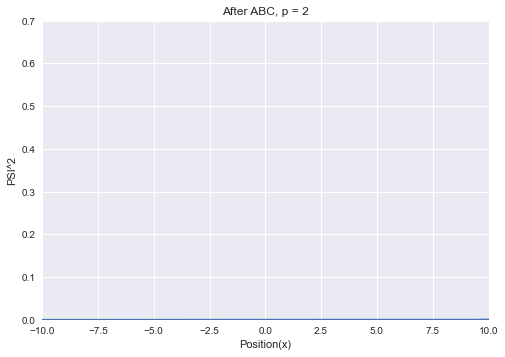

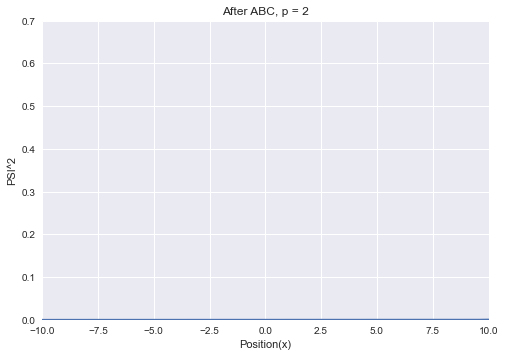

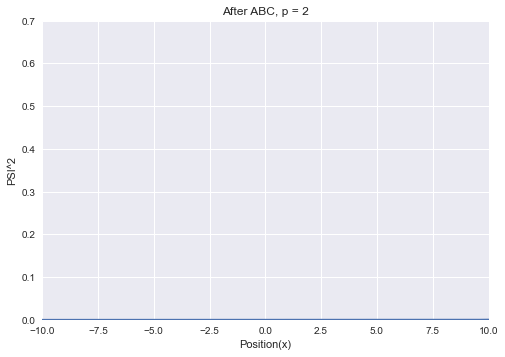

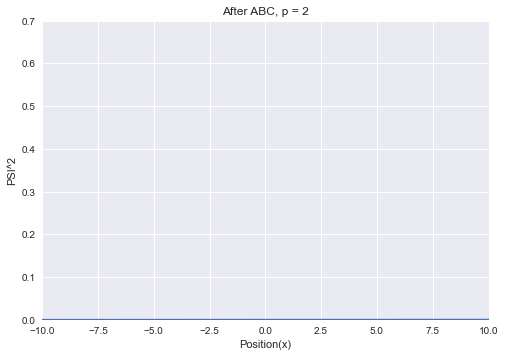

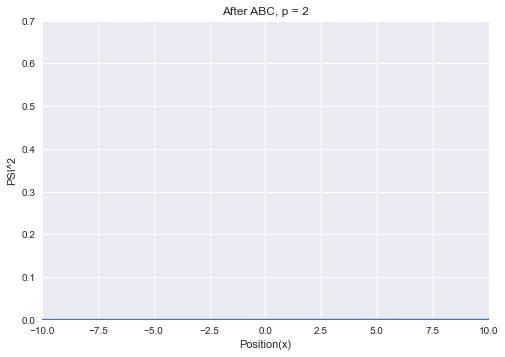

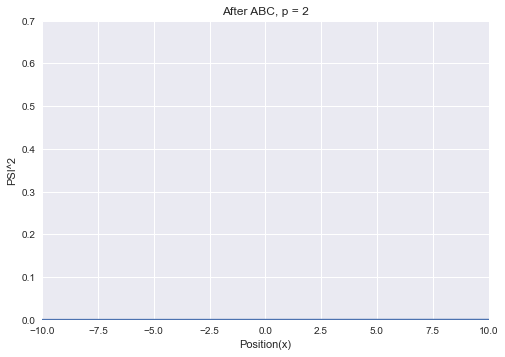

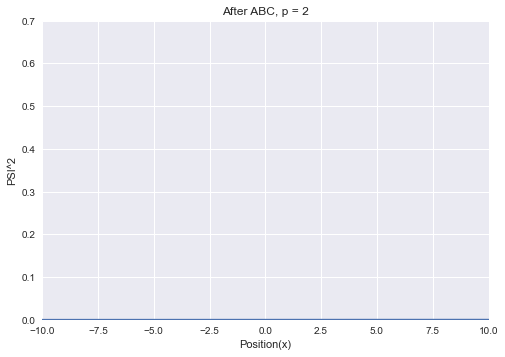

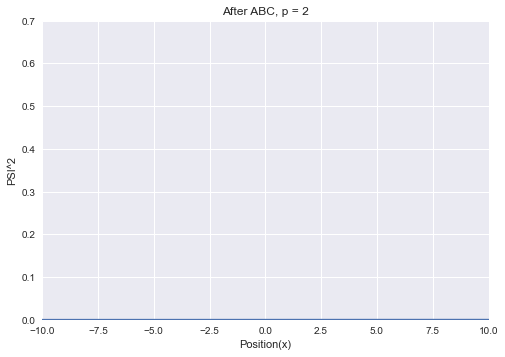

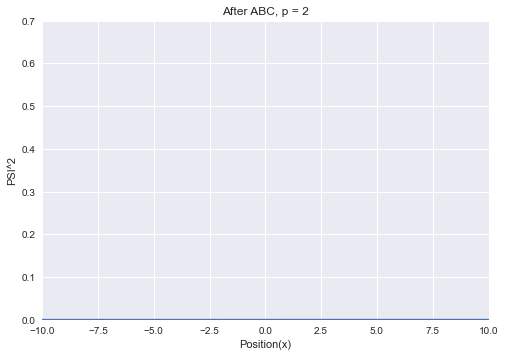

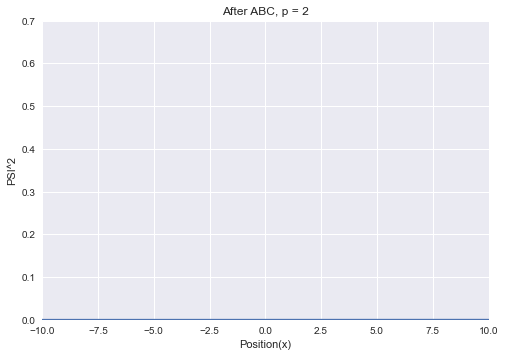

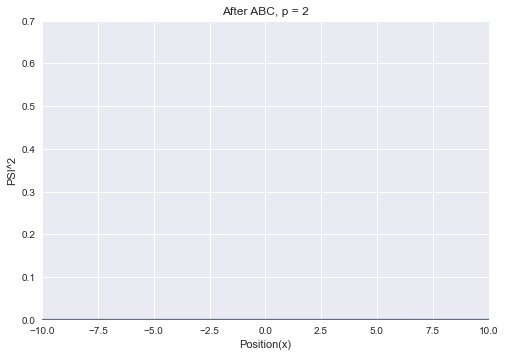

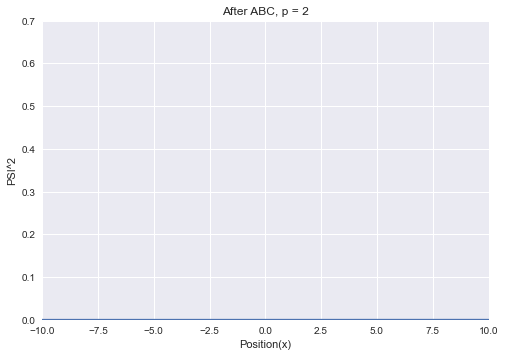

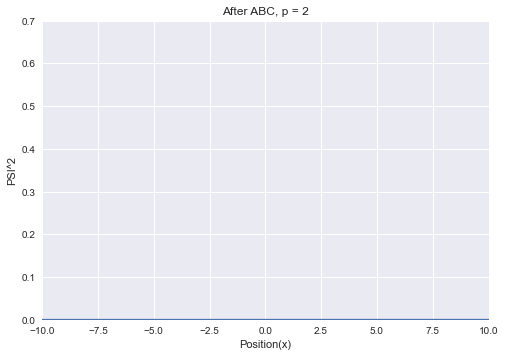

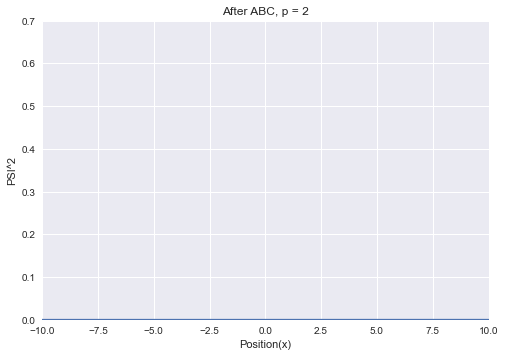

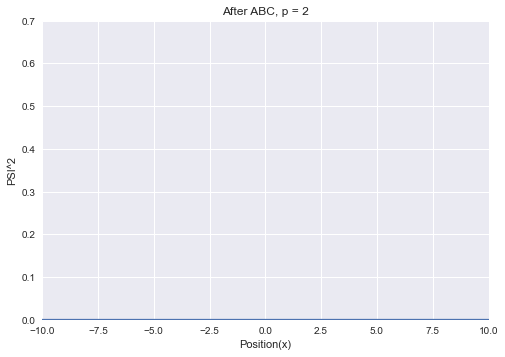

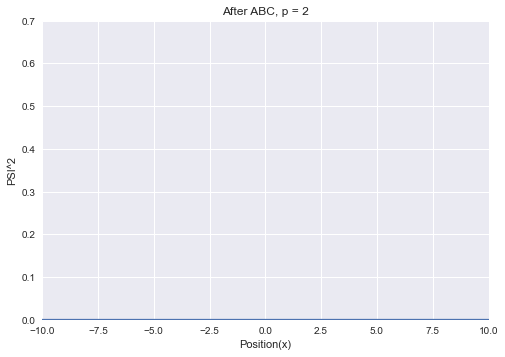

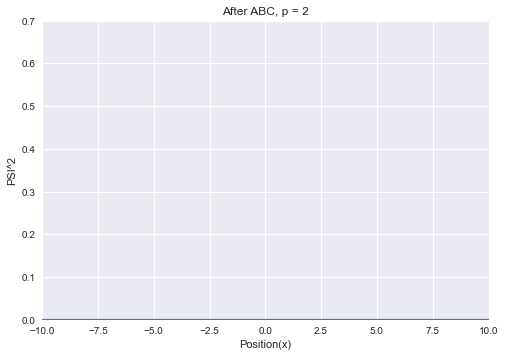

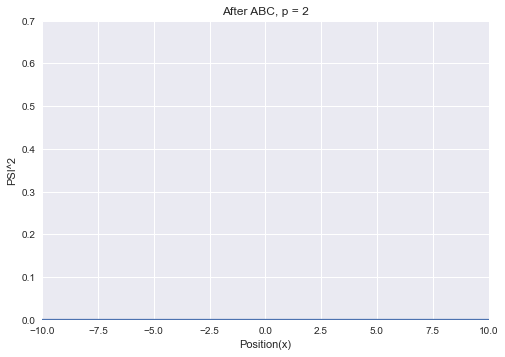

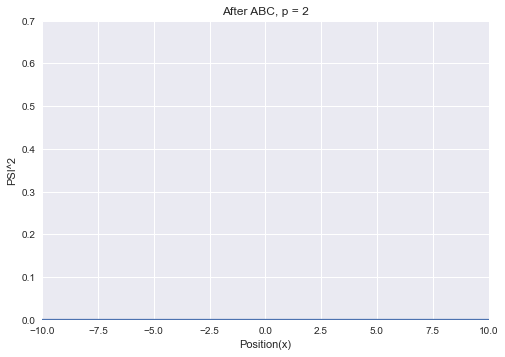

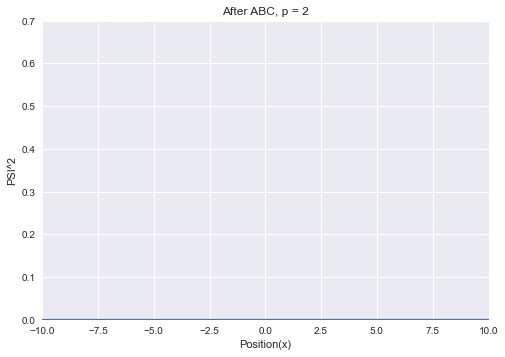

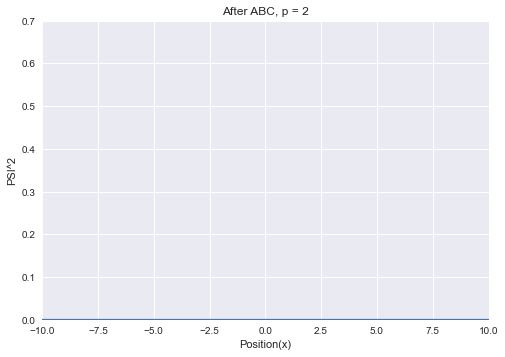

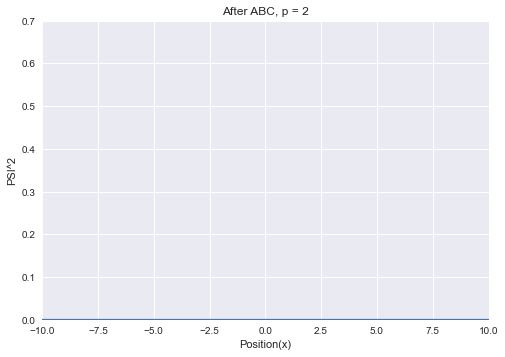

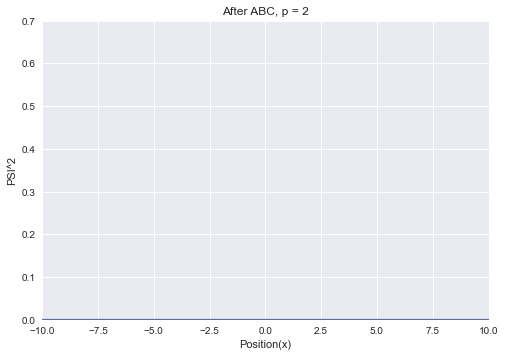

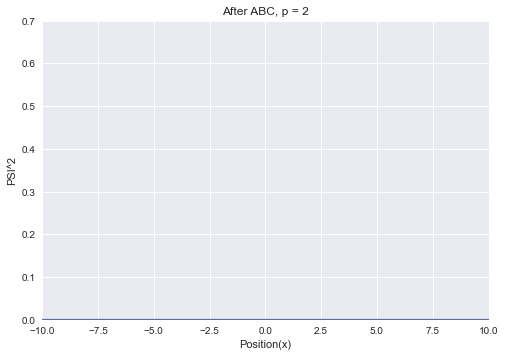

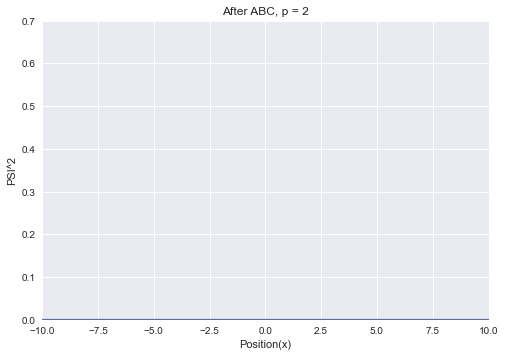

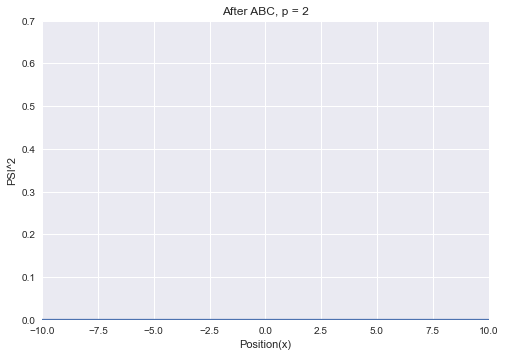

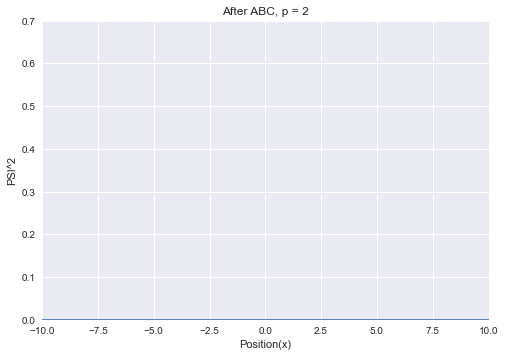

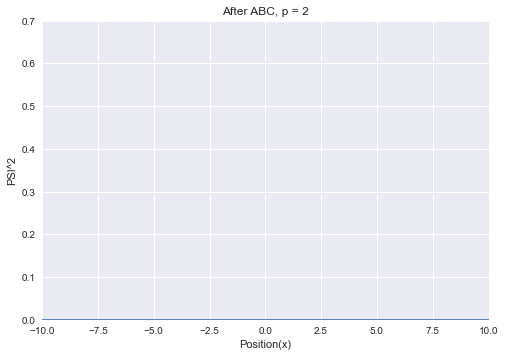

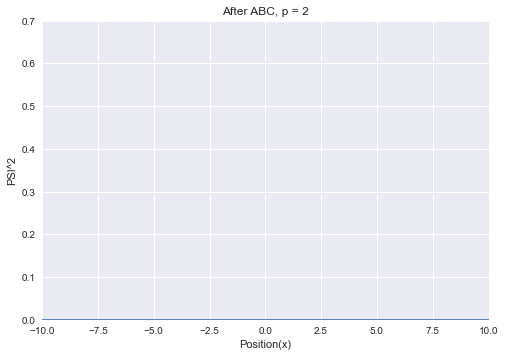

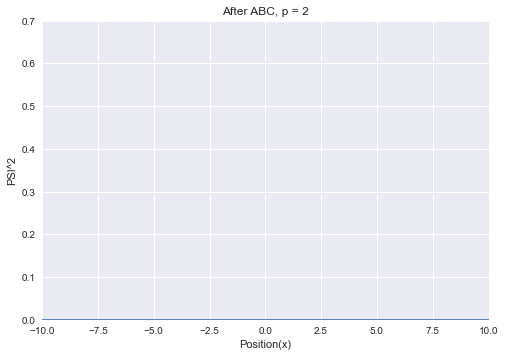

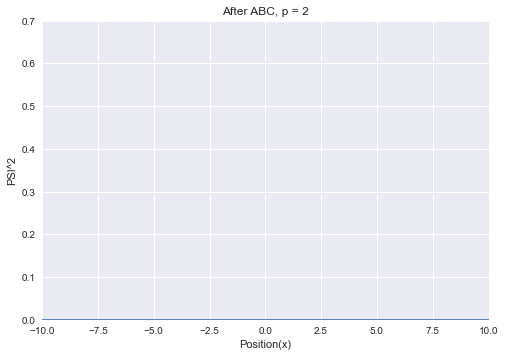

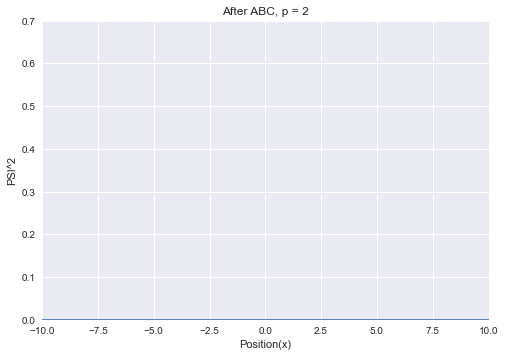

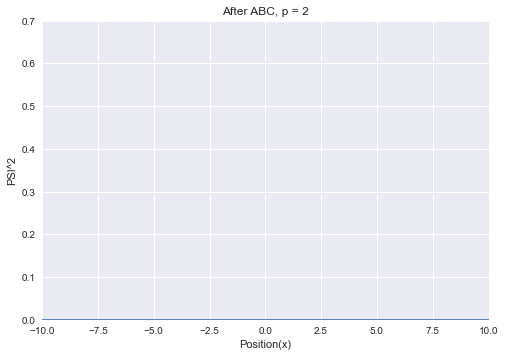

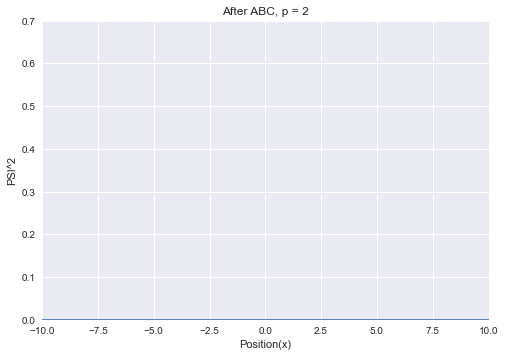

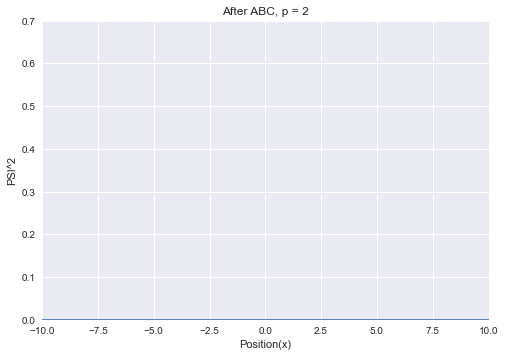

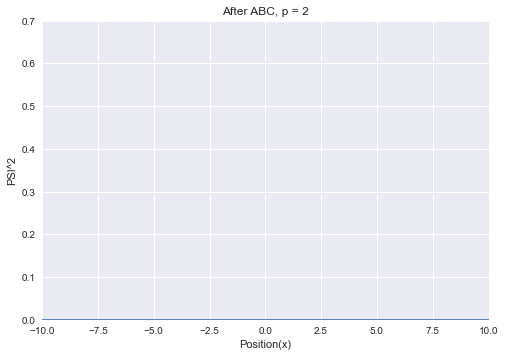

In [122]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 10):
    
    fig, ax = plt.subplots()
    
    
    ax.plot(x_Range, np.absolute(p2_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
   


    ax.set_title(f'Plot {i + 1}')
    plt.savefig(f'images/plot_{i + 1:03d}.png')

    plt.title("After ABC, p = 2")
    plt.xlabel('Position(x)')
    plt.ylabel('PSI^2')
    
    plt.show()   
    plt.close()
    
   
    
    
#The reflection vanished to much extent

In [120]:
#code for video

In [124]:
img_array = []
for i in range(1500):
    filename = f'images/plot_{i + 1:03d}.png'
    img = cv2.imread(filename)
    img_array.append(img)
    
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:\\movie.mp4', fourcc, 10, img_array[0].shape[:2][::-1])
for i in range(len(img_array)):
    out.write(img_array[i])

# Release the video file
out.release()

# p = 3, absorbing boundary conditions for p = 3

In [41]:
def P3_ZETA(q1,q2,q3,V,dt,dx,m):       
    """
    Here, we take input of q1, q2, and q3, which are variables in terms of k0,
    potential array, 
    dt, 
    dx
    and mass which is fixed as 0.5. 
    
    
    The code computes the zeta matrix, for the ABC for p = 3. This is derived in our report. 
    """
    
    h1 = m*(q1 + q2 + q3)
    h2 = m**2*q1*q2*q3*(1/q1 + 1/q2 + 1/q3)
    h3 = m**3*q1*q2*q3
    a_0  = 1j*(h2/(2*m) - V[0])
    a_J  = 1j*(h2/(2*m) - V[-1])
    b  = 1
    c  = 1j*h1
    d_0  = (h3/(2*m) - h1*V[0])
    d_J  = (h3/(2*m) - h1*V[-1])
    
    P3_zeta1_0 = ( -a_0/(2*dx) + b/(dt*dx) - c/(2*dt) - d_0/4 )
    P3_zeta1_J = ( -a_J/(2*dx) + b/(dt*dx) - c/(2*dt) - d_J/4 )
    P3_zeta2_0 = (  a_0/(2*dx) - b/(dt*dx) - c/(2*dt) - d_0/4 )
    P3_zeta2_J = (  a_J/(2*dx) - b/(dt*dx) - c/(2*dt) - d_J/4 )
    P3_zeta3_0 = (  a_0/(2*dx) + b/(dt*dx) - c/(2*dt) + d_0/4 )
    P3_zeta3_J = (  a_J/(2*dx) + b/(dt*dx) - c/(2*dt) + d_J/4 )
    P3_zeta4_0 = ( -a_0/(2*dx) - b/(dt*dx) - c/(2*dt) + d_0/4 )
    P3_zeta4_J = ( -a_J/(2*dx) - b/(dt*dx) - c/(2*dt) + d_J/4 )
    P3_ZETA = np.array([[0, P3_zeta1_0, P3_zeta2_0, P3_zeta3_0, P3_zeta4_0],
                       [0, P3_zeta1_J, P3_zeta2_J,P3_zeta3_J, P3_zeta4_J]])
    
    P3_ZETA = np.transpose(P3_ZETA)
    return P3_ZETA

In [42]:
p3_zeta = P3_ZETA(q, q, q, V, dt, dx, m)
p3_zeta

array([[     0.      +0.j   ,      0.      +0.j   ],
       [ 51064.25-14259.525j,  51064.25-14259.525j],
       [-51235.75 -6740.475j, -51235.75 -6740.475j],
       [ 51235.75 -6740.475j,  51235.75 -6740.475j],
       [-51064.25-14259.525j, -51064.25-14259.525j]])

In [43]:
def CN_P3(J,V,p3_zeta,dx,dt,m):
    
    
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    P2_Zeta - ABC which is defined for P = 2 Absorbing boundary Conditions
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    """
    
    one     = np.ones((J),complex)
    alpha   = (1j)*dt/(4*m*dx**2)                
    xi    = one + 1j*dt/2*(1/(m*dx**2)*one + V)    
    gamma   = one - 1j*dt/2*(1/(m*dx**2)*one + V)   
    xi[0]  = p3_zeta[1,0]; xi[J-1]   = p3_zeta[1,-1]
    gamma[0] = p3_zeta[3,0]; gamma[J-1] = p3_zeta[3,-1]
    up1     = (-alpha)*np.copy(one) ; up2     = alpha*np.copy(one); 
    up1[1]  = p3_zeta[2,0]           ; up2[1]  = p3_zeta[4,0]
    dn1     = (-alpha)*np.copy(one) ; dn2     = alpha*np.copy(one);
    dn1[J-2]= p3_zeta[2,-1]           ; dn2[J-2]= p3_zeta[4,-1]
    vecs1 = np.array([dn1,xi,up1]) ; vecs2 = np.array([dn2,gamma,up2])
    diags = np.array([-1,0,+1])
    U1    = sparse.spdiags(vecs1,diags,J,J)
    U1    = U1.tocsc()
    U2    = sparse.spdiags(vecs2,diags,J,J)
    U2    = U2.tocsc()
    
    return U1, U2

In [44]:
p3_U1, p3_U2 = CN_P3(J, V, p3_zeta, dx, dt, m)

In [45]:
def p3_Solve_CN(x_Range,dx,t,dt,psi0,V, m):
    
    """
    This fucntion solves the Crank Niksolson metod matrix, and obtains the direct result of wave fucntion, 
    provided we properly defines the initial wave fucntion.
    
    Input taken, are x_Range,
    grid step, time step
    and initial wave fucntion, at t = 0
    Potential array
    m- which is fixed in our case as 0.5
    
    """
    
    J = len(x_Range)
    N = len(t)

    P3_PSI      = np.zeros((J,N),complex)
    P3_PSI[:,0] = psi0
    
    P3_U1, P3_U2 = CN_P3(J,V,p3_zeta, dx,dt,m)
    P3_LU  = splin.splu(P3_U1)
    
    for n in range(0,N - 1):          
        b = P3_U2.dot(P3_PSI[:,n])          
        P3_PSI[:,n + 1] = P3_LU.solve(b)
        
    return P3_PSI

In [46]:
p3_PSI = p3_Solve_CN(x_Range, dx, t, dt, psi0, V, m)

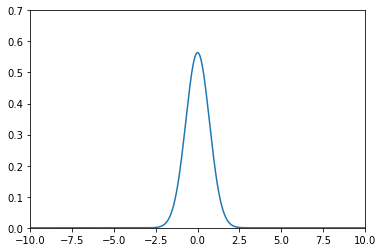

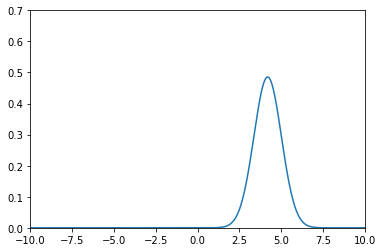

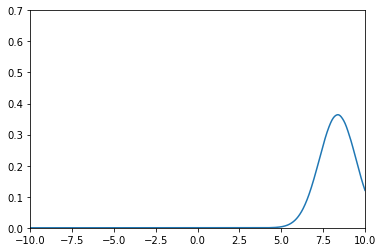

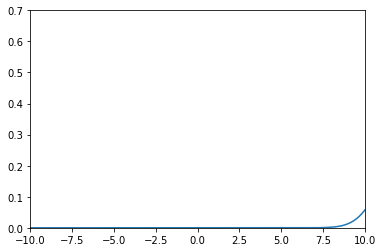

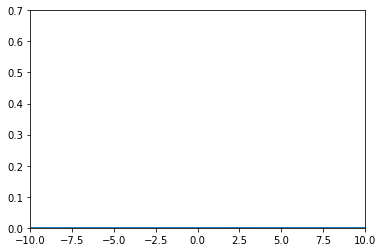

In [47]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 300):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(p3_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished to much extent

# p4, absorbing boundary conditions for p = 4

In [48]:
def P4_ABC(q1,q2,q3,q4,V,dt,dx,m):       
    
    """
    ABC with p=4, 
    This code also computes the matrix for zeta, for p = 4. 
    This gives the first and last row elements for new matrix for Crank Nikolson method
    """
    
    g1 = m*(q1 + q2 + q3 + q4)
    g2 = m**2*(q1*q2 + q1*q3 + q1*q4 + q2*q3 + q2*q4 +q3*q4)
    g3 = m**3*q1*q2*q3*q4*(1/q1 + 1/q2 + 1/q3 + 1/q4)
    g4 = m**4*q1*q2*q3*q4
    p1 = -4*m**2
    p2 = 2*m*g1
    p3_0 = (1j*2*m*g2 - 1j*8*(m**2)*V[0]) 
    p3_J = (1j*2*m*g2 - 1j*8*(m**2)*V[-1]) 
    p4_0 = (1j*2*m*g1*V[0] - 1j*g3)
    p4_J = (1j*2*m*g1*V[-1] - 1j*g3)
    p5_0 = (4*(m**2)*(V[0])**2 - 2*m*g2*V[0] + g4)
    p5_J = (4*(m**2)*(V[-1])**2 - 2*m*g2*V[-1] + g4)
    
    
    p4_zeta1_0 = (  p1/(2*dt*dt) - p2/(dx*dt) + p3_0/(2*dt) - p4_0/(2*dx) + p5_0/4 )
    p4_zeta1_J = (  p1/(2*dt*dt) - p2/(dx*dt) + p3_J/(2*dt) - p4_J/(2*dx) + p5_J/4 )
    p4_zeta2_0 = (  p1/(2*dt*dt) + p2/(dx*dt) + p3_0/(2*dt) + p4_0/(2*dx) + p5_0/4 )
    p4_zeta2_J = (  p1/(2*dt*dt) + p2/(dx*dt) + p3_J/(2*dt) + p4_J/(2*dx) + p5_J/4 )
    p4_zeta3_0 = (  p1/(dt*dt) - p2/(dx*dt) + p3_0/(2*dt) + p4_0/(2*dx) - p5_0/4 )
    p4_zeta3_J = (  p1/(dt*dt) - p2/(dx*dt) + p3_J/(2*dt) + p4_J/(2*dx) - p5_J/4 )
    p4_zeta4_0 = (  p1/(dt*dt) + p2/(dx*dt) + p3_0/(2*dt) - p4_0/(2*dx) - p5_0/4 )
    p4_zeta4_J = (  p1/(dt*dt) + p2/(dx*dt) + p3_J/(2*dt) - p4_J/(2*dx) - p5_J/4 )
    p4_zeta5   = ( -p1/(2*dt*dt) )  
    p4_zeta6   = ( -p1/(2*dt*dt) )
    
    P4_ZETA = np.array([[0,p4_zeta1_0,p4_zeta2_0,p4_zeta3_0,p4_zeta4_0,p4_zeta5,p4_zeta6],
                      [0,p4_zeta1_J,p4_zeta2_J,p4_zeta3_J,p4_zeta4_J,0,0]])
    P4_ZETA = np.transpose(P4_ZETA)
    return P4_ZETA

In [49]:
p4_zeta = P4_ABC(q, q, q, q, V, dt, dx, m)
p4_zeta

array([[       0.       +0.j ,        0.       +0.j ],
       [-1931599.75+182088.9j, -1931599.75+182088.9j],
       [  932800.25+111911.1j,   932800.25+111911.1j],
       [-2432800.25+111911.1j, -2432800.25+111911.1j],
       [  431599.75+182088.9j,   431599.75+182088.9j],
       [  500000.       +0.j ,        0.       +0.j ],
       [  500000.       +0.j ,        0.       +0.j ]])

In [50]:
#Defining z-matrix

def Z_matrix(J,p4_zeta):      
    
    """
    The function computes the Z Matrix which is required to obtain the necessary solutions. 
    The derivation of this matrix is shown in our report.
    
    The input required for this function is just J (len of grid points), 
    and zeta matrix for p = 3
    
    """
    
    row  = np.array([0,0,J-1,J-1])
    col  = np.array([0,1,J-2,J-1])
    z    = np.array([p4_zeta[5,0],p4_zeta[6,0],p4_zeta[6,0],p4_zeta[5,0]])
    Z    = sparse.csr_matrix((z,(row,col)), shape=(J,J))
    Z    = Z.tocsc()
    return Z

In [51]:
Z = Z_matrix(J, p4_zeta)

In [52]:
def CN_P4(J,V,p4_zeta,dx,dt,m):
    
    
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    4_Zeta - ABC which is defined for P = 4 Absorbing boundary Conditions
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    This also requires the initial matrixces of crank nikolson mathod, the reason for them is well shown in 
    our report. 
    
    """
    
    one     = np.ones((J),complex)
    alpha   = (1j)*dt/(4*m*dx**2)                
    xi    = one + 1j*dt/2*(1/(m*dx**2)*one + V)    
    gamma   = one - 1j*dt/2*(1/(m*dx**2)*one + V)   
    xi[0]  = p4_zeta[1,0]; xi[J-1]   = p4_zeta[1,-1]
    gamma[0] = p4_zeta[3,0]; gamma[J-1] = p4_zeta[3,-1]
    up1     = (-alpha)*np.copy(one) ; up2     = alpha*np.copy(one); 
    up1[1]  = p4_zeta[2,0]           ; up2[1]  = p4_zeta[4,0]
    dn1     = (-alpha)*np.copy(one) ; dn2     = alpha*np.copy(one);
    dn1[J-2]= p4_zeta[2,-1]           ; dn2[J-2]= p4_zeta[4,-1]
    vecs1 = np.array([dn1,xi,up1]) ; vecs2 = np.array([dn2,gamma,up2])
    diags = np.array([-1,0,+1])
    U1    = sparse.spdiags(vecs1,diags,J,J)
    U1    = U1.tocsc()
    U2    = sparse.spdiags(vecs2,diags,J,J)
    U2    = U2.tocsc()
    
    W1,W2 = CrankNikolson(J,V,dx,dt,m)
    
    Z  = Z_matrix(J,p4_zeta)
    
    return U1, U2, Z, W1, W2

In [53]:
p4_U1, p4_U2, Z, W1, W2 = CN_P4(J, V, p4_zeta, dx, dt, m)

In [54]:
def p4_Solve_CN(x_Range,dx,t,dt,psi0,V, m):
    
    """
    This fucntion solves the Crank Niksolson metod matrix, and obtains the direct result of wave fucntion, 
    provided we properly defines the initial wave fucntion.
    
    Input taken, are x_Range,
    grid step, time step
    and initial wave fucntion, at t = 0
    Potential array
    m- which is fixed in our case as 0.5
    
    """
    J = len(x_Range)
    N = len(t)

    p4_PSI      = np.zeros((J,N),complex)
    p4_PSI[:,0] = psi0
    
    P4_U1, P4_U2, Z, W1, W2 = CN_P4(J,V,p4_zeta, dx,dt,m)
    P4_LU  = splin.splu(P4_U1)
    LW     = splin.splu(W1)
      
    for n in range(0,N-1):
        if n == 0:
            b = W2.dot(p4_PSI[:,n])  
            p4_PSI[:,n+1] = LW.solve(b)
            
        else:
            b = U2.dot(p4_PSI[:,n]) + Z.dot(p4_PSI[:,n-1])
            p4_PSI[:,n+1] = P4_LU.solve(b)
        
    return p4_PSI

In [55]:
p4_PSI = p4_Solve_CN(x_Range, dx, t, dt, psi0, V, m)

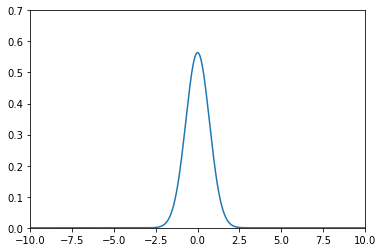

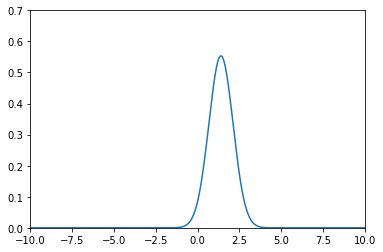

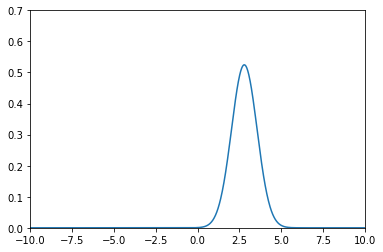

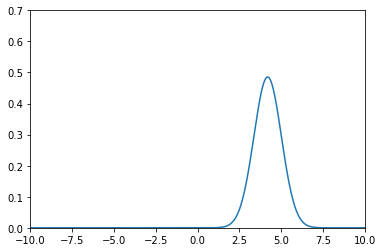

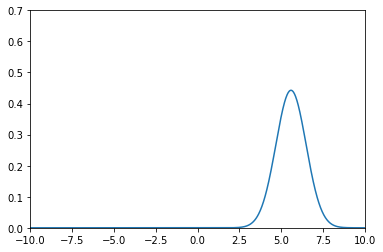

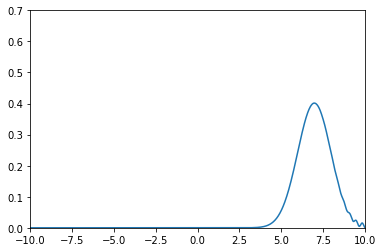

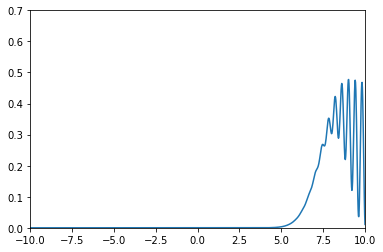

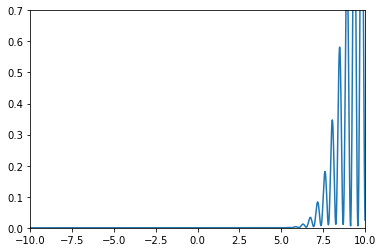

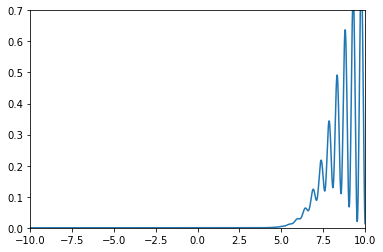

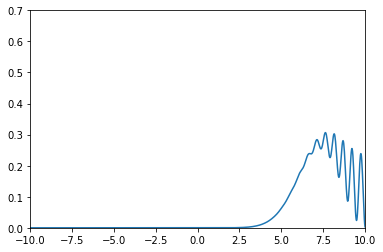

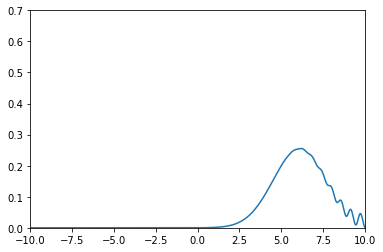

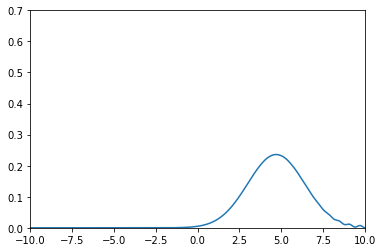

In [56]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1200, 100):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished here too

# Here, we are done with Solving Absorbing Boundary Conditions Problems

In [57]:
#Now comparison among all of them

In [58]:
LAM_PSI

array([[ 9.17510606e-23-1.12116119e-22j,  1.23072249e-22-1.17459304e-22j,
         1.38533623e-22-9.85648076e-23j, ...,
        -1.45309575e-03+2.23654462e-03j, -1.31693062e-03+2.30804196e-03j,
        -1.17745839e-03+2.37122430e-03j],
       [ 1.29092639e-22-1.19807127e-22j,  1.41299920e-22-9.75326866e-23j,
         1.55730412e-22-8.41832185e-23j, ...,
        -1.09277132e-03+2.41599893e-03j, -9.48354022e-04+2.46567998e-03j,
        -8.01950795e-04+2.50670980e-03j],
       [ 1.75272568e-22-1.22829488e-22j,  1.67716529e-22-9.16063493e-23j,
         1.74943020e-22-6.68324759e-23j, ...,
        -7.11811525e-04+2.54068360e-03j, -5.62435010e-04+2.56769047e-03j,
        -4.12421113e-04+2.58590754e-03j],
       ...,
       [ 1.75272568e-22+1.22829488e-22j,  1.99650091e-22+1.52176515e-22j,
         2.31562247e-22+1.83964730e-22j, ...,
        -2.34434850e-05+5.06780577e-06j, -2.32632221e-05+5.19185691e-06j,
        -2.30833775e-05+5.31376367e-06j],
       [ 1.29092639e-22+1.19807127e-22j,  1.

In [59]:
RFA_PSI

array([[ 9.17510606e-23-1.12116119e-22j,  7.89881587e-23-1.09910594e-22j,
         7.43938824e-23-1.16484458e-22j, ...,
         2.05585324e-02-4.24322098e-02j,  1.81974180e-02-4.36282281e-02j,
         1.57689395e-02-4.46913905e-02j],
       [ 1.29092639e-22-1.19807127e-22j,  1.19754024e-22-1.07348321e-22j,
         1.13176673e-22-1.05773683e-22j, ...,
         1.56867986e-02-4.46245968e-02j,  1.32010589e-02-4.55474125e-02j,
         1.06634405e-02-4.63305329e-02j],
       [ 1.75272568e-22-1.22829488e-22j,  1.61205446e-22-1.02315962e-22j,
         1.52477612e-22-9.25050570e-23j, ...,
         1.04359412e-02-4.58775588e-02j,  7.87839390e-03-4.65058436e-02j,
         5.28560541e-03-4.69905924e-02j],
       ...,
       [ 1.75272568e-22+1.22829488e-22j,  1.94530874e-22+1.49827744e-22j,
         2.14618042e-22+1.80022100e-22j, ...,
        -3.79410880e-05-3.20402433e-06j, -3.77356628e-05-2.93820861e-06j,
        -3.75298581e-05-2.67561606e-06j],
       [ 1.29092639e-22+1.19807127e-22j,  1.

In [60]:
p2_PSI

array([[ 9.17510606e-23-1.12116119e-22j,  1.27027511e-22-1.15552272e-22j,
         1.42837257e-22-9.32794240e-23j, ...,
         1.38310958e-04+5.13825559e-05j,  1.45614925e-04+4.07869779e-05j,
         1.52129737e-04+2.95652020e-05j],
       [ 1.29092639e-22-1.19807127e-22j,  1.42463892e-22-9.55206542e-23j,
         1.57929766e-22-7.98877550e-23j, ...,
         1.50404248e-04+2.62429851e-05j,  1.55800114e-04+1.43950427e-05j,
         1.60309932e-04+2.06182795e-06j],
       [ 1.75272568e-22-1.22829488e-22j,  1.67627274e-22-9.03790947e-23j,
         1.75245560e-22-6.34286338e-23j, ...,
         1.58067857e-04-1.12475338e-06j,  1.61358042e-04-1.38934963e-05j,
         1.63689487e-04-2.69923900e-05j],
       ...,
       [ 1.75272568e-22+1.22829488e-22j,  1.99154838e-22+1.53045453e-22j,
         2.30596404e-22+1.86999921e-22j, ...,
        -2.22253101e-05+5.51057185e-06j, -2.20491606e-05+5.62368949e-06j,
        -2.18734875e-05+5.73477669e-06j],
       [ 1.29092639e-22+1.19807127e-22j,  1.

In [61]:
p3_PSI

array([[ 9.17510606e-23-1.12116119e-22j,  8.02185943e-23-1.09905238e-22j,
         7.71447426e-23-1.15872971e-22j, ...,
         2.07407251e-04-4.20483306e-04j,  1.83366002e-04-4.31571663e-04j,
         1.58758847e-04-4.41272666e-04j],
       [ 1.29092639e-22-1.19807127e-22j,  1.20291093e-22-1.06979774e-22j,
         1.14761110e-22-1.04737756e-22j, ...,
         1.43844823e-04-4.46506033e-04j,  1.18461529e-04-4.53952919e-04j,
         9.27224137e-05-4.59947694e-04j],
       [ 1.75272568e-22-1.22829488e-22j,  1.61330878e-22-1.01994776e-22j,
         1.53124062e-22-9.14347792e-23j, ...,
         7.71602202e-05-4.62902805e-04j,  5.09865951e-05-4.66556335e-04j,
         2.46738444e-05-4.68724765e-04j],
       ...,
       [ 1.75272568e-22+1.22829488e-22j,  1.94203937e-22+1.49937316e-22j,
         2.13439240e-22+1.80612850e-22j, ...,
        -2.50031064e-05+3.83415862e-06j, -2.48232380e-05+3.97571667e-06j,
        -2.46436745e-05+4.11504145e-06j],
       [ 1.29092639e-22+1.19807127e-22j,  1.

In [62]:
p4_PSI

array([[ 9.17510606e-23-1.12116119e-22j, -2.39520874e-23-4.72985103e-23j,
        -7.46291163e-23+2.39191418e-23j, ...,
         1.18577687e-02+1.66576711e-02j,  1.27907428e-02+1.59828614e-02j,
         1.36843119e-02+1.52562977e-02j],
       [ 1.29092639e-22-1.19807127e-22j,  5.60539454e-23-1.10574970e-22j,
        -3.81676519e-23-5.56376441e-23j, ...,
         8.06648361e-02+7.87912412e-02j,  8.50814199e-02+7.42065132e-02j,
         8.92324335e-02+6.93779291e-02j],
       [ 1.75272568e-22-1.22829488e-22j,  1.34278982e-22-1.22686980e-22j,
         4.20706453e-23-1.14332898e-22j, ...,
         1.47767611e-01+1.39187279e-01j,  1.55571678e-01+1.30791521e-01j,
         1.62889851e-01+1.21965038e-01j],
       ...,
       [ 1.75272568e-22+1.22829488e-22j,  2.30821737e-22+1.39631403e-22j,
         2.97370194e-22+8.94677552e-23j, ...,
         1.89116208e-06+6.80328315e-06j,  1.93761376e-06+6.74536934e-06j,
         1.98353063e-06+6.68547965e-06j],
       [ 1.29092639e-22+1.19807127e-22j,  1.